In [1]:
# import numpy as np
import pandas as pd
import config # a python file that contains path to TIMSS data files
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ml_data_1 = pd.read_csv(config.ml_data_1, index_col=False)

In [53]:
x = ml_data_1.drop(columns='mean_PV')
x.sample()

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I
1304,No,None or very few (0–10 books),Agree a lot,Agree a lot,Never,Disagree a little,Agree a little,Every or almost every lesson,Disagree a little,Disagree a little


In [54]:
y = ml_data_1.mean_PV
y.sample()

3201    460.881686
Name: mean_PV, dtype: float64

In [55]:
from kmodes.kmodes import KModes

# Instantiate the k-modes model
km = KModes(n_clusters=6, init='Huang', n_init=5, verbose=1, n_jobs=1)

# Fit the model to your categorical data
clusters = km.fit_predict(x)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2143, cost: 30948.0
Run 1, iteration: 2/100, moves: 165, cost: 30948.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2651, cost: 29344.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2154, cost: 29862.0
Run 3, iteration: 2/100, moves: 1475, cost: 29862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2042, cost: 30419.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3180, cost: 30684.0
Best run was number 2


In [56]:
clusters.max()

5

In [57]:
clusters

array([3, 3, 3, ..., 3, 4, 5], dtype=uint16)

In [81]:
# Test cluster attribution: The following data is the same as in row:3141 of the current clustered data,
# and should be in cluster 5
km.predict([['Yes','Enough to fill one shelf (11–25 books)','Disagree a little','Agree a little','At least once a week','Agree a lot','Agree a lot','Never','Agree a lot','Agree a lot']])

array([5], dtype=uint16)

The silhouette score is a metric used to evaluate the quality of clustering results. It measures how similar each data point in one cluster is to data points in the same cluster compared to the nearest neighboring cluster. A higher silhouette score indicates better-defined clusters.

The silhouette_score function in scikit-learn requires numerical data, and it cannot handle categorical data with string values directly. To use the silhouette score for clustering evaluation with categorical data, we need to preprocess data appropriately to convert categorical features into numerical format. One common technique for this purpose is one-hot encoding.

Here are the steps to prepare categorical data for silhouette score calculation:

One-Hot Encoding: Converts categorical data into a one-hot encoded format. Each unique category within a categorical feature becomes a new binary (0 or 1) feature. Most machine learning libraries, including scikit-learn, provide tools for one-hot encoding.

In [85]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform your categorical data
data_encoded = encoder.fit_transform(x)

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
data_encoded.dtype

dtype('float64')

Clustering with Numerical Data: Apply the clustering algorithm to the one-hot encoded data, which is now in a numerical format.

Calculate Silhouette Score: Let's calculate the silhouette score as follows:

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(data_encoded,clusters)  # "data" is your dataset, and "labels" are the cluster assignments
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.10178689504863322


The score of 0.1 in silhouette suggests that data points may be on or very close to the decision boundary between two neighboring clusters. 

In [92]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(data_encoded,clusters)
print("davies_bouldin_score:", dbi)

davies_bouldin_score: 2.5741721638882655


t-SNE Dimensionality Reduction:

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique that can be useful for visualizing clusters in a lower-dimensional space. It projects high-dimensional data into a 2D or 3D space while preserving the similarity between data points.

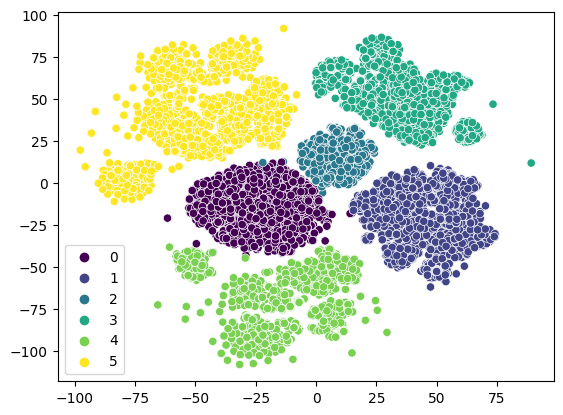

In [96]:
from sklearn.manifold import TSNE
import seaborn as sns

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(data_encoded)

# Create a scatterplot to visualize clusters
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=clusters, palette='viridis')
plt.show()


Now that we have our clusters, we will add their numbers to each data point in our labels data in order to separate each cluster alone and build a separate model for each:

In [99]:
x['clusters'] = clusters

In [100]:
x['labels'] = y

In [101]:
x.describe()

,clusters,labels
count,8458.000000,8458.000000
mean,2.532514,385.328560
std,1.823200,62.364477
min,0.000000,194.209476
25%,1.000000,341.444794
50%,3.000000,379.916982
75%,4.000000,423.390834
max,5.000000,649.182768


In [102]:
x.sample(5)

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,clusters,labels
3956,Yes,None or very few (0–10 books),Agree a little,Agree a lot,At least once a week,Agree a little,Agree a lot,Never,Agree a lot,Agree a lot,5,408.957482
2678,No,None or very few (0–10 books),Agree a lot,Agree a lot,Once or twice a month,Agree a lot,Agree a lot,Every or almost every lesson,Agree a little,Agree a little,1,371.428258
5557,Yes,None or very few (0–10 books),Disagree a little,Disagree a lot,At least once a week,Agree a lot,Disagree a little,Every or almost every lesson,Agree a lot,Disagree a lot,3,462.164768
7526,Yes,None or very few (0–10 books),Agree a little,Disagree a little,A few times a year,Disagree a little,Disagree a lot,Every or almost every lesson,Disagree a little,Disagree a little,0,388.081074
5812,No,None or very few (0–10 books),Agree a lot,Agree a lot,At least once a week,Disagree a lot,Disagree a lot,About half the lessons,Disagree a lot,Disagree a lot,2,330.994958


Let's see what clusters do we have:

In [103]:
list_of_clusters = x['clusters'].unique()
list_of_clusters

array([3, 4, 5, 1, 2, 0], dtype=uint16)

In [104]:
x[['labels','clusters']]

,labels,clusters
0,410.811348,3
1,433.181462,3
2,418.027694,3
3,467.300384,4
4,362.964464,4
...,...,...
8453,401.279696,3
8454,438.474212,1
8455,401.756130,3
8456,312.155188,4


Let's put each cluster in a different dataframe:

In [105]:
y_0 = x[['labels','clusters']].query('clusters==0')
x_0 = x.query('clusters==0')
y_1 = x[['labels','clusters']].query('clusters==1')
x_1 = x.query('clusters==1')
y_2 = x[['labels','clusters']].query('clusters==2')
x_2 = x.query('clusters==2')
y_3 = x[['labels','clusters']].query('clusters==3')
x_3 = x.query('clusters==3')
y_4 = x[['labels','clusters']].query('clusters==4')
x_4 = x.query('clusters==4')
y_5 = x[['labels','clusters']].query('clusters==4')
x_5 = x[x['clusters'] ==4]

In [76]:
x_2.count()

BSBG05D     651
BSBG04      651
BSBG13E     651
BSBG13D     651
BSBG14A     651
BSBM16A     651
BSBM17D     651
BSBM18C     651
BSBM20E     651
BSBM20I     651
clusters    651
labels      651
dtype: int64

In [79]:
x_1

,BSBG05D,BSBG04,BSBG13E,BSBG13D,BSBG14A,BSBM16A,BSBM17D,BSBM18C,BSBM20E,BSBM20I,clusters,labels
6,Yes,Enough to fill one shelf (11–25 books),Agree a lot,Agree a lot,Never,Agree a little,Agree a little,Every or almost every lesson,Disagree a little,Disagree a little,1,385.702086
12,No,None or very few (0–10 books),Agree a lot,Disagree a lot,Never,Agree a little,Agree a little,Never,Agree a little,Agree a lot,1,353.683516
13,No,Enough to fill one bookcase (26–100 books),Agree a lot,Agree a lot,Never,Agree a lot,Agree a lot,Every or almost every lesson,Agree a little,Agree a lot,1,455.644114
16,No,Enough to fill one bookcase (26–100 books),Agree a lot,Agree a lot,Never,Agree a lot,Agree a lot,Never,Agree a little,Agree a lot,1,420.080422
19,No,None or very few (0–10 books),Agree a lot,Agree a lot,Never,Disagree a lot,Agree a lot,Every or almost every lesson,Agree a little,Agree a little,1,425.194584
...,...,...,...,...,...,...,...,...,...,...,...,...
8423,Yes,None or very few (0–10 books),Agree a lot,Agree a lot,A few times a year,Agree a little,Agree a little,Never,Agree a little,Agree a little,1,507.084744
8428,No,None or very few (0–10 books),Agree a lot,Agree a lot,Never,Agree a lot,Agree a lot,Never,Agree a little,Agree a lot,1,341.184034
8437,Yes,Enough to fill one bookcase (26–100 books),Agree a lot,Disagree a lot,At least once a week,Agree a little,Agree a lot,Every or almost every lesson,Agree a little,Agree a lot,1,359.544556
8447,Yes,Enough to fill one shelf (11–25 books),Agree a lot,Agree a lot,At least once a week,Agree a little,Agree a lot,About half the lessons,Agree a little,Agree a lot,1,348.348126


Let's do some hyperparameters tuning of xgboost algorithm executed on "x_2" dataset using optuna:

In [19]:
import optuna
import xgboost as xgb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [21]:
x_3.columns

Index(['BSBG05D', 'BSBG04', 'BSBG13E', 'BSBG13D', 'BSBG14A', 'BSBM16A',
       'BSBM17D', 'BSBM18C', 'BSBM20E', 'BSBM20I', 'clusters', 'labels'],
      dtype='object')

Let's keep only necessary features by deleting the 'clusters'  and 'labels' columns

In [22]:
df_list_features = [x_0, x_1, x_2, x_3, x_4]
df_list_labels = [y_0, y_1, y_3, y_4]
for df in df_list_features:
    del df['clusters']
    del df['labels']
for df in df_list_labels:
    del df['clusters']

In [23]:
x_3.columns

Index(['BSBG05D', 'BSBG04', 'BSBG13E', 'BSBG13D', 'BSBG14A', 'BSBM16A',
       'BSBM17D', 'BSBM18C', 'BSBM20E', 'BSBM20I'],
      dtype='object')

In [24]:
y_0.columns

Index(['labels'], dtype='object')

Let's start defining our objective function used by optuna, where we will define our parameters:

In [ ]:
#The following line is just to display, on hover, parameters of xgboost regressor

xgb.XGBRFRegressor()

In [25]:
x_0.dtypes

BSBG05D    object
BSBG04     object
BSBG13E    object
BSBG13D    object
BSBG14A    object
BSBM16A    object
BSBM17D    object
BSBM18C    object
BSBM20E    object
BSBM20I    object
dtype: object

In [26]:
x_0 = x_0.astype('category')
x_1 = x_1.astype('category')
x_2 = x_2.astype('category')
x_3 = x_3.astype('category')
x_4 = x_4.astype('category')

In [27]:
x_3.dtypes

BSBG05D    category
BSBG04     category
BSBG13E    category
BSBG13D    category
BSBG14A    category
BSBM16A    category
BSBM17D    category
BSBM18C    category
BSBM20E    category
BSBM20I    category
dtype: object

In [120]:
#import category_encoders as ce
#sklearn.set_config(transform_output="pandas")

#encoder = ce.CatBoostEncoder(cols=['BSBG05D','BSBG04','BSBG13E','BSBG13D','BSBG14A','BSBM16A','BSBM17D','BSBM18C','BSBM20E','BSBM20I'])
#encoder.fit(x_3, y_3)
#X_cleaned = encoder.transform(x_3)


In [31]:
def objective( trail, data = x_3, target = y_3):
    train_x_3, test_x_3, train_y_3, test_y_3 = train_test_split(data,target, test_size=.20, random_state=30)
    param = {
        'tree_method':'hist',
        'enable_categorical':True, # mandatory when we have categorical features
        'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
        'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
        'colsample_bytree':trail.suggest_categorical('colsample_bytree', [.1,.2,.3,.4,.5,.8,.9]),
        'subsample':trail.suggest_categorical('subsample', [.1,.2,.3,.4,.5,.6,.7,.8,.9]),
        'learning_rate':trail.suggest_categorical('learning_rate', [.00001,.0003,.02,.004,.5,1,10]),
        'n_estimator': 30000,
        'max_depth':trail.suggest_categorical('max_depth', [3,4,5,6,7,8,9,10,11]),
        'random_state': trail.suggest_categorical('random_state', [10,30,200,5000]),
        'min_child_weight': trail.suggest_int('min_child_weight',1,200),
        'verbosity': 3
    }
    xgb_x_3_model = xgb.XGBRFRegressor(**param)
    xgb_x_3_model.fit(train_x_3,train_y_3,eval_set = [(test_x_3,test_y_3)], verbose = True)
    prediction_xgb = xgb_x_3_model.predict(test_x_3)
    rmse = mean_squared_error(test_y_3,prediction_xgb)
    return rmse
    

In [33]:
find_param = optuna.create_study(direction='minimize')
find_param.optimize(objective, n_trials = 250)
find_param.best_params

[I 2023-11-07 11:20:54,210] A new study created in memory with name: no-name-ad2505d5-4073-4053-837f-0d446662c03c
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, Us

[11:20:54] ======== Monitor (0): HostSketchContainer ========
[11:20:54] AllReduce: 5e-06s, 1 calls @ 5us

[11:20:54] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:20:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.50662


[I 2023-11-07 11:20:54,488] Trial 0 finished with value: 2970.9715399947077 and parameters: {'lambda': 5.6425186560814726e-05, 'alpha': 5.689259856022357e-10, 'colsample_bytree': 0.2, 'subsample': 0.4, 'learning_rate': 1, 'max_depth': 9, 'random_state': 10, 'min_child_weight': 70}. Best is trial 0 with value: 2970.9715399947077.


[11:20:54] ======== Monitor (0): Learner ========
[11:20:54] Configure: 0.000933s, 1 calls @ 933us

[11:20:54] EvalOneIter: 0.000309s, 1 calls @ 309us

[11:20:54] GetGradient: 8e-06s, 1 calls @ 8us

[11:20:54] PredictRaw: 5e-06s, 1 calls @ 5us

[11:20:54] UpdateOneIter: 0.184067s, 1 calls @ 184067us

[11:20:54] ======== Monitor (0): GBTree ========
[11:20:54] BoostNewTrees: 0.178759s, 1 calls @ 178759us

[11:20:54] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:54] ======== Monitor (0): HistUpdater ========
[11:20:54] BuildHistogram: 0.025555s, 154 calls @ 25555us

[11:20:54] EvaluateSplits: 0.033634s, 254 calls @ 33634us

[11:20:54] InitData: 0.019256s, 100 calls @ 19256us

[11:20:54] InitRoot: 0.064467s, 100 calls @ 64467us

[11:20:54] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:20:54] UpdatePosition: 0.053734s, 154 calls @ 53734us

[11:20:54] UpdateTree: 0.175308s, 100 calls @ 175308us

[11:20:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:54] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.07608


[I 2023-11-07 11:20:54,874] Trial 1 finished with value: 3033.3741830007866 and parameters: {'lambda': 7.343379632290371e-07, 'alpha': 3.670109865395365e-08, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 47}. Best is trial 0 with value: 2970.9715399947077.


[11:20:54] ======== Monitor (0): Learner ========
[11:20:54] Configure: 0.001029s, 1 calls @ 1029us

[11:20:54] EvalOneIter: 0.0006s, 1 calls @ 600us

[11:20:54] GetGradient: 5e-06s, 1 calls @ 5us

[11:20:54] PredictRaw: 2e-06s, 1 calls @ 2us

[11:20:54] UpdateOneIter: 0.283937s, 1 calls @ 283937us

[11:20:54] ======== Monitor (0): GBTree ========
[11:20:54] BoostNewTrees: 0.28281s, 1 calls @ 282810us

[11:20:54] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:54] ======== Monitor (0): HistUpdater ========
[11:20:54] BuildHistogram: 0.135252s, 400 calls @ 135252us

[11:20:54] EvaluateSplits: 0.023761s, 500 calls @ 23761us

[11:20:54] InitData: 0.010289s, 100 calls @ 10289us

[11:20:54] InitRoot: 0.032131s, 100 calls @ 32131us

[11:20:54] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:20:54] UpdatePosition: 0.086852s, 500 calls @ 86852us

[11:20:54] UpdateTree: 0.278239s, 100 calls @ 278239us

[11:20:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:54] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:20:55,073] Trial 2 finished with value: 3044.021089853291 and parameters: {'lambda': 0

[11:20:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:55] ======== Monitor (0): HostSketchContainer ========
[11:20:55] AllReduce: 6e-06s, 1 calls @ 6us

[11:20:55] MakeCuts: 1.7e-05s, 1 calls @ 17us

[11:20:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.16911


[I 2023-11-07 11:20:55,352] Trial 3 finished with value: 3043.630121426745 and parameters: {'lambda': 0.0003614263804787504, 'alpha': 1.9501300271310686e-07, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.004, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 42}. Best is trial 0 with value: 2970.9715399947077.


[11:20:55] ======== Monitor (0): Learner ========
[11:20:55] Configure: 0.00106s, 1 calls @ 1060us

[11:20:55] EvalOneIter: 0.000624s, 1 calls @ 624us

[11:20:55] GetGradient: 8e-06s, 1 calls @ 8us

[11:20:55] PredictRaw: 3e-06s, 1 calls @ 3us

[11:20:55] UpdateOneIter: 0.195003s, 1 calls @ 195003us

[11:20:55] ======== Monitor (0): GBTree ========
[11:20:55] BoostNewTrees: 0.193431s, 1 calls @ 193431us

[11:20:55] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:55] ======== Monitor (0): HistUpdater ========
[11:20:55] BuildHistogram: 0.053351s, 441 calls @ 53351us

[11:20:55] EvaluateSplits: 0.009726s, 541 calls @ 9726us

[11:20:55] InitData: 0.010342s, 100 calls @ 10342us

[11:20:55] InitRoot: 0.039001s, 100 calls @ 39001us

[11:20:55] LeafPartition: 2e-05s, 100 calls @ 20us

[11:20:55] UpdatePosition: 0.075964s, 441 calls @ 75964us

[11:20:55] UpdateTree: 0.189078s, 100 calls @ 189078us

[11:20:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:55] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.26702


[I 2023-11-07 11:20:55,700] Trial 4 finished with value: 2837.3758330463015 and parameters: {'lambda': 3.0447367623610703e-10, 'alpha': 5.047259971384986e-05, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 41}. Best is trial 4 with value: 2837.3758330463015.


[11:20:55] ======== Monitor (0): Learner ========
[11:20:55] Configure: 0.000805s, 1 calls @ 805us

[11:20:55] EvalOneIter: 0.000643s, 1 calls @ 643us

[11:20:55] GetGradient: 6e-06s, 1 calls @ 6us

[11:20:55] PredictRaw: 2e-06s, 1 calls @ 2us

[11:20:55] UpdateOneIter: 0.235522s, 1 calls @ 235522us

[11:20:55] ======== Monitor (0): GBTree ========
[11:20:55] BoostNewTrees: 0.234627s, 1 calls @ 234627us

[11:20:55] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:55] ======== Monitor (0): HistUpdater ========
[11:20:55] BuildHistogram: 0.054789s, 500 calls @ 54789us

[11:20:55] EvaluateSplits: 0.064008s, 600 calls @ 64008us

[11:20:55] InitData: 0.017582s, 100 calls @ 17582us

[11:20:55] InitRoot: 0.030806s, 100 calls @ 30806us

[11:20:55] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:20:55] UpdatePosition: 0.062987s, 564 calls @ 62987us

[11:20:55] UpdateTree: 0.231621s, 100 calls @ 231621us

[11:20:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:55] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.17168


[I 2023-11-07 11:20:56,283] Trial 5 finished with value: 3043.91371669619 and parameters: {'lambda': 0.0008626784817498728, 'alpha': 1.456487212127128e-10, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.004, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 5}. Best is trial 4 with value: 2837.3758330463015.


[11:20:56] ======== Monitor (0): Learner ========
[11:20:56] Configure: 0.000815s, 1 calls @ 815us

[11:20:56] EvalOneIter: 0.000695s, 1 calls @ 695us

[11:20:56] GetGradient: 2.3e-05s, 1 calls @ 23us

[11:20:56] PredictRaw: 1.8e-05s, 1 calls @ 18us

[11:20:56] UpdateOneIter: 0.467105s, 1 calls @ 467105us

[11:20:56] ======== Monitor (0): GBTree ========
[11:20:56] BoostNewTrees: 0.4542s, 1 calls @ 454200us

[11:20:56] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:56] ======== Monitor (0): HistUpdater ========
[11:20:56] BuildHistogram: 0.17385s, 500 calls @ 173850us

[11:20:56] EvaluateSplits: 0.054285s, 600 calls @ 54285us

[11:20:56] InitData: 0.016062s, 100 calls @ 16062us

[11:20:56] InitRoot: 0.043686s, 100 calls @ 43686us

[11:20:56] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:20:56] UpdatePosition: 0.156497s, 590 calls @ 156497us

[11:20:56] UpdateTree: 0.432829s, 100 calls @ 432829us

[11:20:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:56] ======== 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.07969


[I 2023-11-07 11:20:56,554] Trial 6 finished with value: 3033.7725231321583 and parameters: {'lambda': 1.3032945413817562e-08, 'alpha': 0.00012226839711417371, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 8, 'random_state': 200, 'min_child_weight': 31}. Best is trial 4 with value: 2837.3758330463015.


[11:20:56] ======== Monitor (0): Learner ========
[11:20:56] Configure: 0.001106s, 1 calls @ 1106us

[11:20:56] EvalOneIter: 0.024314s, 1 calls @ 24314us

[11:20:56] GetGradient: 7e-06s, 1 calls @ 7us

[11:20:56] PredictRaw: 3e-06s, 1 calls @ 3us

[11:20:56] UpdateOneIter: 0.146854s, 1 calls @ 146854us

[11:20:56] ======== Monitor (0): GBTree ========
[11:20:56] BoostNewTrees: 0.145646s, 1 calls @ 145646us

[11:20:56] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:56] ======== Monitor (0): HistUpdater ========
[11:20:56] BuildHistogram: 0.035294s, 489 calls @ 35294us

[11:20:56] EvaluateSplits: 0.013632s, 589 calls @ 13632us

[11:20:56] InitData: 0.001879s, 100 calls @ 1879us

[11:20:56] InitRoot: 0.025286s, 100 calls @ 25286us

[11:20:56] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:20:56] UpdatePosition: 0.060513s, 489 calls @ 60513us

[11:20:56] UpdateTree: 0.137639s, 100 calls @ 137639us

[11:20:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:56] ======== Mon

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:20:56,720] Trial 7 finished with value: 3045.1210829992237 and parameters: {'lambda': 

[11:20:56] ======== Monitor (0): Learner ========
[11:20:56] Configure: 0.001169s, 1 calls @ 1169us

[11:20:56] EvalOneIter: 0.003131s, 1 calls @ 3131us

[11:20:56] GetGradient: 1.1e-05s, 1 calls @ 11us

[11:20:56] PredictRaw: 1.3e-05s, 1 calls @ 13us

[11:20:56] UpdateOneIter: 0.047674s, 1 calls @ 47674us

[11:20:56] ======== Monitor (0): GBTree ========
[11:20:56] BoostNewTrees: 0.038828s, 1 calls @ 38828us

[11:20:56] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:56] ======== Monitor (0): HistUpdater ========
[11:20:56] EvaluateSplits: 0.000823s, 100 calls @ 823us

[11:20:56] InitData: 0.000973s, 100 calls @ 973us

[11:20:56] InitRoot: 0.032925s, 100 calls @ 32925us

[11:20:56] LeafPartition: 1.4e-05s, 100 calls @ 14us

[11:20:56] UpdateTree: 0.034034s, 100 calls @ 34034us

[11:20:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:20:56] ======== Monitor (0): HostSketchContainer ========
[11:20:56] AllReduce: 0.000851s, 1 calls @ 851us

[11:20:56] MakeCuts: 0.000875s, 1 calls @ 875us

[11:20:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.18183


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:20:56,925] Trial 8 finished with value: 3045.0342503426623 and parameters: {'lambda': 6.467231728659353, 'alpha': 1.6813247240256446, 'colsample_bytree': 0.1, 'subsample': 0.4, 'learning_rate': 0.004, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 127}. Best is trial 4 with value: 2837.3758330463015.


[11:20:56] ======== Monitor (0): Learner ========
[11:20:56] Configure: 0.001054s, 1 calls @ 1054us

[11:20:56] EvalOneIter: 0.000242s, 1 calls @ 242us

[11:20:56] GetGradient: 7e-06s, 1 calls @ 7us

[11:20:56] PredictRaw: 2e-06s, 1 calls @ 2us

[11:20:56] UpdateOneIter: 0.083454s, 1 calls @ 83454us

[11:20:56] ======== Monitor (0): GBTree ========
[11:20:56] BoostNewTrees: 0.082298s, 1 calls @ 82298us

[11:20:56] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:56] ======== Monitor (0): HistUpdater ========
[11:20:56] BuildHistogram: 0.030734s, 79 calls @ 30734us

[11:20:56] EvaluateSplits: 0.002121s, 179 calls @ 2121us

[11:20:56] InitData: 0.009628s, 100 calls @ 9628us

[11:20:56] InitRoot: 0.003266s, 100 calls @ 3266us

[11:20:56] LeafPartition: 1.5e-05s, 100 calls @ 15us

[11:20:56] UpdatePosition: 0.026236s, 79 calls @ 26236us

[11:20:56] UpdateTree: 0.071648s, 100 calls @ 71648us

[11:20:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:20:56] ======== Monitor (0): HostSketchContainer ========
[11:20:56] AllReduce: 8e-06s, 1 calls @ 8us

[11:20:56] MakeCuts: 2.3e-05s, 1 calls @ 23us

[11:20:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:89.21466


[I 2023-11-07 11:20:57,460] Trial 9 finished with value: 7959.255058232947 and parameters: {'lambda': 7.644770726101868e-07, 'alpha': 6.303237156107043e-08, 'colsample_bytree': 0.4, 'subsample': 0.9, 'learning_rate': 10, 'max_depth': 11, 'random_state': 5000, 'min_child_weight': 162}. Best is trial 4 with value: 2837.3758330463015.


[11:20:57] ======== Monitor (0): Learner ========
[11:20:57] Configure: 0.001122s, 1 calls @ 1122us

[11:20:57] EvalOneIter: 0.00116s, 1 calls @ 1160us

[11:20:57] GetGradient: 8e-06s, 1 calls @ 8us

[11:20:57] PredictRaw: 5e-06s, 1 calls @ 5us

[11:20:57] UpdateOneIter: 0.387018s, 1 calls @ 387018us

[11:20:57] ======== Monitor (0): GBTree ========
[11:20:57] BoostNewTrees: 0.370226s, 1 calls @ 370226us

[11:20:57] CommitModel: 2e-06s, 1 calls @ 2us

[11:20:57] ======== Monitor (0): HistUpdater ========
[11:20:57] BuildHistogram: 0.121084s, 216 calls @ 121084us

[11:20:57] EvaluateSplits: 0.046532s, 316 calls @ 46532us

[11:20:57] InitData: 0.03607s, 100 calls @ 36070us

[11:20:57] InitRoot: 0.056124s, 100 calls @ 56124us

[11:20:57] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:20:57] UpdatePosition: 0.101397s, 216 calls @ 101397us

[11:20:57] UpdateTree: 0.35392s, 100 calls @ 353920us

[11:20:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:57] ======== Moni

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.82586


[I 2023-11-07 11:20:57,955] Trial 10 finished with value: 2897.2230149933634 and parameters: {'lambda': 1.162671335187764e-10, 'alpha': 0.0005896868427111726, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.5, 'max_depth': 3, 'random_state': 30, 'min_child_weight': 105}. Best is trial 4 with value: 2837.3758330463015.


[11:20:57] ======== Monitor (0): Learner ========
[11:20:57] Configure: 0.000842s, 1 calls @ 842us

[11:20:57] EvalOneIter: 0.025469s, 1 calls @ 25469us

[11:20:57] GetGradient: 6e-06s, 1 calls @ 6us

[11:20:57] PredictRaw: 2e-06s, 1 calls @ 2us

[11:20:57] UpdateOneIter: 0.296078s, 1 calls @ 296078us

[11:20:57] ======== Monitor (0): GBTree ========
[11:20:57] BoostNewTrees: 0.295138s, 1 calls @ 295138us

[11:20:57] CommitModel: 5e-06s, 1 calls @ 5us

[11:20:57] ======== Monitor (0): HistUpdater ========
[11:20:57] BuildHistogram: 0.050092s, 200 calls @ 50092us

[11:20:57] EvaluateSplits: 0.040658s, 300 calls @ 40658us

[11:20:57] InitData: 0.026675s, 100 calls @ 26675us

[11:20:57] InitRoot: 0.075342s, 100 calls @ 75342us

[11:20:57] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:20:57] UpdatePosition: 0.063292s, 284 calls @ 63292us

[11:20:57] UpdateTree: 0.251959s, 100 calls @ 251959us

[11:20:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:20:58] ======== Monitor (0): HostSketchContainer ========
[11:20:58] AllReduce: 1e-05s, 1 calls @ 10us

[11:20:58] MakeCuts: 2.4e-05s, 1 calls @ 24us

[11:20:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.87482
[11:20:58] ======== Monitor (0): Learner ========
[11:20:58] Configure: 0.000885s, 1 calls @ 885us

[11:20:58] EvalOneIter: 0.008625s, 1 calls @ 8625us

[11:20:58] GetGradient: 6e-06s, 1 calls @ 6us

[11:20:58] PredictRaw: 3e-06s, 1 calls @ 3us

[11:20:58] UpdateOneIter: 0.117589s, 1 calls @ 117589us

[11:20:58] ======== Monitor (0): GBTree ========
[11:20:58] BoostNewTrees: 0.116499s, 1 calls @ 116499us

[11:20:58] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:58] ======== Monitor (0): HistUpdater ========
[11:20:58] BuildHistogram: 0.003799s, 200 calls @ 3799us

[11:20:58] EvaluateSplits: 0.003365s, 300 calls @ 3365us

[11:20:58] InitData: 0.00744s, 100 calls @ 7440us

[11:20:58] InitRoot: 0.040708s, 100 calls @ 40708us

[11:20:58] 

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:20:58,400] Trial 11 finished with value: 2902.4965448316193 and parameters: {'lambda': 1.0523274239710703e-10, 'alpha': 0.0003897569065904373, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.5, 'max_depth': 3, 'random_state': 30, 'min_child_weight': 111}. Best is trial 4 with value: 2837.3758330463015.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_logunif

[11:20:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:58] ======== Monitor (0): HostSketchContainer ========
[11:20:58] AllReduce: 5e-06s, 1 calls @ 5us

[11:20:58] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:20:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.75077


[I 2023-11-07 11:20:58,685] Trial 12 finished with value: 2889.145488348056 and parameters: {'lambda': 1.0307720556224396e-10, 'alpha': 0.002233186533931806, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 83}. Best is trial 4 with value: 2837.3758330463015.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization


[11:20:58] ======== Monitor (0): Learner ========
[11:20:58] Configure: 0.000929s, 1 calls @ 929us

[11:20:58] EvalOneIter: 0.016067s, 1 calls @ 16067us

[11:20:58] GetGradient: 7e-06s, 1 calls @ 7us

[11:20:58] PredictRaw: 3e-06s, 1 calls @ 3us

[11:20:58] UpdateOneIter: 0.138338s, 1 calls @ 138338us

[11:20:58] ======== Monitor (0): GBTree ========
[11:20:58] BoostNewTrees: 0.137188s, 1 calls @ 137188us

[11:20:58] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:58] ======== Monitor (0): HistUpdater ========
[11:20:58] BuildHistogram: 0.035489s, 352 calls @ 35489us

[11:20:58] EvaluateSplits: 0.021072s, 452 calls @ 21072us

[11:20:58] InitData: 0.015781s, 100 calls @ 15781us

[11:20:58] InitRoot: 0.036481s, 100 calls @ 36481us

[11:20:58] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:20:58] UpdatePosition: 0.023918s, 352 calls @ 23918us

[11:20:58] UpdateTree: 0.132727s, 100 calls @ 132727us

[11:20:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:58] ======== Mon

/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.18269


[I 2023-11-07 11:20:58,985] Trial 13 finished with value: 3045.1288884967817 and parameters: {'lambda': 7.346161514432081e-09, 'alpha': 0.016024116718872976, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 1e-05, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 81}. Best is trial 4 with value: 2837.3758330463015.


[11:20:58] ======== Monitor (0): Learner ========
[11:20:58] Configure: 0.000837s, 1 calls @ 837us

[11:20:58] EvalOneIter: 0.000479s, 1 calls @ 479us

[11:20:58] GetGradient: 7e-06s, 1 calls @ 7us

[11:20:58] PredictRaw: 3e-06s, 1 calls @ 3us

[11:20:58] UpdateOneIter: 0.09988s, 1 calls @ 99880us

[11:20:58] ======== Monitor (0): GBTree ========
[11:20:58] BoostNewTrees: 0.098663s, 1 calls @ 98663us

[11:20:58] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:58] ======== Monitor (0): HistUpdater ========
[11:20:58] BuildHistogram: 0.025206s, 359 calls @ 25206us

[11:20:58] EvaluateSplits: 0.012441s, 459 calls @ 12441us

[11:20:58] InitData: 0.015859s, 100 calls @ 15859us

[11:20:58] InitRoot: 0.002855s, 100 calls @ 2855us

[11:20:58] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:20:58] UpdatePosition: 0.037817s, 359 calls @ 37817us

[11:20:58] UpdateTree: 0.094502s, 100 calls @ 94502us

[11:20:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:20:59] ======== Monitor (0

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.12926


[I 2023-11-07 11:20:59,350] Trial 14 finished with value: 2822.7178635391915 and parameters: {'lambda': 3.932097656455357e-09, 'alpha': 7.36599591950912e-06, 'colsample_bytree': 0.8, 'subsample': 0.2, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 10, 'min_child_weight': 5}. Best is trial 14 with value: 2822.7178635391915.


[11:20:59] ======== Monitor (0): Learner ========
[11:20:59] Configure: 0.001295s, 1 calls @ 1295us

[11:20:59] EvalOneIter: 0.000848s, 1 calls @ 848us

[11:20:59] GetGradient: 8e-06s, 1 calls @ 8us

[11:20:59] PredictRaw: 3e-06s, 1 calls @ 3us

[11:20:59] UpdateOneIter: 0.201163s, 1 calls @ 201163us

[11:20:59] ======== Monitor (0): GBTree ========
[11:20:59] BoostNewTrees: 0.199453s, 1 calls @ 199453us

[11:20:59] CommitModel: 3e-06s, 1 calls @ 3us

[11:20:59] ======== Monitor (0): HistUpdater ========
[11:20:59] BuildHistogram: 0.076943s, 500 calls @ 76943us

[11:20:59] EvaluateSplits: 0.043136s, 600 calls @ 43136us

[11:20:59] InitData: 0.002027s, 100 calls @ 2027us

[11:20:59] InitRoot: 0.003239s, 100 calls @ 3239us

[11:20:59] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:20:59] UpdatePosition: 0.068076s, 600 calls @ 68076us

[11:20:59] UpdateTree: 0.196319s, 100 calls @ 196319us

[11:20:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:20:59] ======== Monitor (0): HostSketchContainer ========
[11:20:59] AllReduce: 0.00712s, 1 calls @ 7120us

[11:20:59] MakeCuts: 0.007141s, 1 calls @ 7141us

[11:20:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.18148


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:20:59,787] Trial 15 finished with value: 3044.995565929273 and parameters: {'lambda': 9.003790476267053e-09, 'alpha': 7.856650098511343e-06, 'colsample_bytree': 0.5, 'subsample': 0.2, 'learning_rate': 0.0003, 'max_depth': 4, 'random_state': 10, 'min_child_weight': 1}. Best is trial 14 with value: 2822.7178635391915.


[11:20:59] ======== Monitor (0): Learner ========
[11:20:59] Configure: 0.000883s, 1 calls @ 883us

[11:20:59] EvalOneIter: 0.000687s, 1 calls @ 687us

[11:20:59] GetGradient: 7e-06s, 1 calls @ 7us

[11:20:59] PredictRaw: 3e-06s, 1 calls @ 3us

[11:20:59] UpdateOneIter: 0.08047s, 1 calls @ 80470us

[11:20:59] ======== Monitor (0): GBTree ========
[11:20:59] BoostNewTrees: 0.079378s, 1 calls @ 79378us

[11:20:59] CommitModel: 2e-06s, 1 calls @ 2us

[11:20:59] ======== Monitor (0): HistUpdater ========
[11:20:59] BuildHistogram: 0.019337s, 300 calls @ 19337us

[11:20:59] EvaluateSplits: 0.007843s, 400 calls @ 7843us

[11:20:59] InitData: 0.013334s, 100 calls @ 13334us

[11:20:59] InitRoot: 0.00297s, 100 calls @ 2970us

[11:20:59] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:20:59] UpdatePosition: 0.029154s, 400 calls @ 29154us

[11:20:59] UpdateTree: 0.074019s, 100 calls @ 74019us

[11:20:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:20:59] ======== Monitor (0): HostSketchContainer ========
[11:20:59] AllReduce: 0.009671s, 1 calls @ 9671us

[11:20:59] MakeCuts: 0.025701s, 1 calls @ 25701us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:20:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:20:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.85518


[I 2023-11-07 11:21:00,071] Trial 16 finished with value: 3009.0907164196637 and parameters: {'lambda': 6.423466103904098e-07, 'alpha': 9.014885333623608e-06, 'colsample_bytree': 0.2, 'subsample': 0.1, 'learning_rate': 0.5, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 21}. Best is trial 14 with value: 2822.7178635391915.


[11:21:00] ======== Monitor (0): Learner ========
[11:21:00] Configure: 0.00128s, 1 calls @ 1280us

[11:21:00] EvalOneIter: 0.000305s, 1 calls @ 305us

[11:21:00] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:00] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:00] UpdateOneIter: 0.080392s, 1 calls @ 80392us

[11:21:00] ======== Monitor (0): GBTree ========
[11:21:00] BoostNewTrees: 0.072909s, 1 calls @ 72909us

[11:21:00] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:00] ======== Monitor (0): HistUpdater ========
[11:21:00] BuildHistogram: 0.023906s, 137 calls @ 23906us

[11:21:00] EvaluateSplits: 0.011451s, 237 calls @ 11451us

[11:21:00] InitData: 0.001037s, 100 calls @ 1037us

[11:21:00] InitRoot: 0.017701s, 100 calls @ 17701us

[11:21:00] LeafPartition: 1.3e-05s, 100 calls @ 13us

[11:21:00] UpdatePosition: 0.025438s, 137 calls @ 25438us

[11:21:00] UpdateTree: 0.069927s, 100 calls @ 69927us

[11:21:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:00] ======== Monitor (0): HostSketchContainer ========
[11:21:00] AllReduce: 0.017901s, 1 calls @ 17901us

[11:21:00] MakeCuts: 0.035039s, 1 calls @ 35039us

[11:21:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.74299


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:00,415] Trial 17 finished with value: 2996.7950028410023 and parameters: {'lambda': 3.2807597326292837e-09, 'alpha': 2.0531880445015157e-05, 'colsample_bytree': 0.1, 'subsample': 0.2, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 10, 'min_child_weight': 21}. Best is trial 14 with value: 2822.7178635391915.


[11:21:00] ======== Monitor (0): Learner ========
[11:21:00] Configure: 0.001125s, 1 calls @ 1125us

[11:21:00] EvalOneIter: 0.000315s, 1 calls @ 315us

[11:21:00] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:00] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:00] UpdateOneIter: 0.035376s, 1 calls @ 35376us

[11:21:00] ======== Monitor (0): GBTree ========
[11:21:00] BoostNewTrees: 0.034036s, 1 calls @ 34036us

[11:21:00] CommitModel: 5e-06s, 1 calls @ 5us

[11:21:00] ======== Monitor (0): HistUpdater ========
[11:21:00] BuildHistogram: 0.003538s, 188 calls @ 3538us

[11:21:00] EvaluateSplits: 0.004132s, 288 calls @ 4132us

[11:21:00] InitData: 0.0074s, 100 calls @ 7400us

[11:21:00] InitRoot: 0.003456s, 100 calls @ 3456us

[11:21:00] LeafPartition: 1.4e-05s, 100 calls @ 14us

[11:21:00] UpdatePosition: 0.011777s, 188 calls @ 11777us

[11:21:00] UpdateTree: 0.029575s, 100 calls @ 29575us

[11:21:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:00] ======== Monitor (0): 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.18269


[I 2023-11-07 11:21:00,703] Trial 18 finished with value: 3045.1288884967817 and parameters: {'lambda': 3.9393059104682346e-07, 'alpha': 0.019506438923756277, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 1e-05, 'max_depth': 6, 'random_state': 10, 'min_child_weight': 51}. Best is trial 14 with value: 2822.7178635391915.


[11:21:00] ======== Monitor (0): Learner ========
[11:21:00] Configure: 0.000956s, 1 calls @ 956us

[11:21:00] EvalOneIter: 0.012167s, 1 calls @ 12167us

[11:21:00] GetGradient: 3e-05s, 1 calls @ 30us

[11:21:00] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:00] UpdateOneIter: 0.175267s, 1 calls @ 175267us

[11:21:00] ======== Monitor (0): GBTree ========
[11:21:00] BoostNewTrees: 0.174163s, 1 calls @ 174163us

[11:21:00] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:00] ======== Monitor (0): HistUpdater ========
[11:21:00] BuildHistogram: 0.06383s, 410 calls @ 63830us

[11:21:00] EvaluateSplits: 0.010409s, 510 calls @ 10409us

[11:21:00] InitData: 0.017848s, 100 calls @ 17848us

[11:21:00] InitRoot: 0.018248s, 100 calls @ 18248us

[11:21:00] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:21:00] UpdatePosition: 0.043468s, 411 calls @ 43468us

[11:21:00] UpdateTree: 0.15438s, 100 calls @ 154380us

[11:21:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:00] ======== Moni

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.12223


[I 2023-11-07 11:21:01,127] Trial 19 finished with value: 3038.46013502457 and parameters: {'lambda': 1.459031296320788e-09, 'alpha': 1.982034425627963e-06, 'colsample_bytree': 0.8, 'subsample': 0.2, 'learning_rate': 10, 'max_depth': 8, 'random_state': 5000, 'min_child_weight': 148}. Best is trial 14 with value: 2822.7178635391915.


[11:21:01] ======== Monitor (0): Learner ========
[11:21:01] Configure: 0.000871s, 1 calls @ 871us

[11:21:01] EvalOneIter: 0.000139s, 1 calls @ 139us

[11:21:01] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:01] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:01] UpdateOneIter: 0.278199s, 1 calls @ 278199us

[11:21:01] ======== Monitor (0): GBTree ========
[11:21:01] BoostNewTrees: 0.277235s, 1 calls @ 277235us

[11:21:01] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:01] ======== Monitor (0): HistUpdater ========
[11:21:01] EvaluateSplits: 0.044908s, 100 calls @ 44908us

[11:21:01] InitData: 0.043312s, 100 calls @ 43312us

[11:21:01] InitRoot: 0.202706s, 100 calls @ 202706us

[11:21:01] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:21:01] UpdateTree: 0.246173s, 100 calls @ 246173us

[11:21:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:01] ======== Monitor (0): HostSketchContainer ========
[11:21:01] AllReduce: 7e-06s, 1 calls @ 7us

[11:21:01] MakeCuts: 1.8e-05s, 1 ca

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:21:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.18085


[I 2023-11-07 11:21:01,653] Trial 20 finished with value: 3044.9264475530344 and parameters: {'lambda': 9.817751302183938e-08, 'alpha': 5.31209116488357e-05, 'colsample_bytree': 0.8, 'subsample': 0.9, 'learning_rate': 0.0003, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 22}. Best is trial 14 with value: 2822.7178635391915.


[11:21:01] ======== Monitor (0): Learner ========
[11:21:01] Configure: 0.001494s, 1 calls @ 1494us

[11:21:01] EvalOneIter: 0.001979s, 1 calls @ 1979us

[11:21:01] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:01] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:01] UpdateOneIter: 0.301788s, 1 calls @ 301788us

[11:21:01] ======== Monitor (0): GBTree ========
[11:21:01] BoostNewTrees: 0.292125s, 1 calls @ 292125us

[11:21:01] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:01] ======== Monitor (0): HistUpdater ========
[11:21:01] BuildHistogram: 0.132302s, 600 calls @ 132302us

[11:21:01] EvaluateSplits: 0.036339s, 700 calls @ 36339us

[11:21:01] InitData: 0.003355s, 100 calls @ 3355us

[11:21:01] InitRoot: 0.019126s, 100 calls @ 19126us

[11:21:01] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:01] UpdatePosition: 0.091935s, 700 calls @ 91935us

[11:21:01] UpdateTree: 0.286508s, 100 calls @ 286508us

[11:21:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:01] ======== Mon

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:01,857] Trial 21 finished with value: 2887.6841039696747 and parameters: {'lambda':

[11:21:01] ======== Monitor (0): HostSketchContainer ========
[11:21:01] AllReduce: 6e-06s, 1 calls @ 6us

[11:21:01] MakeCuts: 1.6e-05s, 1 calls @ 16us

[11:21:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.72199
[11:21:02] ======== Monitor (0): Learner ========
[11:21:02] Configure: 0.000855s, 1 calls @ 855us

[11:21:02] EvalOneIter: 0.000446s, 1 calls @ 446us

[11:21:02] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:02] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:02] UpdateOneIter: 0.070496s, 1 calls @ 70496us

[11:21:02] ======== Monitor (0): GBTree ========
[11:21:02] BoostNewTrees: 0.069546s, 1 calls @ 69546us

[11:21:02] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:02] ======== Monitor (0): HistUpdater ========
[11:21:02] BuildHistogram: 0.005734s, 325 calls @ 5734us

[11:21:02] EvaluateSplits: 0.004935s, 425 calls @ 4935us

[11:21:02] InitData: 0.006026s, 100 calls @ 6026us

[11:21:02] InitRoot: 0.010393s, 100 calls @ 10393us

[11:21:02] Lea

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:02,038] Trial 22 finished with value: 2886.0521699002243 and parameters: {'lambda':

[11:21:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:02] ======== Monitor (0): HostSketchContainer ========
[11:21:02] AllReduce: 5e-06s, 1 calls @ 5us

[11:21:02] MakeCuts: 1.7e-05s, 1 calls @ 17us

[11:21:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.31959


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:02,255] Trial 23 finished with value: 2950.6175537461545 and parameters: {'lambda': 1.2229897921619828e-09, 'alpha': 4.926383544703247e-05, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 57}. Best is trial 14 with value: 2822.7178635391915.


[11:21:02] ======== Monitor (0): Learner ========
[11:21:02] Configure: 0.000997s, 1 calls @ 997us

[11:21:02] EvalOneIter: 0.000361s, 1 calls @ 361us

[11:21:02] GetGradient: 5e-06s, 1 calls @ 5us

[11:21:02] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:02] UpdateOneIter: 0.088186s, 1 calls @ 88186us

[11:21:02] ======== Monitor (0): GBTree ========
[11:21:02] BoostNewTrees: 0.087093s, 1 calls @ 87093us

[11:21:02] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:02] ======== Monitor (0): HistUpdater ========
[11:21:02] BuildHistogram: 0.040721s, 212 calls @ 40721us

[11:21:02] EvaluateSplits: 0.008854s, 312 calls @ 8854us

[11:21:02] InitData: 0.008195s, 100 calls @ 8195us

[11:21:02] InitRoot: 0.002691s, 100 calls @ 2691us

[11:21:02] LeafPartition: 1.5e-05s, 100 calls @ 15us

[11:21:02] UpdatePosition: 0.022643s, 212 calls @ 22643us

[11:21:02] UpdateTree: 0.083034s, 100 calls @ 83034us

[11:21:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:02] ======== Monitor (0): HostSketchContainer ========
[11:21:02] AllReduce: 0.007131s, 1 calls @ 7131us

[11:21:02] MakeCuts: 0.013766s, 1 calls @ 13766us

[11:21:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.68768


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:02,729] Trial 24 finished with value: 2990.7424360803316 and parameters: {'lambda': 7.440076510046997e-08, 'alpha': 1.8464074325754933e-06, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 30, 'min_child_weight': 126}. Best is trial 14 with value: 2822.7178635391915.


[11:21:02] ======== Monitor (0): Learner ========
[11:21:02] Configure: 0.001032s, 1 calls @ 1032us

[11:21:02] EvalOneIter: 0.000279s, 1 calls @ 279us

[11:21:02] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:02] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:02] UpdateOneIter: 0.032571s, 1 calls @ 32571us

[11:21:02] ======== Monitor (0): GBTree ========
[11:21:02] BoostNewTrees: 0.031331s, 1 calls @ 31331us

[11:21:02] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:02] ======== Monitor (0): HistUpdater ========
[11:21:02] BuildHistogram: 0.002449s, 143 calls @ 2449us

[11:21:02] EvaluateSplits: 0.002674s, 243 calls @ 2674us

[11:21:02] InitData: 0.001227s, 100 calls @ 1227us

[11:21:02] InitRoot: 0.003062s, 100 calls @ 3062us

[11:21:02] LeafPartition: 1.4e-05s, 100 calls @ 14us

[11:21:02] UpdatePosition: 0.013937s, 143 calls @ 13937us

[11:21:02] UpdateTree: 0.022677s, 100 calls @ 22677us

[11:21:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:02] ======== Monitor (0): HostSketchContainer ========
[11:21:02] AllReduce: 6e-06s, 1 calls @ 6us

[11:21:02] MakeCuts: 1.7e-05s, 1 calls @ 17us

[11:21:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.86151
[11:21:03] ======== Monitor (0): Learner ========
[11:21:03] Configure: 0.001114s, 1 calls @ 1114us

[11:21:03] EvalOneIter: 0.00024s, 1 calls @ 240us

[11:21:03] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:03] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:03] UpdateOneIter: 0.036436s, 1 calls @ 36436us

[11:21:03] ======== Monitor (0): GBTree ========
[11:21:03] BoostNewTrees: 0.020659s, 1 calls @ 20659us

[11:21:03] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:03] ======== Monitor (0): HistUpdater ========
[11:21:03] BuildHistogram: 0.008126s, 100 calls @ 8126us

[11:21:03] EvaluateSplits: 0.002016s, 200 calls @ 2016us

[11:21:03] InitData: 0.001024s, 100 calls @ 1024us

[11:21:03] InitRoot: 0.002742s, 100 calls @ 2742us

[11:21:03] Leaf

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:03,088] Trial 25 finished with value: 3009.7855114318927 and parameters: {'lambda': 9.552224505929132e-10, 'alpha': 4.839917463950174e-05, 'colsample_bytree': 0.8, 'subsample': 0.1, 'learning_rate': 0.5, 'max_depth': 4, 'random_state': 30, 'min_child_weight': 35}. Best is trial 14 with value: 2822.7178635391915.


[11:21:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:03] ======== Monitor (0): HostSketchContainer ========
[11:21:03] AllReduce: 0.006646s, 1 calls @ 6646us

[11:21:03] MakeCuts: 0.008394s, 1 calls @ 8394us



/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:54.47527


[I 2023-11-07 11:21:03,464] Trial 26 finished with value: 2967.5549887545753 and parameters: {'lambda': 3.343837809091535e-08, 'alpha': 0.004698849652544503, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 10, 'min_child_weight': 93}. Best is trial 14 with value: 2822.7178635391915.


[11:21:03] ======== Monitor (0): Learner ========
[11:21:03] Configure: 0.000884s, 1 calls @ 884us

[11:21:03] EvalOneIter: 0.003953s, 1 calls @ 3953us

[11:21:03] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:03] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:03] UpdateOneIter: 0.200577s, 1 calls @ 200577us

[11:21:03] ======== Monitor (0): GBTree ========
[11:21:03] BoostNewTrees: 0.199543s, 1 calls @ 199543us

[11:21:03] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:03] ======== Monitor (0): HistUpdater ========
[11:21:03] BuildHistogram: 0.087153s, 230 calls @ 87153us

[11:21:03] EvaluateSplits: 0.009187s, 330 calls @ 9187us

[11:21:03] InitData: 0.016303s, 100 calls @ 16303us

[11:21:03] InitRoot: 0.005315s, 100 calls @ 5315us

[11:21:03] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:21:03] UpdatePosition: 0.071606s, 230 calls @ 71606us

[11:21:03] UpdateTree: 0.188661s, 100 calls @ 188661us

[11:21:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:03] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:03,674] Trial 27 finished with value: 2966.617175906947 and parameters: {'lambda': 

[11:21:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:03] ======== Monitor (0): HostSketchContainer ========
[11:21:03] AllReduce: 0.006273s, 1 calls @ 6273us

[11:21:03] MakeCuts: 0.021835s, 1 calls @ 21835us

[11:21:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.50656


[I 2023-11-07 11:21:04,250] Trial 28 finished with value: 2862.952085800887 and parameters: {'lambda': 4.739969222338683e-09, 'alpha': 8.652820866728323e-06, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 20}. Best is trial 14 with value: 2822.7178635391915.


[11:21:04] ======== Monitor (0): Learner ========
[11:21:04] Configure: 0.000922s, 1 calls @ 922us

[11:21:04] EvalOneIter: 0.000729s, 1 calls @ 729us

[11:21:04] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:04] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:04] UpdateOneIter: 0.383696s, 1 calls @ 383696us

[11:21:04] ======== Monitor (0): GBTree ========
[11:21:04] BoostNewTrees: 0.382679s, 1 calls @ 382679us

[11:21:04] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:04] ======== Monitor (0): HistUpdater ========
[11:21:04] BuildHistogram: 0.10352s, 500 calls @ 103520us

[11:21:04] EvaluateSplits: 0.09367s, 600 calls @ 93670us

[11:21:04] InitData: 0.001396s, 100 calls @ 1396us

[11:21:04] InitRoot: 0.049764s, 100 calls @ 49764us

[11:21:04] LeafPartition: 2e-05s, 100 calls @ 20us

[11:21:04] UpdatePosition: 0.171969s, 599 calls @ 171969us

[11:21:04] UpdateTree: 0.376084s, 100 calls @ 376084us

[11:21:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:04] ======== Monitor (0): HostSketchContainer ========
[11:21:04] AllReduce: 0.011723s, 1 calls @ 11723us

[11:21:04] MakeCuts: 0.011738s, 1 calls @ 11738us

[11:21:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.18269


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:04,709] Trial 29 finished with value: 3045.1288884967817 and parameters: {'lambda': 4.3127639464373535e-06, 'alpha': 1.4459829594337932e-09, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 1e-05, 'max_depth': 9, 'random_state': 10, 'min_child_weight': 13}. Best is trial 14 with value: 2822.7178635391915.


[11:21:04] ======== Monitor (0): Learner ========
[11:21:04] Configure: 0.016406s, 1 calls @ 16406us

[11:21:04] EvalOneIter: 0.000858s, 1 calls @ 858us

[11:21:04] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:04] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:04] UpdateOneIter: 0.16506s, 1 calls @ 165060us

[11:21:04] ======== Monitor (0): GBTree ========
[11:21:04] BoostNewTrees: 0.137271s, 1 calls @ 137271us

[11:21:04] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:04] ======== Monitor (0): HistUpdater ========
[11:21:04] BuildHistogram: 0.028881s, 772 calls @ 28881us

[11:21:04] EvaluateSplits: 0.0249s, 872 calls @ 24900us

[11:21:04] InitData: 0.001637s, 100 calls @ 1637us

[11:21:04] InitRoot: 0.005321s, 100 calls @ 5321us

[11:21:04] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:04] UpdatePosition: 0.06951s, 796 calls @ 69510us

[11:21:04] UpdateTree: 0.13431s, 100 calls @ 134310us

[11:21:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:04] ======== Monitor (0

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:04,867] Trial 30 finished with value: 3023.1604087818905 and parameters: {'lambda':

[11:21:04] ======== Monitor (0): Learner ========
[11:21:04] Configure: 0.000821s, 1 calls @ 821us

[11:21:04] EvalOneIter: 0.001428s, 1 calls @ 1428us

[11:21:04] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:04] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:04] UpdateOneIter: 0.019842s, 1 calls @ 19842us

[11:21:04] ======== Monitor (0): GBTree ========
[11:21:04] BoostNewTrees: 0.018924s, 1 calls @ 18924us

[11:21:04] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:04] ======== Monitor (0): HistUpdater ========
[11:21:04] BuildHistogram: 0.001605s, 99 calls @ 1605us

[11:21:04] EvaluateSplits: 0.004913s, 199 calls @ 4913us

[11:21:04] InitData: 0.001006s, 100 calls @ 1006us

[11:21:04] InitRoot: 0.00323s, 100 calls @ 3230us

[11:21:04] LeafPartition: 1.4e-05s, 100 calls @ 14us

[11:21:04] UpdatePosition: 0.005629s, 99 calls @ 5629us

[11:21:04] UpdateTree: 0.016024s, 100 calls @ 16024us

[11:21:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:04] ======== Monitor (0): HostSketchContainer ========
[11:21:04] AllReduce: 7e-06s, 1 calls @ 7us

[11:21:04] MakeCuts: 1.9e-05s, 1 calls @ 19us

[11:21:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.51763


[I 2023-11-07 11:21:05,337] Trial 31 finished with value: 2864.1368579194123 and parameters: {'lambda': 3.6529897947547945e-09, 'alpha': 5.353583416710068e-07, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 31}. Best is trial 14 with value: 2822.7178635391915.


[11:21:05] ======== Monitor (0): Learner ========
[11:21:05] Configure: 0.000847s, 1 calls @ 847us

[11:21:05] EvalOneIter: 0.000666s, 1 calls @ 666us

[11:21:05] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:05] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:05] UpdateOneIter: 0.285583s, 1 calls @ 285583us

[11:21:05] ======== Monitor (0): GBTree ========
[11:21:05] BoostNewTrees: 0.284532s, 1 calls @ 284532us

[11:21:05] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:05] ======== Monitor (0): HistUpdater ========
[11:21:05] BuildHistogram: 0.146802s, 499 calls @ 146802us

[11:21:05] EvaluateSplits: 0.035058s, 599 calls @ 35058us

[11:21:05] InitData: 0.002116s, 100 calls @ 2116us

[11:21:05] InitRoot: 0.009283s, 100 calls @ 9283us

[11:21:05] LeafPartition: 2e-05s, 100 calls @ 20us

[11:21:05] UpdatePosition: 0.086779s, 578 calls @ 86779us

[11:21:05] UpdateTree: 0.281579s, 100 calls @ 281579us

[11:21:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:05] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.09838


[I 2023-11-07 11:21:06,117] Trial 32 finished with value: 3035.8309355014817 and parameters: {'lambda': 4.548651122074775e-09, 'alpha': 7.973320455466565e-07, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 5, 'random_state': 30, 'min_child_weight': 34}. Best is trial 14 with value: 2822.7178635391915.


[11:21:06] ======== Monitor (0): Learner ========
[11:21:06] Configure: 0.001s, 1 calls @ 1000us

[11:21:06] EvalOneIter: 0.001203s, 1 calls @ 1203us

[11:21:06] GetGradient: 0.01134s, 1 calls @ 11340us

[11:21:06] PredictRaw: 7e-06s, 1 calls @ 7us

[11:21:06] UpdateOneIter: 0.425341s, 1 calls @ 425341us

[11:21:06] ======== Monitor (0): GBTree ========
[11:21:06] BoostNewTrees: 0.329493s, 1 calls @ 329493us

[11:21:06] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:06] ======== Monitor (0): HistUpdater ========
[11:21:06] BuildHistogram: 0.12511s, 400 calls @ 125110us

[11:21:06] EvaluateSplits: 0.030987s, 500 calls @ 30987us

[11:21:06] InitData: 0.011598s, 100 calls @ 11598us

[11:21:06] InitRoot: 0.068491s, 100 calls @ 68491us

[11:21:06] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:06] UpdatePosition: 0.101151s, 498 calls @ 101151us

[11:21:06] UpdateTree: 0.323118s, 100 calls @ 323118us

[11:21:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:06] ========

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.68345


[I 2023-11-07 11:21:06,501] Trial 33 finished with value: 2881.9128121831654 and parameters: {'lambda': 1.4069625311873279e-07, 'alpha': 6.121733923288322e-07, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.5, 'max_depth': 6, 'random_state': 30, 'min_child_weight': 41}. Best is trial 14 with value: 2822.7178635391915.


[11:21:06] ======== Monitor (0): Learner ========
[11:21:06] Configure: 0.00082s, 1 calls @ 820us

[11:21:06] EvalOneIter: 0.000703s, 1 calls @ 703us

[11:21:06] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:06] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:06] UpdateOneIter: 0.212557s, 1 calls @ 212557us

[11:21:06] ======== Monitor (0): GBTree ========
[11:21:06] BoostNewTrees: 0.211639s, 1 calls @ 211639us

[11:21:06] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:06] ======== Monitor (0): HistUpdater ========
[11:21:06] BuildHistogram: 0.04953s, 491 calls @ 49530us

[11:21:06] EvaluateSplits: 0.047723s, 591 calls @ 47723us

[11:21:06] InitData: 0.010594s, 100 calls @ 10594us

[11:21:06] InitRoot: 0.00277s, 100 calls @ 2770us

[11:21:06] LeafPartition: 2e-05s, 100 calls @ 20us

[11:21:06] UpdatePosition: 0.093516s, 528 calls @ 93516us

[11:21:06] UpdateTree: 0.205976s, 100 calls @ 205976us

[11:21:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:06] ======== Monitor (0)

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.42902


[I 2023-11-07 11:21:06,948] Trial 34 finished with value: 2854.6605412189792 and parameters: {'lambda': 1.303382281174752e-08, 'alpha': 1.029364275698413e-08, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.5, 'max_depth': 10, 'random_state': 30, 'min_child_weight': 16}. Best is trial 14 with value: 2822.7178635391915.


[11:21:06] ======== Monitor (0): Learner ========
[11:21:06] Configure: 0.000832s, 1 calls @ 832us

[11:21:06] EvalOneIter: 0.000812s, 1 calls @ 812us

[11:21:06] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:06] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:06] UpdateOneIter: 0.268292s, 1 calls @ 268292us

[11:21:06] ======== Monitor (0): GBTree ========
[11:21:06] BoostNewTrees: 0.267368s, 1 calls @ 267368us

[11:21:06] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:06] ======== Monitor (0): HistUpdater ========
[11:21:06] BuildHistogram: 0.081469s, 757 calls @ 81469us

[11:21:06] EvaluateSplits: 0.070965s, 857 calls @ 70965us

[11:21:06] InitData: 0.001878s, 100 calls @ 1878us

[11:21:06] InitRoot: 0.003795s, 100 calls @ 3795us

[11:21:06] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:21:06] UpdatePosition: 0.08034s, 759 calls @ 80340us

[11:21:06] UpdateTree: 0.242507s, 100 calls @ 242507us

[11:21:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:07] ======== Monitor (0): HostSketchContainer ========
[11:21:07] AllReduce: 0.022446s, 1 calls @ 22446us

[11:21:07] MakeCuts: 0.050498s, 1 calls @ 50498us

[11:21:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.18084


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:07,514] Trial 35 finished with value: 3044.9244415646885 and parameters: {'lambda': 6.2897226728523584e-06, 'alpha': 1.2579463445764418e-08, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.0003, 'max_depth': 10, 'random_state': 200, 'min_child_weight': 17}. Best is trial 14 with value: 2822.7178635391915.


[11:21:07] ======== Monitor (0): Learner ========
[11:21:07] Configure: 0.000947s, 1 calls @ 947us

[11:21:07] EvalOneIter: 0.000771s, 1 calls @ 771us

[11:21:07] GetGradient: 1.2e-05s, 1 calls @ 12us

[11:21:07] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:07] UpdateOneIter: 0.17237s, 1 calls @ 172370us

[11:21:07] ======== Monitor (0): GBTree ========
[11:21:07] BoostNewTrees: 0.139779s, 1 calls @ 139779us

[11:21:07] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:07] ======== Monitor (0): HistUpdater ========
[11:21:07] BuildHistogram: 0.035514s, 756 calls @ 35514us

[11:21:07] EvaluateSplits: 0.027402s, 856 calls @ 27402us

[11:21:07] InitData: 0.001465s, 100 calls @ 1465us

[11:21:07] InitRoot: 0.004627s, 100 calls @ 4627us

[11:21:07] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:07] UpdatePosition: 0.064976s, 758 calls @ 64976us

[11:21:07] UpdateTree: 0.13668s, 100 calls @ 136680us

[11:21:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:07] ======== Monitor (0): HostSketchContainer ========
[11:21:07] AllReduce: 0.021723s, 1 calls @ 21723us

[11:21:07] MakeCuts: 0.040469s, 1 calls @ 40469us

[11:21:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:156.39743


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:08,299] Trial 36 finished with value: 24460.15507980587 and parameters: {'lambda': 2.2913786138722553e-08, 'alpha': 3.381146907838001e-09, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 10, 'max_depth': 10, 'random_state': 30, 'min_child_weight': 11}. Best is trial 14 with value: 2822.7178635391915.


[11:21:08] ======== Monitor (0): Learner ========
[11:21:08] Configure: 0.00085s, 1 calls @ 850us

[11:21:08] EvalOneIter: 0.001026s, 1 calls @ 1026us

[11:21:08] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:08] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:08] UpdateOneIter: 0.196018s, 1 calls @ 196018us

[11:21:08] ======== Monitor (0): GBTree ========
[11:21:08] BoostNewTrees: 0.194968s, 1 calls @ 194968us

[11:21:08] CommitModel: 4e-06s, 1 calls @ 4us

[11:21:08] ======== Monitor (0): HistUpdater ========
[11:21:08] BuildHistogram: 0.06868s, 840 calls @ 68680us

[11:21:08] EvaluateSplits: 0.026101s, 940 calls @ 26101us

[11:21:08] InitData: 0.00226s, 100 calls @ 2260us

[11:21:08] InitRoot: 0.009173s, 100 calls @ 9173us

[11:21:08] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:08] UpdatePosition: 0.079285s, 854 calls @ 79285us

[11:21:08] UpdateTree: 0.1915s, 100 calls @ 191500us

[11:21:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:08] ======== Monitor (0)

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:08,515] Trial 37 finished with value: 3040.484554690097 and parameters: {'lambda': 

[11:21:08] ======== Monitor (0): Learner ========
[11:21:08] Configure: 0.001051s, 1 calls @ 1051us

[11:21:08] EvalOneIter: 0.000418s, 1 calls @ 418us

[11:21:08] GetGradient: 7.2e-05s, 1 calls @ 72us

[11:21:08] PredictRaw: 6e-06s, 1 calls @ 6us

[11:21:08] UpdateOneIter: 0.097596s, 1 calls @ 97596us

[11:21:08] ======== Monitor (0): GBTree ========
[11:21:08] BoostNewTrees: 0.080739s, 1 calls @ 80739us

[11:21:08] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:08] ======== Monitor (0): HistUpdater ========
[11:21:08] BuildHistogram: 0.044543s, 284 calls @ 44543us

[11:21:08] EvaluateSplits: 0.008039s, 384 calls @ 8039us

[11:21:08] InitData: 0.005696s, 100 calls @ 5696us

[11:21:08] InitRoot: 0.005303s, 100 calls @ 5303us

[11:21:08] LeafPartition: 1.5e-05s, 100 calls @ 15us

[11:21:08] UpdatePosition: 0.012118s, 284 calls @ 12118us

[11:21:08] UpdateTree: 0.075816s, 100 calls @ 75816us

[11:21:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:08] ======== Monitor

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.34972


[I 2023-11-07 11:21:08,864] Trial 38 finished with value: 2846.1923015284074 and parameters: {'lambda': 1.4640089003800891e-08, 'alpha': 1.2645114910511368e-08, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 8, 'random_state': 200, 'min_child_weight': 24}. Best is trial 14 with value: 2822.7178635391915.


[11:21:08] ======== Monitor (0): Learner ========
[11:21:08] Configure: 0.000866s, 1 calls @ 866us

[11:21:08] EvalOneIter: 0.000709s, 1 calls @ 709us

[11:21:08] GetGradient: 0.018715s, 1 calls @ 18715us

[11:21:08] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:08] UpdateOneIter: 0.177776s, 1 calls @ 177776us

[11:21:08] ======== Monitor (0): GBTree ========
[11:21:08] BoostNewTrees: 0.156056s, 1 calls @ 156056us

[11:21:08] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:08] ======== Monitor (0): HistUpdater ========
[11:21:08] BuildHistogram: 0.051476s, 483 calls @ 51476us

[11:21:08] EvaluateSplits: 0.023292s, 583 calls @ 23292us

[11:21:08] InitData: 0.00286s, 100 calls @ 2860us

[11:21:08] InitRoot: 0.013023s, 100 calls @ 13023us

[11:21:08] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:08] UpdatePosition: 0.061443s, 484 calls @ 61443us

[11:21:08] UpdateTree: 0.143186s, 100 calls @ 143186us

[11:21:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:08] ======== 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:09,123] Trial 39 finished with value: 2936.92591091694 and parameters: {'lambda': 9

[11:21:09] ======== Monitor (0): Learner ========
[11:21:09] Configure: 0.000822s, 1 calls @ 822us

[11:21:09] EvalOneIter: 0.000328s, 1 calls @ 328us

[11:21:09] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:09] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:09] UpdateOneIter: 0.095665s, 1 calls @ 95665us

[11:21:09] ======== Monitor (0): GBTree ========
[11:21:09] BoostNewTrees: 0.094747s, 1 calls @ 94747us

[11:21:09] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:09] ======== Monitor (0): HistUpdater ========
[11:21:09] BuildHistogram: 0.011698s, 191 calls @ 11698us

[11:21:09] EvaluateSplits: 0.004469s, 291 calls @ 4469us

[11:21:09] InitData: 0.00111s, 100 calls @ 1110us

[11:21:09] InitRoot: 0.011742s, 100 calls @ 11742us

[11:21:09] LeafPartition: 1.5e-05s, 100 calls @ 15us

[11:21:09] UpdatePosition: 0.062741s, 191 calls @ 62741us

[11:21:09] UpdateTree: 0.091523s, 100 calls @ 91523us

[11:21:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:09] ======== Monitor (0)

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:09,380] Trial 40 finished with value: 3043.230402836768 and parameters: {'lambda': 

[11:21:09] ======== Monitor (0): Learner ========
[11:21:09] Configure: 0.000835s, 1 calls @ 835us

[11:21:09] EvalOneIter: 0.007977s, 1 calls @ 7977us

[11:21:09] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:09] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:09] UpdateOneIter: 0.102622s, 1 calls @ 102622us

[11:21:09] ======== Monitor (0): GBTree ========
[11:21:09] BoostNewTrees: 0.089475s, 1 calls @ 89475us

[11:21:09] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:09] ======== Monitor (0): HistUpdater ========
[11:21:09] BuildHistogram: 0.008269s, 341 calls @ 8269us

[11:21:09] EvaluateSplits: 0.008151s, 441 calls @ 8151us

[11:21:09] InitData: 0.008292s, 100 calls @ 8292us

[11:21:09] InitRoot: 0.003115s, 100 calls @ 3115us

[11:21:09] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:21:09] UpdatePosition: 0.058319s, 341 calls @ 58319us

[11:21:09] UpdateTree: 0.086382s, 100 calls @ 86382us

[11:21:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:09] ======== Monitor (0): HostSketchContainer ========
[11:21:09] AllReduce: 9e-06s, 1 calls @ 9us

[11:21:09] MakeCuts: 2.2e-05s, 1 calls @ 22us

[11:21:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.02735


[I 2023-11-07 11:21:10,073] Trial 41 finished with value: 2811.899909828718 and parameters: {'lambda': 4.024042992966216e-09, 'alpha': 5.071215584848711e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 10}. Best is trial 41 with value: 2811.899909828718.


[11:21:10] ======== Monitor (0): Learner ========
[11:21:10] Configure: 0.001379s, 1 calls @ 1379us

[11:21:10] EvalOneIter: 0.000784s, 1 calls @ 784us

[11:21:10] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:10] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:10] UpdateOneIter: 0.398933s, 1 calls @ 398933us

[11:21:10] ======== Monitor (0): GBTree ========
[11:21:10] BoostNewTrees: 0.369188s, 1 calls @ 369188us

[11:21:10] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:10] ======== Monitor (0): HistUpdater ========
[11:21:10] BuildHistogram: 0.136857s, 773 calls @ 136857us

[11:21:10] EvaluateSplits: 0.057204s, 873 calls @ 57204us

[11:21:10] InitData: 0.009088s, 100 calls @ 9088us

[11:21:10] InitRoot: 0.009769s, 100 calls @ 9769us

[11:21:10] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:21:10] UpdatePosition: 0.11091s, 774 calls @ 110910us

[11:21:10] UpdateTree: 0.338391s, 100 calls @ 338391us

[11:21:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:10] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.04923


[I 2023-11-07 11:21:10,885] Trial 42 finished with value: 2814.2208242491106 and parameters: {'lambda': 3.864160532338968e-10, 'alpha': 7.513591236014656e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 1}. Best is trial 41 with value: 2811.899909828718.


[11:21:10] ======== Monitor (0): Learner ========
[11:21:10] Configure: 0.000793s, 1 calls @ 793us

[11:21:10] EvalOneIter: 0.001351s, 1 calls @ 1351us

[11:21:10] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:10] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:10] UpdateOneIter: 0.603489s, 1 calls @ 603489us

[11:21:10] ======== Monitor (0): GBTree ========
[11:21:10] BoostNewTrees: 0.602604s, 1 calls @ 602604us

[11:21:10] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:10] ======== Monitor (0): HistUpdater ========
[11:21:10] BuildHistogram: 0.141807s, 1000 calls @ 141807us

[11:21:10] EvaluateSplits: 0.188387s, 1100 calls @ 188387us

[11:21:10] InitData: 0.004843s, 100 calls @ 4843us

[11:21:10] InitRoot: 0.003397s, 100 calls @ 3397us

[11:21:10] LeafPartition: 2.7e-05s, 100 calls @ 27us

[11:21:10] UpdatePosition: 0.228217s, 1100 calls @ 228217us

[11:21:10] UpdateTree: 0.599178s, 100 calls @ 599178us

[11:21:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:10] ======== 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.04923


[I 2023-11-07 11:21:11,578] Trial 43 finished with value: 2814.2208242491106 and parameters: {'lambda': 2.0143899891149147e-10, 'alpha': 9.846911483035313e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 1}. Best is trial 41 with value: 2811.899909828718.


[11:21:11] ======== Monitor (0): Learner ========
[11:21:11] Configure: 0.014111s, 1 calls @ 14111us

[11:21:11] EvalOneIter: 0.001513s, 1 calls @ 1513us

[11:21:11] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:11] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:11] UpdateOneIter: 0.524356s, 1 calls @ 524356us

[11:21:11] ======== Monitor (0): GBTree ========
[11:21:11] BoostNewTrees: 0.508215s, 1 calls @ 508215us

[11:21:11] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:11] ======== Monitor (0): HistUpdater ========
[11:21:11] BuildHistogram: 0.070743s, 1000 calls @ 70743us

[11:21:11] EvaluateSplits: 0.234812s, 1100 calls @ 234812us

[11:21:11] InitData: 0.005092s, 100 calls @ 5092us

[11:21:11] InitRoot: 0.059777s, 100 calls @ 59777us

[11:21:11] LeafPartition: 2.8e-05s, 100 calls @ 28us

[11:21:11] UpdatePosition: 0.107011s, 1100 calls @ 107011us

[11:21:11] UpdateTree: 0.504651s, 100 calls @ 504651us

[11:21:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:11] =======

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.04923


[I 2023-11-07 11:21:12,583] Trial 44 finished with value: 2814.2208242491106 and parameters: {'lambda': 1.7711547315295805e-10, 'alpha': 8.526383803772375e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 1}. Best is trial 41 with value: 2811.899909828718.


[11:21:12] ======== Monitor (0): Learner ========
[11:21:12] Configure: 0.000843s, 1 calls @ 843us

[11:21:12] EvalOneIter: 0.016367s, 1 calls @ 16367us

[11:21:12] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:12] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:12] UpdateOneIter: 0.803157s, 1 calls @ 803157us

[11:21:12] ======== Monitor (0): GBTree ========
[11:21:12] BoostNewTrees: 0.802219s, 1 calls @ 802219us

[11:21:12] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:12] ======== Monitor (0): HistUpdater ========
[11:21:12] BuildHistogram: 0.164466s, 1000 calls @ 164466us

[11:21:12] EvaluateSplits: 0.241499s, 1100 calls @ 241499us

[11:21:12] InitData: 0.029445s, 100 calls @ 29445us

[11:21:12] InitRoot: 0.004061s, 100 calls @ 4061us

[11:21:12] LeafPartition: 2.9e-05s, 100 calls @ 29us

[11:21:12] UpdatePosition: 0.319159s, 1100 calls @ 319159us

[11:21:12] UpdateTree: 0.791211s, 100 calls @ 791211us

[11:21:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:12] =======

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.94308


[I 2023-11-07 11:21:13,263] Trial 45 finished with value: 2802.969210085491 and parameters: {'lambda': 2.935566573431265e-10, 'alpha': 4.85590930859234e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 2}. Best is trial 45 with value: 2802.969210085491.


[11:21:13] ======== Monitor (0): Learner ========
[11:21:13] Configure: 0.0012s, 1 calls @ 1200us

[11:21:13] EvalOneIter: 0.007853s, 1 calls @ 7853us

[11:21:13] GetGradient: 0.008208s, 1 calls @ 8208us

[11:21:13] PredictRaw: 9e-06s, 1 calls @ 9us

[11:21:13] UpdateOneIter: 0.47111s, 1 calls @ 471110us

[11:21:13] ======== Monitor (0): GBTree ========
[11:21:13] BoostNewTrees: 0.414444s, 1 calls @ 414444us

[11:21:13] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:13] ======== Monitor (0): HistUpdater ========
[11:21:13] BuildHistogram: 0.069556s, 1000 calls @ 69556us

[11:21:13] EvaluateSplits: 0.109137s, 1100 calls @ 109137us

[11:21:13] InitData: 0.018033s, 100 calls @ 18033us

[11:21:13] InitRoot: 0.077483s, 100 calls @ 77483us

[11:21:13] LeafPartition: 2.7e-05s, 100 calls @ 27us

[11:21:13] UpdatePosition: 0.108871s, 1100 calls @ 108871us

[11:21:13] UpdateTree: 0.393157s, 100 calls @ 393157us

[11:21:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:13] ====

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.99179


[I 2023-11-07 11:21:13,684] Trial 46 finished with value: 2808.129884264319 and parameters: {'lambda': 2.0155576855779396e-10, 'alpha': 5.356162499431922e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 9}. Best is trial 45 with value: 2802.969210085491.


[11:21:13] ======== Monitor (0): Learner ========
[11:21:13] Configure: 0.000824s, 1 calls @ 824us

[11:21:13] EvalOneIter: 0.001016s, 1 calls @ 1016us

[11:21:13] GetGradient: 5e-06s, 1 calls @ 5us

[11:21:13] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:13] UpdateOneIter: 0.273299s, 1 calls @ 273299us

[11:21:13] ======== Monitor (0): GBTree ========
[11:21:13] BoostNewTrees: 0.272381s, 1 calls @ 272381us

[11:21:13] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:13] ======== Monitor (0): HistUpdater ========
[11:21:13] BuildHistogram: 0.103999s, 818 calls @ 103999us

[11:21:13] EvaluateSplits: 0.031889s, 918 calls @ 31889us

[11:21:13] InitData: 0.001563s, 100 calls @ 1563us

[11:21:13] InitRoot: 0.002815s, 100 calls @ 2815us

[11:21:13] LeafPartition: 2.6e-05s, 100 calls @ 26us

[11:21:13] UpdatePosition: 0.110372s, 820 calls @ 110372us

[11:21:13] UpdateTree: 0.268769s, 100 calls @ 268769us

[11:21:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:13] ======== Moni

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.08705


[I 2023-11-07 11:21:14,160] Trial 47 finished with value: 2818.234261899839 and parameters: {'lambda': 3.80966463414159e-10, 'alpha': 3.191741519507193e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 12}. Best is trial 45 with value: 2802.969210085491.


[11:21:14] ======== Monitor (0): Learner ========
[11:21:14] Configure: 0.000831s, 1 calls @ 831us

[11:21:14] EvalOneIter: 0.000763s, 1 calls @ 763us

[11:21:14] GetGradient: 5e-06s, 1 calls @ 5us

[11:21:14] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:14] UpdateOneIter: 0.302229s, 1 calls @ 302229us

[11:21:14] ======== Monitor (0): GBTree ========
[11:21:14] BoostNewTrees: 0.301299s, 1 calls @ 301299us

[11:21:14] CommitModel: 4e-06s, 1 calls @ 4us

[11:21:14] ======== Monitor (0): HistUpdater ========
[11:21:14] BuildHistogram: 0.111925s, 715 calls @ 111925us

[11:21:14] EvaluateSplits: 0.031102s, 815 calls @ 31102us

[11:21:14] InitData: 0.001602s, 100 calls @ 1602us

[11:21:14] InitRoot: 0.004744s, 100 calls @ 4744us

[11:21:14] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:14] UpdatePosition: 0.145689s, 715 calls @ 145689us

[11:21:14] UpdateTree: 0.297628s, 100 calls @ 297628us

[11:21:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:14] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.18146


[I 2023-11-07 11:21:14,666] Trial 48 finished with value: 3044.9934572909483 and parameters: {'lambda': 1.2363537331120306e-10, 'alpha': 3.725172268777854e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 195}. Best is trial 45 with value: 2802.969210085491.


[11:21:14] ======== Monitor (0): Learner ========
[11:21:14] Configure: 0.001088s, 1 calls @ 1088us

[11:21:14] EvalOneIter: 0.000141s, 1 calls @ 141us

[11:21:14] GetGradient: 0.003401s, 1 calls @ 3401us

[11:21:14] PredictRaw: 1e-05s, 1 calls @ 10us

[11:21:14] UpdateOneIter: 0.333391s, 1 calls @ 333391us

[11:21:14] ======== Monitor (0): GBTree ========
[11:21:14] BoostNewTrees: 0.31069s, 1 calls @ 310690us

[11:21:14] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:14] ======== Monitor (0): HistUpdater ========
[11:21:14] EvaluateSplits: 0.033182s, 100 calls @ 33182us

[11:21:14] InitData: 0.085392s, 100 calls @ 85392us

[11:21:14] InitRoot: 0.15622s, 100 calls @ 156220us

[11:21:14] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:21:14] UpdateTree: 0.241786s, 100 calls @ 241786us

[11:21:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:14] ======== Monitor (0): HostSketchContainer ========
[11:21:14] AllReduce: 7e-06s, 1 calls @ 7us

[11:21:14] MakeCuts: 2.3e-05s

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.15680


[I 2023-11-07 11:21:15,134] Trial 49 finished with value: 3042.2729693416563 and parameters: {'lambda': 4.808685602844781e-10, 'alpha': 2.951167043045738e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.004, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 8}. Best is trial 45 with value: 2802.969210085491.


[11:21:15] ======== Monitor (0): Learner ========
[11:21:15] Configure: 0.000805s, 1 calls @ 805us

[11:21:15] EvalOneIter: 0.008351s, 1 calls @ 8351us

[11:21:15] GetGradient: 1e-05s, 1 calls @ 10us

[11:21:15] PredictRaw: 6e-06s, 1 calls @ 6us

[11:21:15] UpdateOneIter: 0.310701s, 1 calls @ 310701us

[11:21:15] ======== Monitor (0): GBTree ========
[11:21:15] BoostNewTrees: 0.27493s, 1 calls @ 274930us

[11:21:15] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:15] ======== Monitor (0): HistUpdater ========
[11:21:15] BuildHistogram: 0.075369s, 855 calls @ 75369us

[11:21:15] EvaluateSplits: 0.038503s, 955 calls @ 38503us

[11:21:15] InitData: 0.005204s, 100 calls @ 5204us

[11:21:15] InitRoot: 0.005178s, 100 calls @ 5178us

[11:21:15] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:15] UpdatePosition: 0.143381s, 857 calls @ 143381us

[11:21:15] UpdateTree: 0.271761s, 100 calls @ 271761us

[11:21:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:15] ======== Monitor (0): HostSketchContainer ========
[11:21:15] AllReduce: 0.011797s, 1 calls @ 11797us

[11:21:15] MakeCuts: 0.020963s, 1 calls @ 20963us

[11:21:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:161.26415


[I 2023-11-07 11:21:15,803] Trial 50 finished with value: 26006.126434120542 and parameters: {'lambda': 2.404193831136138e-10, 'alpha': 1.1094842682072027e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 10, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 29}. Best is trial 45 with value: 2802.969210085491.


[11:21:15] ======== Monitor (0): Learner ========
[11:21:15] Configure: 0.001475s, 1 calls @ 1475us

[11:21:15] EvalOneIter: 0.000703s, 1 calls @ 703us

[11:21:15] GetGradient: 0.012865s, 1 calls @ 12865us

[11:21:15] PredictRaw: 7e-06s, 1 calls @ 7us

[11:21:15] UpdateOneIter: 0.398267s, 1 calls @ 398267us

[11:21:15] ======== Monitor (0): GBTree ========
[11:21:15] BoostNewTrees: 0.314891s, 1 calls @ 314891us

[11:21:15] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:15] ======== Monitor (0): HistUpdater ========
[11:21:15] BuildHistogram: 0.07906s, 418 calls @ 79060us

[11:21:15] EvaluateSplits: 0.061358s, 518 calls @ 61358us

[11:21:15] InitData: 0.006745s, 100 calls @ 6745us

[11:21:15] InitRoot: 0.043434s, 100 calls @ 43434us

[11:21:15] LeafPartition: 2e-05s, 100 calls @ 20us

[11:21:15] UpdatePosition: 0.097822s, 418 calls @ 97822us

[11:21:15] UpdateTree: 0.285503s, 100 calls @ 285503us

[11:21:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:15] ======== M

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.01906


[I 2023-11-07 11:21:16,610] Trial 51 finished with value: 2811.020737263686 and parameters: {'lambda': 1.2801175453948174e-10, 'alpha': 8.525753603259402e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 3}. Best is trial 45 with value: 2802.969210085491.


[11:21:16] ======== Monitor (0): Learner ========
[11:21:16] Configure: 0.000828s, 1 calls @ 828us

[11:21:16] EvalOneIter: 0.001103s, 1 calls @ 1103us

[11:21:16] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:16] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:16] UpdateOneIter: 0.603974s, 1 calls @ 603974us

[11:21:16] ======== Monitor (0): GBTree ========
[11:21:16] BoostNewTrees: 0.603048s, 1 calls @ 603048us

[11:21:16] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:16] ======== Monitor (0): HistUpdater ========
[11:21:16] BuildHistogram: 0.235734s, 1000 calls @ 235734us

[11:21:16] EvaluateSplits: 0.126193s, 1100 calls @ 126193us

[11:21:16] InitData: 0.004743s, 100 calls @ 4743us

[11:21:16] InitRoot: 0.006785s, 100 calls @ 6785us

[11:21:16] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:21:16] UpdatePosition: 0.214969s, 1094 calls @ 214969us

[11:21:16] UpdateTree: 0.599842s, 100 calls @ 599842us

[11:21:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:16] ======== Monitor (0): HostSketchContainer ========
[11:21:16] AllReduce: 0.023182s, 1 calls @ 23182us

[11:21:16] MakeCuts: 0.043824s, 1 calls @ 43824us

[11:21:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.94308


[I 2023-11-07 11:21:21,018] Trial 52 finished with value: 2802.969210085491 and parameters: {'lambda': 1.0692407547643617e-10, 'alpha': 5.249058560409495e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 2}. Best is trial 45 with value: 2802.969210085491.


[11:21:20] ======== Monitor (0): Learner ========
[11:21:20] Configure: 0.001547s, 1 calls @ 1547us

[11:21:20] EvalOneIter: 0.009579s, 1 calls @ 9579us

[11:21:20] GetGradient: 0.026489s, 1 calls @ 26489us

[11:21:20] PredictRaw: 9e-06s, 1 calls @ 9us

[11:21:20] UpdateOneIter: 3.85745s, 1 calls @ 3857448us

[11:21:20] ======== Monitor (0): GBTree ========
[11:21:20] BoostNewTrees: 3.78426s, 1 calls @ 3784262us

[11:21:20] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:20] ======== Monitor (0): HistUpdater ========
[11:21:20] BuildHistogram: 1.5937s, 1000 calls @ 1593696us

[11:21:20] EvaluateSplits: 0.527203s, 1100 calls @ 527203us

[11:21:20] InitData: 0.064441s, 100 calls @ 64441us

[11:21:20] InitRoot: 0.278232s, 100 calls @ 278232us

[11:21:20] LeafPartition: 2.7e-05s, 100 calls @ 27us

[11:21:20] UpdatePosition: 1.25452s, 1100 calls @ 1254515us

[11:21:20] UpdateTree: 3.67367s, 100 calls @ 3673671us

[11:21:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:21]

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:21:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.51783


[I 2023-11-07 11:21:21,737] Trial 53 finished with value: 2864.157481874996 and parameters: {'lambda': 1.8941252104072743e-09, 'alpha': 2.5444171274001026e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 27}. Best is trial 45 with value: 2802.969210085491.


[11:21:21] ======== Monitor (0): Learner ========
[11:21:21] Configure: 0.000928s, 1 calls @ 928us

[11:21:21] EvalOneIter: 0.001095s, 1 calls @ 1095us

[11:21:21] GetGradient: 0.010435s, 1 calls @ 10435us

[11:21:21] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:21] UpdateOneIter: 0.468741s, 1 calls @ 468741us

[11:21:21] ======== Monitor (0): GBTree ========
[11:21:21] BoostNewTrees: 0.437869s, 1 calls @ 437869us

[11:21:21] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:21] ======== Monitor (0): HistUpdater ========
[11:21:21] BuildHistogram: 0.068971s, 439 calls @ 68971us

[11:21:21] EvaluateSplits: 0.067831s, 539 calls @ 67831us

[11:21:21] InitData: 0.054192s, 100 calls @ 54192us

[11:21:21] InitRoot: 0.082744s, 100 calls @ 82744us

[11:21:21] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:21] UpdatePosition: 0.111078s, 439 calls @ 111078us

[11:21:21] UpdateTree: 0.381727s, 100 calls @ 381727us

[11:21:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:21] =====

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.02735


[I 2023-11-07 11:21:22,176] Trial 54 finished with value: 2811.899909828718 and parameters: {'lambda': 4.0237690227280483e-10, 'alpha': 4.582339059310083e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 10}. Best is trial 45 with value: 2802.969210085491.


[11:21:22] ======== Monitor (0): Learner ========
[11:21:22] Configure: 0.000788s, 1 calls @ 788us

[11:21:22] EvalOneIter: 0.000794s, 1 calls @ 794us

[11:21:22] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:22] PredictRaw: 1.4e-05s, 1 calls @ 14us

[11:21:22] UpdateOneIter: 0.265284s, 1 calls @ 265284us

[11:21:22] ======== Monitor (0): GBTree ========
[11:21:22] BoostNewTrees: 0.264378s, 1 calls @ 264378us

[11:21:22] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:22] ======== Monitor (0): HistUpdater ========
[11:21:22] BuildHistogram: 0.059448s, 773 calls @ 59448us

[11:21:22] EvaluateSplits: 0.034559s, 873 calls @ 34559us

[11:21:22] InitData: 0.006245s, 100 calls @ 6245us

[11:21:22] InitRoot: 0.008816s, 100 calls @ 8816us

[11:21:22] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:22] UpdatePosition: 0.140922s, 774 calls @ 140922us

[11:21:22] UpdateTree: 0.254895s, 100 calls @ 254895us

[11:21:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:22] ======== Mon

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:22,350] Trial 55 finished with value: 3045.1288884967817 and parameters: {'lambda':

[11:21:22] ======== Monitor (0): HostSketchContainer ========
[11:21:22] AllReduce: 6e-06s, 1 calls @ 6us

[11:21:22] MakeCuts: 1.7e-05s, 1 calls @ 17us

[11:21:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.53468


[I 2023-11-07 11:21:22,889] Trial 56 finished with value: 2865.9623412532733 and parameters: {'lambda': 9.38870376666788e-10, 'alpha': 3.152415887542811e-10, 'colsample_bytree': 0.4, 'subsample': 0.9, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 10}. Best is trial 45 with value: 2802.969210085491.


[11:21:22] ======== Monitor (0): Learner ========
[11:21:22] Configure: 0.001062s, 1 calls @ 1062us

[11:21:22] EvalOneIter: 0.001863s, 1 calls @ 1863us

[11:21:22] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:22] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:22] UpdateOneIter: 0.285743s, 1 calls @ 285743us

[11:21:22] ======== Monitor (0): GBTree ========
[11:21:22] BoostNewTrees: 0.266197s, 1 calls @ 266197us

[11:21:22] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:22] ======== Monitor (0): HistUpdater ========
[11:21:22] BuildHistogram: 0.071024s, 773 calls @ 71024us

[11:21:22] EvaluateSplits: 0.059941s, 873 calls @ 59941us

[11:21:22] InitData: 0.001815s, 100 calls @ 1815us

[11:21:22] InitRoot: 0.009139s, 100 calls @ 9139us

[11:21:22] LeafPartition: 2.5e-05s, 100 calls @ 25us

[11:21:22] UpdatePosition: 0.110602s, 773 calls @ 110602us

[11:21:22] UpdateTree: 0.256848s, 100 calls @ 256848us

[11:21:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:22] ======== Moni

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.18127


[I 2023-11-07 11:21:23,720] Trial 57 finished with value: 3044.972265637229 and parameters: {'lambda': 2.4081293782031182e-09, 'alpha': 1.2987280978470264e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.0003, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 16}. Best is trial 45 with value: 2802.969210085491.


[11:21:23] ======== Monitor (0): Learner ========
[11:21:23] Configure: 0.001243s, 1 calls @ 1243us

[11:21:23] EvalOneIter: 0.000554s, 1 calls @ 554us

[11:21:23] GetGradient: 0.04596s, 1 calls @ 45960us

[11:21:23] PredictRaw: 6e-06s, 1 calls @ 6us

[11:21:23] UpdateOneIter: 0.498108s, 1 calls @ 498108us

[11:21:23] ======== Monitor (0): GBTree ========
[11:21:23] BoostNewTrees: 0.396895s, 1 calls @ 396895us

[11:21:23] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:23] ======== Monitor (0): HistUpdater ========
[11:21:23] BuildHistogram: 0.064835s, 200 calls @ 64835us

[11:21:23] EvaluateSplits: 0.072746s, 300 calls @ 72746us

[11:21:23] InitData: 0.039088s, 100 calls @ 39088us

[11:21:23] InitRoot: 0.134593s, 100 calls @ 134593us

[11:21:23] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:21:23] UpdatePosition: 0.111558s, 300 calls @ 111558us

[11:21:23] UpdateTree: 0.370707s, 100 calls @ 370707us

[11:21:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:23] =====

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.08422


[I 2023-11-07 11:21:24,318] Trial 58 finished with value: 2817.934534773967 and parameters: {'lambda': 7.430750599762521e-10, 'alpha': 1.841104476115989e-09, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 8}. Best is trial 45 with value: 2802.969210085491.


[11:21:24] ======== Monitor (0): Learner ========
[11:21:24] Configure: 0.000865s, 1 calls @ 865us

[11:21:24] EvalOneIter: 0.001067s, 1 calls @ 1067us

[11:21:24] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:24] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:24] UpdateOneIter: 0.400343s, 1 calls @ 400343us

[11:21:24] ======== Monitor (0): GBTree ========
[11:21:24] BoostNewTrees: 0.399365s, 1 calls @ 399365us

[11:21:24] CommitModel: 7e-06s, 1 calls @ 7us

[11:21:24] ======== Monitor (0): HistUpdater ========
[11:21:24] BuildHistogram: 0.142494s, 998 calls @ 142494us

[11:21:24] EvaluateSplits: 0.0724s, 1098 calls @ 72400us

[11:21:24] InitData: 0.008079s, 100 calls @ 8079us

[11:21:24] InitRoot: 0.044082s, 100 calls @ 44082us

[11:21:24] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:21:24] UpdatePosition: 0.116646s, 1072 calls @ 116646us

[11:21:24] UpdateTree: 0.395088s, 100 calls @ 395088us

[11:21:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:24] ======== Mon

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.48532


[I 2023-11-07 11:21:24,726] Trial 59 finished with value: 2860.679526281061 and parameters: {'lambda': 1.6406450898640623e-09, 'alpha': 4.490762860932088e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 26}. Best is trial 45 with value: 2802.969210085491.


[11:21:24] ======== Monitor (0): Learner ========
[11:21:24] Configure: 0.000876s, 1 calls @ 876us

[11:21:24] EvalOneIter: 0.00055s, 1 calls @ 550us

[11:21:24] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:24] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:24] UpdateOneIter: 0.207715s, 1 calls @ 207715us

[11:21:24] ======== Monitor (0): GBTree ========
[11:21:24] BoostNewTrees: 0.206721s, 1 calls @ 206721us

[11:21:24] CommitModel: 6e-06s, 1 calls @ 6us

[11:21:24] ======== Monitor (0): HistUpdater ========
[11:21:24] BuildHistogram: 0.044707s, 447 calls @ 44707us

[11:21:24] EvaluateSplits: 0.022353s, 547 calls @ 22353us

[11:21:24] InitData: 0.002594s, 100 calls @ 2594us

[11:21:24] InitRoot: 0.023584s, 100 calls @ 23584us

[11:21:24] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:24] UpdatePosition: 0.08176s, 447 calls @ 81760us

[11:21:24] UpdateTree: 0.172459s, 100 calls @ 172459us

[11:21:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:24] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:24,948] Trial 60 finished with value: 3035.8299791002637 and parameters: {'lambda':

[11:21:24] ======== Monitor (0): Learner ========
[11:21:24] Configure: 0.000864s, 1 calls @ 864us

[11:21:24] EvalOneIter: 0.0002s, 1 calls @ 200us

[11:21:24] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:24] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:24] UpdateOneIter: 0.020119s, 1 calls @ 20119us

[11:21:24] ======== Monitor (0): GBTree ========
[11:21:24] BoostNewTrees: 0.019161s, 1 calls @ 19161us

[11:21:24] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:24] ======== Monitor (0): HistUpdater ========
[11:21:24] BuildHistogram: 0.000447s, 24 calls @ 447us

[11:21:24] EvaluateSplits: 0.000902s, 124 calls @ 902us

[11:21:24] InitData: 0.001391s, 100 calls @ 1391us

[11:21:24] InitRoot: 0.002653s, 100 calls @ 2653us

[11:21:24] LeafPartition: 1.2e-05s, 100 calls @ 12us

[11:21:24] UpdatePosition: 0.001013s, 24 calls @ 1013us

[11:21:24] UpdateTree: 0.00589s, 100 calls @ 5890us

[11:21:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:25] ======== Monitor (0): HostSketchContainer ========
[11:21:25] AllReduce: 0.006364s, 1 calls @ 6364us

[11:21:25] MakeCuts: 0.024912s, 1 calls @ 24912us

[11:21:25] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.04923


[I 2023-11-07 11:21:26,005] Trial 61 finished with value: 2814.2208242491106 and parameters: {'lambda': 3.247718948496632e-10, 'alpha': 6.920936992367848e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 1}. Best is trial 45 with value: 2802.969210085491.


[11:21:25] ======== Monitor (0): Learner ========
[11:21:25] Configure: 0.00147s, 1 calls @ 1470us

[11:21:25] EvalOneIter: 0.00135s, 1 calls @ 1350us

[11:21:25] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:25] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:25] UpdateOneIter: 0.705453s, 1 calls @ 705453us

[11:21:25] ======== Monitor (0): GBTree ========
[11:21:25] BoostNewTrees: 0.699083s, 1 calls @ 699083us

[11:21:25] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:25] ======== Monitor (0): HistUpdater ========
[11:21:25] BuildHistogram: 0.111391s, 1000 calls @ 111391us

[11:21:25] EvaluateSplits: 0.177731s, 1100 calls @ 177731us

[11:21:25] InitData: 0.012461s, 100 calls @ 12461us

[11:21:25] InitRoot: 0.032035s, 100 calls @ 32035us

[11:21:25] LeafPartition: 2.6e-05s, 100 calls @ 26us

[11:21:25] UpdatePosition: 0.315892s, 1100 calls @ 315892us

[11:21:25] UpdateTree: 0.689939s, 100 calls @ 689939us

[11:21:25] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:26] ========

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.97157


[I 2023-11-07 11:21:26,449] Trial 62 finished with value: 2805.9866792166836 and parameters: {'lambda': 5.535418467026068e-10, 'alpha': 4.394019552209651e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 8}. Best is trial 45 with value: 2802.969210085491.


[11:21:26] ======== Monitor (0): Learner ========
[11:21:26] Configure: 0.001447s, 1 calls @ 1447us

[11:21:26] EvalOneIter: 0.000857s, 1 calls @ 857us

[11:21:26] GetGradient: 1.6e-05s, 1 calls @ 16us

[11:21:26] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:26] UpdateOneIter: 0.265833s, 1 calls @ 265833us

[11:21:26] ======== Monitor (0): GBTree ========
[11:21:26] BoostNewTrees: 0.255606s, 1 calls @ 255606us

[11:21:26] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:26] ======== Monitor (0): HistUpdater ========
[11:21:26] BuildHistogram: 0.092127s, 855 calls @ 92127us

[11:21:26] EvaluateSplits: 0.04682s, 955 calls @ 46820us

[11:21:26] InitData: 0.002576s, 100 calls @ 2576us

[11:21:26] InitRoot: 0.032215s, 100 calls @ 32215us

[11:21:26] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:26] UpdatePosition: 0.080152s, 857 calls @ 80152us

[11:21:26] UpdateTree: 0.252561s, 100 calls @ 252561us

[11:21:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:26] ======== Mon

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:21:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.19202


[I 2023-11-07 11:21:26,918] Trial 63 finished with value: 2829.391399941947 and parameters: {'lambda': 6.688332231973422e-10, 'alpha': 3.225876533943181e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 7, 'random_state': 200, 'min_child_weight': 18}. Best is trial 45 with value: 2802.969210085491.


[11:21:26] ======== Monitor (0): Learner ========
[11:21:26] Configure: 0.008836s, 1 calls @ 8836us

[11:21:26] EvalOneIter: 0.000645s, 1 calls @ 645us

[11:21:26] GetGradient: 9e-06s, 1 calls @ 9us

[11:21:26] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:26] UpdateOneIter: 0.245099s, 1 calls @ 245099us

[11:21:26] ======== Monitor (0): GBTree ========
[11:21:26] BoostNewTrees: 0.222603s, 1 calls @ 222603us

[11:21:26] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:26] ======== Monitor (0): HistUpdater ========
[11:21:26] BuildHistogram: 0.030322s, 562 calls @ 30322us

[11:21:26] EvaluateSplits: 0.050295s, 662 calls @ 50295us

[11:21:26] InitData: 0.001513s, 100 calls @ 1513us

[11:21:26] InitRoot: 0.00312s, 100 calls @ 3120us

[11:21:26] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:26] UpdatePosition: 0.121431s, 577 calls @ 121431us

[11:21:26] UpdateTree: 0.208079s, 100 calls @ 208079us

[11:21:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:27] ======== Monitor (0): HostSketchContainer ========
[11:21:27] AllReduce: 0.027083s, 1 calls @ 27083us

[11:21:27] MakeCuts: 0.051855s, 1 calls @ 51855us

[11:21:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.07716


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:27,543] Trial 64 finished with value: 2817.184889096915 and parameters: {'lambda': 7.505730192531123e-09, 'alpha': 5.88692393036698e-09, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.5, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 8}. Best is trial 45 with value: 2802.969210085491.


[11:21:27] ======== Monitor (0): Learner ========
[11:21:27] Configure: 0.001223s, 1 calls @ 1223us

[11:21:27] EvalOneIter: 0.000927s, 1 calls @ 927us

[11:21:27] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:27] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:27] UpdateOneIter: 0.122793s, 1 calls @ 122793us

[11:21:27] ======== Monitor (0): GBTree ========
[11:21:27] BoostNewTrees: 0.12147s, 1 calls @ 121470us

[11:21:27] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:27] ======== Monitor (0): HistUpdater ========
[11:21:27] BuildHistogram: 0.029011s, 799 calls @ 29011us

[11:21:27] EvaluateSplits: 0.050605s, 899 calls @ 50605us

[11:21:27] InitData: 0.001692s, 100 calls @ 1692us

[11:21:27] InitRoot: 0.003027s, 100 calls @ 3027us

[11:21:27] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:27] UpdatePosition: 0.028684s, 881 calls @ 28684us

[11:21:27] UpdateTree: 0.118377s, 100 calls @ 118377us

[11:21:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:27] ======== Monitor (0): HostSketchContainer ========
[11:21:27] AllReduce: 0.018084s, 1 calls @ 18084us

[11:21:27] MakeCuts: 0.027197s, 1 calls @ 27197us

[11:21:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.73310


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:28,004] Trial 65 finished with value: 2995.7123099939354 and parameters: {'lambda': 2.2663016687471517e-10, 'alpha': 3.146191101950845e-08, 'colsample_bytree': 0.1, 'subsample': 0.6, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 37}. Best is trial 45 with value: 2802.969210085491.


[11:21:27] ======== Monitor (0): Learner ========
[11:21:27] Configure: 0.002049s, 1 calls @ 2049us

[11:21:27] EvalOneIter: 0.000343s, 1 calls @ 343us

[11:21:27] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:27] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:27] UpdateOneIter: 0.073776s, 1 calls @ 73776us

[11:21:27] ======== Monitor (0): GBTree ========
[11:21:27] BoostNewTrees: 0.057817s, 1 calls @ 57817us

[11:21:27] CommitModel: 4e-06s, 1 calls @ 4us

[11:21:27] ======== Monitor (0): HistUpdater ========
[11:21:27] BuildHistogram: 0.005987s, 218 calls @ 5987us

[11:21:27] EvaluateSplits: 0.005681s, 318 calls @ 5681us

[11:21:27] InitData: 0.009711s, 100 calls @ 9711us

[11:21:27] InitRoot: 0.004156s, 100 calls @ 4156us

[11:21:27] LeafPartition: 1.4e-05s, 100 calls @ 14us

[11:21:27] UpdatePosition: 0.01748s, 218 calls @ 17480us

[11:21:27] UpdateTree: 0.042989s, 100 calls @ 42989us

[11:21:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:21:28] ======== Monitor (0): HostSketchContainer ========
[11:21:28] AllReduce: 8e-06s, 1 calls @ 8us

[11:21:28] MakeCuts: 2.2e-05s, 1 calls @ 22us

[11:21:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.95851
[11:21:28] ======== Monitor (0): Learner ========
[11:21:28] Configure: 0.000894s, 1 calls @ 894us

[11:21:28] EvalOneIter: 0.000541s, 1 calls @ 541us

[11:21:28] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:28] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:28] UpdateOneIter: 0.098541s, 1 calls @ 98541us

[11:21:28] ======== Monitor (0): GBTree ========
[11:21:28] BoostNewTrees: 0.097431s, 1 calls @ 97431us

[11:21:28] CommitModel: 4e-06s, 1 calls @ 4us

[11:21:28] ======== Monitor (0): HistUpdater ========
[11:21:28] BuildHistogram: 0.024112s, 300 calls @ 24112us

[11:21:28] EvaluateSplits: 0.021608s, 400 calls @ 21608us

[11:21:28] InitData: 0.001316s, 100 calls @ 1316us

[11:21:28] InitRoot: 0.013197s, 100 calls @ 13197us

[11:21:28] L

[I 2023-11-07 11:21:28,376] Trial 66 finished with value: 2804.6041740658006 and parameters: {'lambda': 2.003128369400063e-09, 'alpha': 1.6097312104723917e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 24}. Best is trial 45 with value: 2802.969210085491.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:28] ======== Monitor (0): HostSketchContainer ========
[11:21:28] AllReduce: 0.029339s, 1 calls @ 29339us

[11:21:28] MakeCuts: 0.050011s, 1 calls @ 50011us

[11:21:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.16311


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:28,811] Trial 67 finished with value: 2826.3163745884904 and parameters: {'lambda': 3.646252175187907e-09, 'alpha': 1.7486649628793756e-09, 'colsample_bytree': 0.4, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 4, 'random_state': 5000, 'min_child_weight': 23}. Best is trial 45 with value: 2802.969210085491.


[11:21:28] ======== Monitor (0): Learner ========
[11:21:28] Configure: 0.000843s, 1 calls @ 843us

[11:21:28] EvalOneIter: 0.000573s, 1 calls @ 573us

[11:21:28] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:28] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:28] UpdateOneIter: 0.065378s, 1 calls @ 65378us

[11:21:28] ======== Monitor (0): GBTree ========
[11:21:28] BoostNewTrees: 0.064329s, 1 calls @ 64329us

[11:21:28] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:28] ======== Monitor (0): HistUpdater ========
[11:21:28] BuildHistogram: 0.012467s, 300 calls @ 12467us

[11:21:28] EvaluateSplits: 0.004888s, 400 calls @ 4888us

[11:21:28] InitData: 0.001252s, 100 calls @ 1252us

[11:21:28] InitRoot: 0.002903s, 100 calls @ 2903us

[11:21:28] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:21:28] UpdatePosition: 0.038888s, 388 calls @ 38888us

[11:21:28] UpdateTree: 0.060802s, 100 calls @ 60802us

[11:21:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:29] ======== Monitor (0): HostSketchContainer ========
[11:21:29] AllReduce: 0.012376s, 1 calls @ 12376us

[11:21:29] MakeCuts: 0.014021s, 1 calls @ 14021us

[11:21:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.57392


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:29,328] Trial 68 finished with value: 2978.3129449513353 and parameters: {'lambda': 1.5799447511594966e-09, 'alpha': 1.8022957304932076e-09, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 118}. Best is trial 45 with value: 2802.969210085491.


[11:21:29] ======== Monitor (0): Learner ========
[11:21:29] Configure: 0.001013s, 1 calls @ 1013us

[11:21:29] EvalOneIter: 0.000295s, 1 calls @ 295us

[11:21:29] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:29] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:29] UpdateOneIter: 0.048072s, 1 calls @ 48072us

[11:21:29] ======== Monitor (0): GBTree ========
[11:21:29] BoostNewTrees: 0.046961s, 1 calls @ 46961us

[11:21:29] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:29] ======== Monitor (0): HistUpdater ========
[11:21:29] BuildHistogram: 0.012343s, 165 calls @ 12343us

[11:21:29] EvaluateSplits: 0.00286s, 265 calls @ 2860us

[11:21:29] InitData: 0.002106s, 100 calls @ 2106us

[11:21:29] InitRoot: 0.018311s, 100 calls @ 18311us

[11:21:29] LeafPartition: 1.3e-05s, 100 calls @ 13us

[11:21:29] UpdatePosition: 0.008488s, 165 calls @ 8488us

[11:21:29] UpdateTree: 0.043764s, 100 calls @ 43764us

[11:21:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:29] ======== Monitor (0): HostSketchContainer ========
[11:21:29] AllReduce: 0.014011s, 1 calls @ 14011us

[11:21:29] MakeCuts: 0.030893s, 1 calls @ 30893us

[11:21:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.10003


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:29,727] Trial 69 finished with value: 2926.813329206804 and parameters: {'lambda': 8.0877819397004e-09, 'alpha': 6.893701441179694e-09, 'colsample_bytree': 0.3, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 153}. Best is trial 45 with value: 2802.969210085491.


[11:21:29] ======== Monitor (0): Learner ========
[11:21:29] Configure: 0.001005s, 1 calls @ 1005us

[11:21:29] EvalOneIter: 0.000367s, 1 calls @ 367us

[11:21:29] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:29] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:29] UpdateOneIter: 0.049389s, 1 calls @ 49389us

[11:21:29] ======== Monitor (0): GBTree ========
[11:21:29] BoostNewTrees: 0.048283s, 1 calls @ 48283us

[11:21:29] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:29] ======== Monitor (0): HistUpdater ========
[11:21:29] BuildHistogram: 0.018773s, 216 calls @ 18773us

[11:21:29] EvaluateSplits: 0.013848s, 316 calls @ 13848us

[11:21:29] InitData: 0.00111s, 100 calls @ 1110us

[11:21:29] InitRoot: 0.013543s, 100 calls @ 13543us

[11:21:29] LeafPartition: 1.3e-05s, 100 calls @ 13us

[11:21:29] UpdatePosition: 0.00879s, 216 calls @ 8790us

[11:21:29] UpdateTree: 0.045082s, 100 calls @ 45082us

[11:21:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:30] ======== Monitor (0): HostSketchContainer ========
[11:21:30] AllReduce: 0.011761s, 1 calls @ 11761us

[11:21:30] MakeCuts: 0.026297s, 1 calls @ 26297us

[11:21:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.22329


[I 2023-11-07 11:21:30,902] Trial 70 finished with value: 2832.7185387084764 and parameters: {'lambda': 1.062767341147294e-09, 'alpha': 2.2839221466426392e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 32}. Best is trial 45 with value: 2802.969210085491.


[11:21:30] ======== Monitor (0): Learner ========
[11:21:30] Configure: 0.000833s, 1 calls @ 833us

[11:21:30] EvalOneIter: 0.000549s, 1 calls @ 549us

[11:21:30] GetGradient: 9e-06s, 1 calls @ 9us

[11:21:30] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:30] UpdateOneIter: 0.775224s, 1 calls @ 775224us

[11:21:30] ======== Monitor (0): GBTree ========
[11:21:30] BoostNewTrees: 0.766191s, 1 calls @ 766191us

[11:21:30] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:30] ======== Monitor (0): HistUpdater ========
[11:21:30] BuildHistogram: 0.278351s, 378 calls @ 278351us

[11:21:30] EvaluateSplits: 0.11267s, 478 calls @ 112670us

[11:21:30] InitData: 0.029606s, 100 calls @ 29606us

[11:21:30] InitRoot: 0.139598s, 100 calls @ 139598us

[11:21:30] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:21:30] UpdatePosition: 0.21414s, 404 calls @ 214140us

[11:21:30] UpdateTree: 0.739865s, 100 calls @ 739865us

[11:21:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:30] ======== Mon

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.10156


[I 2023-11-07 11:21:31,333] Trial 71 finished with value: 2819.7759912804936 and parameters: {'lambda': 2.0350106899607393e-10, 'alpha': 6.846654193035501e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 14}. Best is trial 45 with value: 2802.969210085491.


[11:21:31] ======== Monitor (0): Learner ========
[11:21:31] Configure: 0.000811s, 1 calls @ 811us

[11:21:31] EvalOneIter: 0.000706s, 1 calls @ 706us

[11:21:31] GetGradient: 5e-06s, 1 calls @ 5us

[11:21:31] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:31] UpdateOneIter: 0.278696s, 1 calls @ 278696us

[11:21:31] ======== Monitor (0): GBTree ========
[11:21:31] BoostNewTrees: 0.277791s, 1 calls @ 277791us

[11:21:31] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:31] ======== Monitor (0): HistUpdater ========
[11:21:31] BuildHistogram: 0.099293s, 664 calls @ 99293us

[11:21:31] EvaluateSplits: 0.055193s, 764 calls @ 55193us

[11:21:31] InitData: 0.00146s, 100 calls @ 1460us

[11:21:31] InitRoot: 0.015056s, 100 calls @ 15056us

[11:21:31] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:21:31] UpdatePosition: 0.101909s, 664 calls @ 101909us

[11:21:31] UpdateTree: 0.274814s, 100 calls @ 274814us

[11:21:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:31] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.18269


[I 2023-11-07 11:21:31,816] Trial 72 finished with value: 3045.1288884967817 and parameters: {'lambda': 6.062825814585827e-10, 'alpha': 1.274483518890687e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1e-05, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 8}. Best is trial 45 with value: 2802.969210085491.


[11:21:31] ======== Monitor (0): Learner ========
[11:21:31] Configure: 0.00081s, 1 calls @ 810us

[11:21:31] EvalOneIter: 0.000859s, 1 calls @ 859us

[11:21:31] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:31] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:31] UpdateOneIter: 0.319376s, 1 calls @ 319376us

[11:21:31] ======== Monitor (0): GBTree ========
[11:21:31] BoostNewTrees: 0.318476s, 1 calls @ 318476us

[11:21:31] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:31] ======== Monitor (0): HistUpdater ========
[11:21:31] BuildHistogram: 0.094483s, 855 calls @ 94483us

[11:21:31] EvaluateSplits: 0.058634s, 955 calls @ 58634us

[11:21:31] InitData: 0.001699s, 100 calls @ 1699us

[11:21:31] InitRoot: 0.007876s, 100 calls @ 7876us

[11:21:31] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:31] UpdatePosition: 0.141469s, 857 calls @ 141469us

[11:21:31] UpdateTree: 0.308346s, 100 calls @ 308346us

[11:21:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:31] ======== Monitor

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:158.62745


[I 2023-11-07 11:21:32,154] Trial 73 finished with value: 25162.668779136224 and parameters: {'lambda': 2.3932421426981018e-09, 'alpha': 5.505593257914762e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 10, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 19}. Best is trial 45 with value: 2802.969210085491.


[11:21:32] ======== Monitor (0): Learner ========
[11:21:32] Configure: 0.001202s, 1 calls @ 1202us

[11:21:32] EvalOneIter: 0.00356s, 1 calls @ 3560us

[11:21:32] GetGradient: 1e-05s, 1 calls @ 10us

[11:21:32] PredictRaw: 7e-06s, 1 calls @ 7us

[11:21:32] UpdateOneIter: 0.207686s, 1 calls @ 207686us

[11:21:32] ======== Monitor (0): GBTree ========
[11:21:32] BoostNewTrees: 0.201508s, 1 calls @ 201508us

[11:21:32] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:32] ======== Monitor (0): HistUpdater ========
[11:21:32] BuildHistogram: 0.015295s, 200 calls @ 15295us

[11:21:32] EvaluateSplits: 0.006794s, 300 calls @ 6794us

[11:21:32] InitData: 0.028877s, 100 calls @ 28877us

[11:21:32] InitRoot: 0.08772s, 100 calls @ 87720us

[11:21:32] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:32] UpdatePosition: 0.053906s, 300 calls @ 53906us

[11:21:32] UpdateTree: 0.190181s, 100 calls @ 190181us

[11:21:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:32] ======== Monitor (0): HostSketchContainer ========
[11:21:32] AllReduce: 0.01487s, 1 calls @ 14870us

[11:21:32] MakeCuts: 0.049146s, 1 calls @ 49146us

[11:21:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.37756


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:32,761] Trial 74 finished with value: 2956.9187845164274 and parameters: {'lambda': 5.208573692849075e-10, 'alpha': 1.9245135014874112e-09, 'colsample_bytree': 0.2, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 14}. Best is trial 45 with value: 2802.969210085491.


[11:21:32] ======== Monitor (0): Learner ========
[11:21:32] Configure: 0.000955s, 1 calls @ 955us

[11:21:32] EvalOneIter: 0.005404s, 1 calls @ 5404us

[11:21:32] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:32] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:32] UpdateOneIter: 0.049329s, 1 calls @ 49329us

[11:21:32] ======== Monitor (0): GBTree ========
[11:21:32] BoostNewTrees: 0.048153s, 1 calls @ 48153us

[11:21:32] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:32] ======== Monitor (0): HistUpdater ========
[11:21:32] BuildHistogram: 0.012359s, 323 calls @ 12359us

[11:21:32] EvaluateSplits: 0.00381s, 423 calls @ 3810us

[11:21:32] InitData: 0.001265s, 100 calls @ 1265us

[11:21:32] InitRoot: 0.009773s, 100 calls @ 9773us

[11:21:32] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:21:32] UpdatePosition: 0.016943s, 323 calls @ 16943us

[11:21:32] UpdateTree: 0.044436s, 100 calls @ 44436us

[11:21:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:32] ======== Monitor (0): HostSketchContainer ========
[11:21:32] AllReduce: 8e-06s, 1 calls @ 8us

[11:21:32] MakeCuts: 2.2e-05s, 1 calls @ 22us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:21:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.18117


[I 2023-11-07 11:21:33,504] Trial 75 finished with value: 3044.9617624944244 and parameters: {'lambda': 2.184588966639288e-10, 'alpha': 1.221934593105832e-09, 'colsample_bytree': 0.9, 'subsample': 0.1, 'learning_rate': 0.0003, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 5}. Best is trial 45 with value: 2802.969210085491.


[11:21:33] ======== Monitor (0): Learner ========
[11:21:33] Configure: 0.001271s, 1 calls @ 1271us

[11:21:33] EvalOneIter: 0.000559s, 1 calls @ 559us

[11:21:33] GetGradient: 0.016608s, 1 calls @ 16608us

[11:21:33] PredictRaw: 6e-06s, 1 calls @ 6us

[11:21:33] UpdateOneIter: 0.525269s, 1 calls @ 525269us

[11:21:33] ======== Monitor (0): GBTree ========
[11:21:33] BoostNewTrees: 0.473918s, 1 calls @ 473918us

[11:21:33] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:33] ======== Monitor (0): HistUpdater ========
[11:21:33] BuildHistogram: 0.123054s, 300 calls @ 123054us

[11:21:33] EvaluateSplits: 0.060608s, 400 calls @ 60608us

[11:21:33] InitData: 0.024683s, 100 calls @ 24683us

[11:21:33] InitRoot: 0.077127s, 100 calls @ 77127us

[11:21:33] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:21:33] UpdatePosition: 0.185899s, 400 calls @ 185899us

[11:21:33] UpdateTree: 0.45662s, 100 calls @ 456620us

[11:21:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:33] =====

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.16191


[I 2023-11-07 11:21:34,382] Trial 76 finished with value: 3042.836578789836 and parameters: {'lambda': 4.850984669389751e-09, 'alpha': 6.310663144411025e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.004, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 23}. Best is trial 45 with value: 2802.969210085491.


[11:21:34] ======== Monitor (0): Learner ========
[11:21:34] Configure: 0.000942s, 1 calls @ 942us

[11:21:34] EvalOneIter: 0.000584s, 1 calls @ 584us

[11:21:34] GetGradient: 0.02139s, 1 calls @ 21390us

[11:21:34] PredictRaw: 1.3e-05s, 1 calls @ 13us

[11:21:34] UpdateOneIter: 0.48743s, 1 calls @ 487430us

[11:21:34] ======== Monitor (0): GBTree ========
[11:21:34] BoostNewTrees: 0.422347s, 1 calls @ 422347us

[11:21:34] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:34] ======== Monitor (0): HistUpdater ========
[11:21:34] BuildHistogram: 0.142084s, 500 calls @ 142084us

[11:21:34] EvaluateSplits: 0.051366s, 600 calls @ 51366us

[11:21:34] InitData: 0.021417s, 100 calls @ 21417us

[11:21:34] InitRoot: 0.081957s, 100 calls @ 81957us

[11:21:34] LeafPartition: 2e-05s, 100 calls @ 20us

[11:21:34] UpdatePosition: 0.127419s, 500 calls @ 127419us

[11:21:34] UpdateTree: 0.397451s, 100 calls @ 397451us

[11:21:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:34] ======

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:21:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.13706


[I 2023-11-07 11:21:35,002] Trial 77 finished with value: 2823.5468805139853 and parameters: {'lambda': 1.1193733963528323e-10, 'alpha': 3.836138103786951e-10, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.5, 'max_depth': 7, 'random_state': 5000, 'min_child_weight': 7}. Best is trial 45 with value: 2802.969210085491.


[11:21:34] ======== Monitor (0): Learner ========
[11:21:34] Configure: 0.001059s, 1 calls @ 1059us

[11:21:34] EvalOneIter: 0.006241s, 1 calls @ 6241us

[11:21:34] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:34] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:34] UpdateOneIter: 0.390337s, 1 calls @ 390337us

[11:21:34] ======== Monitor (0): GBTree ========
[11:21:34] BoostNewTrees: 0.389186s, 1 calls @ 389186us

[11:21:34] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:34] ======== Monitor (0): HistUpdater ========
[11:21:34] BuildHistogram: 0.132213s, 600 calls @ 132213us

[11:21:34] EvaluateSplits: 0.08127s, 700 calls @ 81270us

[11:21:34] InitData: 0.028097s, 100 calls @ 28097us

[11:21:34] InitRoot: 0.017122s, 100 calls @ 17122us

[11:21:34] LeafPartition: 2.4e-05s, 100 calls @ 24us

[11:21:34] UpdatePosition: 0.118588s, 700 calls @ 118588us

[11:21:34] UpdateTree: 0.384129s, 100 calls @ 384129us

[11:21:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:35] ======== Mo

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.22144


[I 2023-11-07 11:21:35,517] Trial 78 finished with value: 2832.5214914078024 and parameters: {'lambda': 1.209967603889614e-09, 'alpha': 5.3328300261532814e-08, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.5, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 50}. Best is trial 45 with value: 2802.969210085491.


[11:21:35] ======== Monitor (0): Learner ========
[11:21:35] Configure: 0.001231s, 1 calls @ 1231us

[11:21:35] EvalOneIter: 0.000619s, 1 calls @ 619us

[11:21:35] GetGradient: 9e-06s, 1 calls @ 9us

[11:21:35] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:35] UpdateOneIter: 0.361825s, 1 calls @ 361825us

[11:21:35] ======== Monitor (0): GBTree ========
[11:21:35] BoostNewTrees: 0.337371s, 1 calls @ 337371us

[11:21:35] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:35] ======== Monitor (0): HistUpdater ========
[11:21:35] BuildHistogram: 0.084713s, 564 calls @ 84713us

[11:21:35] EvaluateSplits: 0.041412s, 664 calls @ 41412us

[11:21:35] InitData: 0.003921s, 100 calls @ 3921us

[11:21:35] InitRoot: 0.086597s, 100 calls @ 86597us

[11:21:35] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:35] UpdatePosition: 0.118631s, 564 calls @ 118631us

[11:21:35] UpdateTree: 0.332944s, 100 calls @ 332944us

[11:21:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:35] ======== Moni

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.06393


[I 2023-11-07 11:21:36,237] Trial 79 finished with value: 3032.0358168176404 and parameters: {'lambda': 3.848365623013116e-10, 'alpha': 2.153269735232438e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 13}. Best is trial 45 with value: 2802.969210085491.


[11:21:36] ======== Monitor (0): Learner ========
[11:21:36] Configure: 0.000826s, 1 calls @ 826us

[11:21:36] EvalOneIter: 0.000727s, 1 calls @ 727us

[11:21:36] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:36] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:36] UpdateOneIter: 0.53098s, 1 calls @ 530980us

[11:21:36] ======== Monitor (0): GBTree ========
[11:21:36] BoostNewTrees: 0.530061s, 1 calls @ 530061us

[11:21:36] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:36] ======== Monitor (0): HistUpdater ========
[11:21:36] BuildHistogram: 0.189966s, 699 calls @ 189966us

[11:21:36] EvaluateSplits: 0.110653s, 799 calls @ 110653us

[11:21:36] InitData: 0.010861s, 100 calls @ 10861us

[11:21:36] InitRoot: 0.032019s, 100 calls @ 32019us

[11:21:36] LeafPartition: 2e-05s, 100 calls @ 20us

[11:21:36] UpdatePosition: 0.178858s, 699 calls @ 178858us

[11:21:36] UpdateTree: 0.512824s, 100 calls @ 512824us

[11:21:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:36] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.37372


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:36,796] Trial 80 finished with value: 2848.753696988187 and parameters: {'lambda': 2.9899776260406752e-09, 'alpha': 2.884148066880241e-09, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 27}. Best is trial 45 with value: 2802.969210085491.


[11:21:36] ======== Monitor (0): Learner ========
[11:21:36] Configure: 0.000889s, 1 calls @ 889us

[11:21:36] EvalOneIter: 0.000516s, 1 calls @ 516us

[11:21:36] GetGradient: 9e-06s, 1 calls @ 9us

[11:21:36] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:36] UpdateOneIter: 0.065326s, 1 calls @ 65326us

[11:21:36] ======== Monitor (0): GBTree ========
[11:21:36] BoostNewTrees: 0.063647s, 1 calls @ 63647us

[11:21:36] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:36] ======== Monitor (0): HistUpdater ========
[11:21:36] BuildHistogram: 0.006318s, 410 calls @ 6318us

[11:21:36] EvaluateSplits: 0.005025s, 510 calls @ 5025us

[11:21:36] InitData: 0.004305s, 100 calls @ 4305us

[11:21:36] InitRoot: 0.009317s, 100 calls @ 9317us

[11:21:36] LeafPartition: 1.4e-05s, 100 calls @ 14us

[11:21:36] UpdatePosition: 0.028807s, 410 calls @ 28807us

[11:21:36] UpdateTree: 0.054258s, 100 calls @ 54258us

[11:21:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:21:36] ======== Monitor (0): HostSketchContainer ========
[11:21:36] AllReduce: 0.001031s, 1 calls @ 1031us

[11:21:36] MakeCuts: 0.001658s, 1 calls @ 1658us

[11:21:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.04923


[I 2023-11-07 11:21:37,528] Trial 81 finished with value: 2814.2208242491106 and parameters: {'lambda': 3.269982835647024e-10, 'alpha': 1.022337881263193e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 1}. Best is trial 45 with value: 2802.969210085491.


[11:21:37] ======== Monitor (0): Learner ========
[11:21:37] Configure: 0.00131s, 1 calls @ 1310us

[11:21:37] EvalOneIter: 0.001344s, 1 calls @ 1344us

[11:21:37] GetGradient: 9e-06s, 1 calls @ 9us

[11:21:37] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:37] UpdateOneIter: 0.484685s, 1 calls @ 484685us

[11:21:37] ======== Monitor (0): GBTree ========
[11:21:37] BoostNewTrees: 0.481387s, 1 calls @ 481387us

[11:21:37] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:37] ======== Monitor (0): HistUpdater ========
[11:21:37] BuildHistogram: 0.074001s, 1000 calls @ 74001us

[11:21:37] EvaluateSplits: 0.126197s, 1100 calls @ 126197us

[11:21:37] InitData: 0.012551s, 100 calls @ 12551us

[11:21:37] InitRoot: 0.024656s, 100 calls @ 24656us

[11:21:37] LeafPartition: 3.1e-05s, 100 calls @ 31us

[11:21:37] UpdatePosition: 0.208984s, 1100 calls @ 208984us

[11:21:37] UpdateTree: 0.477889s, 100 calls @ 477889us

[11:21:37] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:37] ========

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.12341


[I 2023-11-07 11:21:38,348] Trial 82 finished with value: 2822.0967103447488 and parameters: {'lambda': 6.758344757670824e-10, 'alpha': 1.0495543924680906e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 4}. Best is trial 45 with value: 2802.969210085491.


[11:21:38] ======== Monitor (0): Learner ========
[11:21:38] Configure: 0.000813s, 1 calls @ 813us

[11:21:38] EvalOneIter: 0.006935s, 1 calls @ 6935us

[11:21:38] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:38] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:38] UpdateOneIter: 0.620797s, 1 calls @ 620797us

[11:21:38] ======== Monitor (0): GBTree ========
[11:21:38] BoostNewTrees: 0.619894s, 1 calls @ 619894us

[11:21:38] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:38] ======== Monitor (0): HistUpdater ========
[11:21:38] BuildHistogram: 0.230925s, 988 calls @ 230925us

[11:21:38] EvaluateSplits: 0.136031s, 1088 calls @ 136031us

[11:21:38] InitData: 0.015927s, 100 calls @ 15927us

[11:21:38] InitRoot: 0.003718s, 100 calls @ 3718us

[11:21:38] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:21:38] UpdatePosition: 0.198878s, 1047 calls @ 198878us

[11:21:38] UpdateTree: 0.601524s, 100 calls @ 601524us

[11:21:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:38] ======== 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.23795


[I 2023-11-07 11:21:38,777] Trial 83 finished with value: 2834.2792145107956 and parameters: {'lambda': 1.854697813309257e-10, 'alpha': 8.535540142492382e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 19}. Best is trial 45 with value: 2802.969210085491.


[11:21:38] ======== Monitor (0): Learner ========
[11:21:38] Configure: 0.000883s, 1 calls @ 883us

[11:21:38] EvalOneIter: 0.000636s, 1 calls @ 636us

[11:21:38] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:38] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:38] UpdateOneIter: 0.270144s, 1 calls @ 270144us

[11:21:38] ======== Monitor (0): GBTree ========
[11:21:38] BoostNewTrees: 0.227841s, 1 calls @ 227841us

[11:21:38] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:38] ======== Monitor (0): HistUpdater ========
[11:21:38] BuildHistogram: 0.027188s, 564 calls @ 27188us

[11:21:38] EvaluateSplits: 0.020657s, 664 calls @ 20657us

[11:21:38] InitData: 0.016426s, 100 calls @ 16426us

[11:21:38] InitRoot: 0.038547s, 100 calls @ 38547us

[11:21:38] LeafPartition: 2e-05s, 100 calls @ 20us

[11:21:38] UpdatePosition: 0.094983s, 564 calls @ 94983us

[11:21:38] UpdateTree: 0.199058s, 100 calls @ 199058us

[11:21:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:39] ======== Monitor (0): HostSketchContainer ========
[11:21:39] AllReduce: 0.008821s, 1 calls @ 8821us

[11:21:39] MakeCuts: 0.019235s, 1 calls @ 19235us

[11:21:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.08705


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:39,323] Trial 84 finished with value: 2818.234261899839 and parameters: {'lambda': 1.7897025388807854e-09, 'alpha': 5.22741010010535e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 12}. Best is trial 45 with value: 2802.969210085491.


[11:21:39] ======== Monitor (0): Learner ========
[11:21:39] Configure: 0.001797s, 1 calls @ 1797us

[11:21:39] EvalOneIter: 0.00077s, 1 calls @ 770us

[11:21:39] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:39] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:39] UpdateOneIter: 0.110615s, 1 calls @ 110615us

[11:21:39] ======== Monitor (0): GBTree ========
[11:21:39] BoostNewTrees: 0.097245s, 1 calls @ 97245us

[11:21:39] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:39] ======== Monitor (0): HistUpdater ========
[11:21:39] BuildHistogram: 0.032383s, 715 calls @ 32383us

[11:21:39] EvaluateSplits: 0.024543s, 815 calls @ 24543us

[11:21:39] InitData: 0.001455s, 100 calls @ 1455us

[11:21:39] InitRoot: 0.002876s, 100 calls @ 2876us

[11:21:39] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:39] UpdatePosition: 0.030408s, 715 calls @ 30408us

[11:21:39] UpdateTree: 0.093993s, 100 calls @ 93993us

[11:21:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:39] ======== Monitor (

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:54.69441


[I 2023-11-07 11:21:39,933] Trial 85 finished with value: 2991.4786150645496 and parameters: {'lambda': 4.265503426518926e-10, 'alpha': 1.8822809404589061e-10, 'colsample_bytree': 0.1, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 6}. Best is trial 45 with value: 2802.969210085491.


[11:21:39] ======== Monitor (0): Learner ========
[11:21:39] Configure: 0.000893s, 1 calls @ 893us

[11:21:39] EvalOneIter: 0.010385s, 1 calls @ 10385us

[11:21:39] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:39] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:39] UpdateOneIter: 0.424265s, 1 calls @ 424265us

[11:21:39] ======== Monitor (0): GBTree ========
[11:21:39] BoostNewTrees: 0.414089s, 1 calls @ 414089us

[11:21:39] CommitModel: 1.1e-05s, 1 calls @ 11us

[11:21:39] ======== Monitor (0): HistUpdater ========
[11:21:39] BuildHistogram: 0.110444s, 243 calls @ 110444us

[11:21:39] EvaluateSplits: 0.084289s, 343 calls @ 84289us

[11:21:39] InitData: 0.029065s, 100 calls @ 29065us

[11:21:39] InitRoot: 0.096509s, 100 calls @ 96509us

[11:21:39] LeafPartition: 1.4e-05s, 100 calls @ 14us

[11:21:39] UpdatePosition: 0.087304s, 243 calls @ 87304us

[11:21:39] UpdateTree: 0.385773s, 100 calls @ 385773us

[11:21:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:40] ========

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.78676


[I 2023-11-07 11:21:40,405] Trial 86 finished with value: 2893.0151079729317 and parameters: {'lambda': 1.7693662668057804e-10, 'alpha': 5.534484674423607e-10, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.5, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 18}. Best is trial 45 with value: 2802.969210085491.


[11:21:40] ======== Monitor (0): Learner ========
[11:21:40] Configure: 0.000829s, 1 calls @ 829us

[11:21:40] EvalOneIter: 0.00059s, 1 calls @ 590us

[11:21:40] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:40] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:40] UpdateOneIter: 0.263777s, 1 calls @ 263777us

[11:21:40] ======== Monitor (0): GBTree ========
[11:21:40] BoostNewTrees: 0.262351s, 1 calls @ 262351us

[11:21:40] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:40] ======== Monitor (0): HistUpdater ========
[11:21:40] BuildHistogram: 0.076823s, 300 calls @ 76823us

[11:21:40] EvaluateSplits: 0.021242s, 400 calls @ 21242us

[11:21:40] InitData: 0.017121s, 100 calls @ 17121us

[11:21:40] InitRoot: 0.003744s, 100 calls @ 3744us

[11:21:40] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:40] UpdatePosition: 0.09924s, 400 calls @ 99240us

[11:21:40] UpdateTree: 0.219463s, 100 calls @ 219463us

[11:21:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:40] ======== Monitor (0): HostSketchContainer ========
[11:21:40] AllReduce: 0.005575s, 1 calls @ 5575us

[11:21:40] MakeCuts: 0.007694s, 1 calls @ 7694us

[11:21:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.05213


[I 2023-11-07 11:21:41,525] Trial 87 finished with value: 2814.528180299813 and parameters: {'lambda': 1.1178318489036484e-09, 'alpha': 1.2711917431968245e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 10, 'min_child_weight': 1}. Best is trial 45 with value: 2802.969210085491.


[11:21:41] ======== Monitor (0): Learner ========
[11:21:41] Configure: 0.001018s, 1 calls @ 1018us

[11:21:41] EvalOneIter: 0.007601s, 1 calls @ 7601us

[11:21:41] GetGradient: 9e-06s, 1 calls @ 9us

[11:21:41] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:41] UpdateOneIter: 0.665328s, 1 calls @ 665328us

[11:21:41] ======== Monitor (0): GBTree ========
[11:21:41] BoostNewTrees: 0.659417s, 1 calls @ 659417us

[11:21:41] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:41] ======== Monitor (0): HistUpdater ========
[11:21:41] BuildHistogram: 0.190959s, 1000 calls @ 190959us

[11:21:41] EvaluateSplits: 0.17572s, 1100 calls @ 175720us

[11:21:41] InitData: 0.010686s, 100 calls @ 10686us

[11:21:41] InitRoot: 0.004582s, 100 calls @ 4582us

[11:21:41] LeafPartition: 2.7e-05s, 100 calls @ 27us

[11:21:41] UpdatePosition: 0.235475s, 1100 calls @ 235475us

[11:21:41] UpdateTree: 0.648758s, 100 calls @ 648758us

[11:21:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:41] ======== Monitor (0): HostSketchContainer ========
[11:21:41] AllReduce: 8e-06s, 1 calls @ 8us

[11:21:41] MakeCuts: 2.2e-05s, 1 calls @ 22us

[11:21:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.19106


[I 2023-11-07 11:21:42,385] Trial 88 finished with value: 2829.289173258757 and parameters: {'lambda': 6.07856169738291e-09, 'alpha': 2.7032262880497507e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 11}. Best is trial 45 with value: 2802.969210085491.


[11:21:42] ======== Monitor (0): Learner ========
[11:21:42] Configure: 0.001091s, 1 calls @ 1091us

[11:21:42] EvalOneIter: 0.00066s, 1 calls @ 660us

[11:21:42] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:42] PredictRaw: 6e-06s, 1 calls @ 6us

[11:21:42] UpdateOneIter: 0.496625s, 1 calls @ 496625us

[11:21:42] ======== Monitor (0): GBTree ========
[11:21:42] BoostNewTrees: 0.472469s, 1 calls @ 472469us

[11:21:42] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:42] ======== Monitor (0): HistUpdater ========
[11:21:42] BuildHistogram: 0.141553s, 400 calls @ 141553us

[11:21:42] EvaluateSplits: 0.1s, 500 calls @ 100000us

[11:21:42] InitData: 0.013681s, 100 calls @ 13681us

[11:21:42] InitRoot: 0.06086s, 100 calls @ 60860us

[11:21:42] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:42] UpdatePosition: 0.145918s, 500 calls @ 145918us

[11:21:42] UpdateTree: 0.454296s, 100 calls @ 454296us

[11:21:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:42] ======== Monitor (0): HostSketchContainer ========
[11:21:42] AllReduce: 0.019843s, 1 calls @ 19843us

[11:21:42] MakeCuts: 0.047853s, 1 calls @ 47853us

[11:21:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.18269
[11:21:42] ======== Monitor (0): Learner ========
[11:21:42] Configure: 0.000994s, 1 calls @ 994us

[11:21:42] EvalOneIter: 0.000437s, 1 calls @ 437us

[11:21:42] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:42] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:42] UpdateOneIter: 0.103848s, 1 calls @ 103848us

[11:21:42] ======== Monitor (0): GBTree ========
[11:21:42] BoostNewTrees: 0.102756s, 1 calls @ 102756us

[11:21:42] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:42] ======== Monitor (0): HistUpdater ========
[11:21:42] BuildHistogram: 0.043198s, 294 calls @ 43198us

[11:21:42] EvaluateSplits: 0.026838s, 394 calls @ 26838us

[11:21:42] InitData: 0.001138s, 100 calls @ 1138us

[11:21:42] InitRoot: 0.002942s, 100 calls @ 2942us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:42,941] Trial 89 finished with value: 3045.1288884967817 and parameters: {'lambda': 6.399411997854316e-10, 'alpha': 1.0665254317826938e-08, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 1e-05, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 31}. Best is trial 45 with value: 2802.969210085491.


[11:21:43] ======== Monitor (0): HostSketchContainer ========
[11:21:43] AllReduce: 1.8e-05s, 1 calls @ 18us

[11:21:43] MakeCuts: 4.7e-05s, 1 calls @ 47us

[11:21:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:150.56307


[I 2023-11-07 11:21:43,617] Trial 90 finished with value: 22669.238117823457 and parameters: {'lambda': 1.029592413374592e-10, 'alpha': 2.1066758844230152e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 10, 'max_depth': 3, 'random_state': 5000, 'min_child_weight': 23}. Best is trial 45 with value: 2802.969210085491.


[11:21:43] ======== Monitor (0): Learner ========
[11:21:43] Configure: 0.000842s, 1 calls @ 842us

[11:21:43] EvalOneIter: 0.000472s, 1 calls @ 472us

[11:21:43] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:43] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:43] UpdateOneIter: 0.472821s, 1 calls @ 472821us

[11:21:43] ======== Monitor (0): GBTree ========
[11:21:43] BoostNewTrees: 0.471885s, 1 calls @ 471885us

[11:21:43] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:43] ======== Monitor (0): HistUpdater ========
[11:21:43] BuildHistogram: 0.130158s, 200 calls @ 130158us

[11:21:43] EvaluateSplits: 0.054383s, 300 calls @ 54383us

[11:21:43] InitData: 0.017533s, 100 calls @ 17533us

[11:21:43] InitRoot: 0.039171s, 100 calls @ 39171us

[11:21:43] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:43] UpdatePosition: 0.206671s, 300 calls @ 206671us

[11:21:43] UpdateTree: 0.447621s, 100 calls @ 447621us

[11:21:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:43] ======== Mon

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.03080


[I 2023-11-07 11:21:44,161] Trial 91 finished with value: 2812.265916024754 and parameters: {'lambda': 2.4518558132258897e-10, 'alpha': 4.3590586208096713e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 5}. Best is trial 45 with value: 2802.969210085491.


[11:21:44] ======== Monitor (0): Learner ========
[11:21:44] Configure: 0.000888s, 1 calls @ 888us

[11:21:44] EvalOneIter: 0.001668s, 1 calls @ 1668us

[11:21:44] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:44] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:44] UpdateOneIter: 0.367673s, 1 calls @ 367673us

[11:21:44] ======== Monitor (0): GBTree ========
[11:21:44] BoostNewTrees: 0.366692s, 1 calls @ 366692us

[11:21:44] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:44] ======== Monitor (0): HistUpdater ========
[11:21:44] BuildHistogram: 0.109426s, 964 calls @ 109426us

[11:21:44] EvaluateSplits: 0.094003s, 1064 calls @ 94003us

[11:21:44] InitData: 0.005361s, 100 calls @ 5361us

[11:21:44] InitRoot: 0.003561s, 100 calls @ 3561us

[11:21:44] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:21:44] UpdatePosition: 0.135428s, 1001 calls @ 135428us

[11:21:44] UpdateTree: 0.359803s, 100 calls @ 359803us

[11:21:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:44] ======== Mo

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.03080


[I 2023-11-07 11:21:44,734] Trial 92 finished with value: 2812.265916024754 and parameters: {'lambda': 2.846677730584383e-10, 'alpha': 4.0168912688006006e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 5}. Best is trial 45 with value: 2802.969210085491.


[11:21:44] ======== Monitor (0): Learner ========
[11:21:44] Configure: 0.000787s, 1 calls @ 787us

[11:21:44] EvalOneIter: 0.001947s, 1 calls @ 1947us

[11:21:44] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:44] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:44] UpdateOneIter: 0.381846s, 1 calls @ 381846us

[11:21:44] ======== Monitor (0): GBTree ========
[11:21:44] BoostNewTrees: 0.380967s, 1 calls @ 380967us

[11:21:44] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:44] ======== Monitor (0): HistUpdater ========
[11:21:44] BuildHistogram: 0.067987s, 964 calls @ 67987us

[11:21:44] EvaluateSplits: 0.090983s, 1064 calls @ 90983us

[11:21:44] InitData: 0.016375s, 100 calls @ 16375us

[11:21:44] InitRoot: 0.063832s, 100 calls @ 63832us

[11:21:44] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:44] UpdatePosition: 0.144172s, 1001 calls @ 144172us

[11:21:44] UpdateTree: 0.37711s, 100 calls @ 377110us

[11:21:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:45] ======== Monitor (0): HostSketchContainer ========
[11:21:45] AllReduce: 0.004194s, 1 calls @ 4194us

[11:21:45] MakeCuts: 0.005293s, 1 calls @ 5293us

[11:21:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.97966


[I 2023-11-07 11:21:45,767] Trial 93 finished with value: 2806.8446246373396 and parameters: {'lambda': 2.758179712903298e-10, 'alpha': 4.4805118097775277e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 7}. Best is trial 45 with value: 2802.969210085491.


[11:21:45] ======== Monitor (0): Learner ========
[11:21:45] Configure: 0.000966s, 1 calls @ 966us

[11:21:45] EvalOneIter: 0.00092s, 1 calls @ 920us

[11:21:45] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:45] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:45] UpdateOneIter: 0.610742s, 1 calls @ 610742us

[11:21:45] ======== Monitor (0): GBTree ========
[11:21:45] BoostNewTrees: 0.609678s, 1 calls @ 609678us

[11:21:45] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:45] ======== Monitor (0): HistUpdater ========
[11:21:45] BuildHistogram: 0.135272s, 877 calls @ 135272us

[11:21:45] EvaluateSplits: 0.131146s, 977 calls @ 131146us

[11:21:45] InitData: 0.036582s, 100 calls @ 36582us

[11:21:45] InitRoot: 0.108472s, 100 calls @ 108472us

[11:21:45] LeafPartition: 2.5e-05s, 100 calls @ 25us

[11:21:45] UpdatePosition: 0.159261s, 888 calls @ 159261us

[11:21:45] UpdateTree: 0.56449s, 100 calls @ 564490us

[11:21:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:45] ======== Monitor (0): HostSketchContainer ========
[11:21:45] AllReduce: 7e-06s, 1 calls @ 7us

[11:21:45] MakeCuts: 1.8e-05s, 1 calls @ 18us

[11:21:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.47438


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:46,362] Trial 94 finished with value: 2967.4575786343516 and parameters: {'lambda': 1.1244783265756173e-09, 'alpha': 2.0678808275005192e-10, 'colsample_bytree': 0.2, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 12}. Best is trial 45 with value: 2802.969210085491.


[11:21:46] ======== Monitor (0): Learner ========
[11:21:46] Configure: 0.000868s, 1 calls @ 868us

[11:21:46] EvalOneIter: 0.000422s, 1 calls @ 422us

[11:21:46] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:46] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:46] UpdateOneIter: 0.199002s, 1 calls @ 199002us

[11:21:46] ======== Monitor (0): GBTree ========
[11:21:46] BoostNewTrees: 0.197924s, 1 calls @ 197924us

[11:21:46] CommitModel: 4e-06s, 1 calls @ 4us

[11:21:46] ======== Monitor (0): HistUpdater ========
[11:21:46] BuildHistogram: 0.028851s, 322 calls @ 28851us

[11:21:46] EvaluateSplits: 0.03146s, 422 calls @ 31460us

[11:21:46] InitData: 0.03596s, 100 calls @ 35960us

[11:21:46] InitRoot: 0.019991s, 100 calls @ 19991us

[11:21:46] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:21:46] UpdatePosition: 0.060253s, 322 calls @ 60253us

[11:21:46] UpdateTree: 0.176896s, 100 calls @ 176896us

[11:21:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:46] ======== Monitor

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.41129


[I 2023-11-07 11:21:47,500] Trial 95 finished with value: 2852.7653693236575 and parameters: {'lambda': 2.452245352632081e-09, 'alpha': 1.2275066831932893e-09, 'colsample_bytree': 0.9, 'subsample': 0.9, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 17}. Best is trial 45 with value: 2802.969210085491.


[11:21:47] ======== Monitor (0): Learner ========
[11:21:47] Configure: 0.000843s, 1 calls @ 843us

[11:21:47] EvalOneIter: 0.000909s, 1 calls @ 909us

[11:21:47] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:47] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:47] UpdateOneIter: 0.898545s, 1 calls @ 898545us

[11:21:47] ======== Monitor (0): GBTree ========
[11:21:47] BoostNewTrees: 0.897211s, 1 calls @ 897211us

[11:21:47] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:47] ======== Monitor (0): HistUpdater ========
[11:21:47] BuildHistogram: 0.293926s, 910 calls @ 293926us

[11:21:47] EvaluateSplits: 0.221164s, 1010 calls @ 221164us

[11:21:47] InitData: 0.014082s, 100 calls @ 14082us

[11:21:47] InitRoot: 0.094417s, 100 calls @ 94417us

[11:21:47] LeafPartition: 0.006278s, 100 calls @ 6278us

[11:21:47] UpdatePosition: 0.256236s, 917 calls @ 256236us

[11:21:47] UpdateTree: 0.881637s, 100 calls @ 881637us

[11:21:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:47] =======

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.15683


[I 2023-11-07 11:21:48,544] Trial 96 finished with value: 3042.2753376357673 and parameters: {'lambda': 1.655666522530648e-10, 'alpha': 4.3991396640558145e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.004, 'max_depth': 8, 'random_state': 200, 'min_child_weight': 9}. Best is trial 45 with value: 2802.969210085491.


[11:21:48] ======== Monitor (0): Learner ========
[11:21:48] Configure: 0.000979s, 1 calls @ 979us

[11:21:48] EvalOneIter: 0.001458s, 1 calls @ 1458us

[11:21:48] GetGradient: 0.00078s, 1 calls @ 780us

[11:21:48] PredictRaw: 1.1e-05s, 1 calls @ 11us

[11:21:48] UpdateOneIter: 0.550096s, 1 calls @ 550096us

[11:21:48] ======== Monitor (0): GBTree ========
[11:21:48] BoostNewTrees: 0.447876s, 1 calls @ 447876us

[11:21:48] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:48] ======== Monitor (0): HistUpdater ========
[11:21:48] BuildHistogram: 0.160833s, 699 calls @ 160833us

[11:21:48] EvaluateSplits: 0.07737s, 799 calls @ 77370us

[11:21:48] InitData: 0.00425s, 100 calls @ 4250us

[11:21:48] InitRoot: 0.065561s, 100 calls @ 65561us

[11:21:48] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:48] UpdatePosition: 0.156912s, 777 calls @ 156912us

[11:21:48] UpdateTree: 0.443379s, 100 calls @ 443379us

[11:21:48] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:48] =======

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:21:48] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.74447


[I 2023-11-07 11:21:49,417] Trial 97 finished with value: 2888.467445148734 and parameters: {'lambda': 2.940894632215311e-10, 'alpha': 4.8606874936777594e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 37}. Best is trial 45 with value: 2802.969210085491.


[11:21:49] ======== Monitor (0): Learner ========
[11:21:49] Configure: 0.001159s, 1 calls @ 1159us

[11:21:49] EvalOneIter: 0.000505s, 1 calls @ 505us

[11:21:49] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:49] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:49] UpdateOneIter: 0.625059s, 1 calls @ 625059us

[11:21:49] ======== Monitor (0): GBTree ========
[11:21:49] BoostNewTrees: 0.621117s, 1 calls @ 621117us

[11:21:49] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:49] ======== Monitor (0): HistUpdater ========
[11:21:49] BuildHistogram: 0.162046s, 353 calls @ 162046us

[11:21:49] EvaluateSplits: 0.111265s, 453 calls @ 111265us

[11:21:49] InitData: 0.013015s, 100 calls @ 13015us

[11:21:49] InitRoot: 0.174601s, 100 calls @ 174601us

[11:21:49] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:21:49] UpdatePosition: 0.16866s, 353 calls @ 168660us

[11:21:49] UpdateTree: 0.584779s, 100 calls @ 584779us

[11:21:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:49] ======== M

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.18186


[I 2023-11-07 11:21:49,795] Trial 98 finished with value: 3045.037196903922 and parameters: {'lambda': 5.935213246563062e-10, 'alpha': 1.1819208404705458e-10, 'colsample_bytree': 0.9, 'subsample': 0.1, 'learning_rate': 0.0003, 'max_depth': 10, 'random_state': 200, 'min_child_weight': 21}. Best is trial 45 with value: 2802.969210085491.


[11:21:49] ======== Monitor (0): Learner ========
[11:21:49] Configure: 0.000803s, 1 calls @ 803us

[11:21:49] EvalOneIter: 0.000388s, 1 calls @ 388us

[11:21:49] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:49] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:49] UpdateOneIter: 0.111946s, 1 calls @ 111946us

[11:21:49] ======== Monitor (0): GBTree ========
[11:21:49] BoostNewTrees: 0.111048s, 1 calls @ 111048us

[11:21:49] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:49] ======== Monitor (0): HistUpdater ========
[11:21:49] BuildHistogram: 0.034511s, 218 calls @ 34511us

[11:21:49] EvaluateSplits: 0.015279s, 318 calls @ 15279us

[11:21:49] InitData: 0.001094s, 100 calls @ 1094us

[11:21:49] InitRoot: 0.002772s, 100 calls @ 2772us

[11:21:49] LeafPartition: 1.5e-05s, 100 calls @ 15us

[11:21:49] UpdatePosition: 0.04801s, 218 calls @ 48010us

[11:21:49] UpdateTree: 0.10154s, 100 calls @ 101540us

[11:21:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:50] ======== Monitor (0): HostSketchContainer ========
[11:21:50] AllReduce: 0.013539s, 1 calls @ 13539us

[11:21:50] MakeCuts: 0.030752s, 1 calls @ 30752us

[11:21:50] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.07122


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:50,412] Trial 99 finished with value: 3032.839618556241 and parameters: {'lambda': 1.3889888362614337e-10, 'alpha': 1.9214983037108376e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 200, 'min_child_weight': 15}. Best is trial 45 with value: 2802.969210085491.


[11:21:50] ======== Monitor (0): Learner ========
[11:21:50] Configure: 0.000996s, 1 calls @ 996us

[11:21:50] EvalOneIter: 0.000683s, 1 calls @ 683us

[11:21:50] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:50] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:50] UpdateOneIter: 0.13444s, 1 calls @ 134440us

[11:21:50] ======== Monitor (0): GBTree ========
[11:21:50] BoostNewTrees: 0.133347s, 1 calls @ 133347us

[11:21:50] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:50] ======== Monitor (0): HistUpdater ========
[11:21:50] BuildHistogram: 0.047199s, 583 calls @ 47199us

[11:21:50] EvaluateSplits: 0.033911s, 683 calls @ 33911us

[11:21:50] InitData: 0.001361s, 100 calls @ 1361us

[11:21:50] InitRoot: 0.032112s, 100 calls @ 32112us

[11:21:50] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:50] UpdatePosition: 0.022413s, 617 calls @ 22413us

[11:21:50] UpdateTree: 0.12879s, 100 calls @ 128790us

[11:21:50] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:50] ======== Monitor (0): HostSketchContainer ========
[11:21:50] AllReduce: 0.017553s, 1 calls @ 17553us

[11:21:50] MakeCuts: 0.031824s, 1 calls @ 31824us

[11:21:50] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.85314


[I 2023-11-07 11:21:51,423] Trial 100 finished with value: 2900.160305286082 and parameters: {'lambda': 1.0538586502351802e-08, 'alpha': 2.988377595289432e-10, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 10, 'min_child_weight': 4}. Best is trial 45 with value: 2802.969210085491.


[11:21:51] ======== Monitor (0): Learner ========
[11:21:51] Configure: 0.001194s, 1 calls @ 1194us

[11:21:51] EvalOneIter: 0.00073s, 1 calls @ 730us

[11:21:51] GetGradient: 0.011544s, 1 calls @ 11544us

[11:21:51] PredictRaw: 8e-06s, 1 calls @ 8us

[11:21:51] UpdateOneIter: 0.435726s, 1 calls @ 435726us

[11:21:51] ======== Monitor (0): GBTree ========
[11:21:51] BoostNewTrees: 0.284454s, 1 calls @ 284454us

[11:21:51] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:51] ======== Monitor (0): HistUpdater ========
[11:21:51] BuildHistogram: 0.107632s, 710 calls @ 107632us

[11:21:51] EvaluateSplits: 0.05856s, 810 calls @ 58560us

[11:21:51] InitData: 0.001654s, 100 calls @ 1654us

[11:21:51] InitRoot: 0.002795s, 100 calls @ 2795us

[11:21:51] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:51] UpdatePosition: 0.088882s, 710 calls @ 88882us

[11:21:51] UpdateTree: 0.263939s, 100 calls @ 263939us

[11:21:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:51] ======== 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.03080


[I 2023-11-07 11:21:52,337] Trial 101 finished with value: 2812.265916024754 and parameters: {'lambda': 3.0093965799340323e-10, 'alpha': 4.866510398242849e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 5}. Best is trial 45 with value: 2802.969210085491.


[11:21:52] ======== Monitor (0): Learner ========
[11:21:52] Configure: 0.001096s, 1 calls @ 1096us

[11:21:52] EvalOneIter: 0.007987s, 1 calls @ 7987us

[11:21:52] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:52] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:52] UpdateOneIter: 0.504029s, 1 calls @ 504029us

[11:21:52] ======== Monitor (0): GBTree ========
[11:21:52] BoostNewTrees: 0.488016s, 1 calls @ 488016us

[11:21:52] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:52] ======== Monitor (0): HistUpdater ========
[11:21:52] BuildHistogram: 0.153803s, 964 calls @ 153803us

[11:21:52] EvaluateSplits: 0.076596s, 1064 calls @ 76596us

[11:21:52] InitData: 0.03069s, 100 calls @ 30690us

[11:21:52] InitRoot: 0.06339s, 100 calls @ 63390us

[11:21:52] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:52] UpdatePosition: 0.156504s, 1001 calls @ 156504us

[11:21:52] UpdateTree: 0.479232s, 100 calls @ 479232us

[11:21:52] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:52] ======== M

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.97157


[I 2023-11-07 11:21:53,128] Trial 102 finished with value: 2805.9866792166836 and parameters: {'lambda': 2.371355794191202e-10, 'alpha': 9.395823649779665e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 8}. Best is trial 45 with value: 2802.969210085491.


[11:21:53] ======== Monitor (0): Learner ========
[11:21:53] Configure: 0.000859s, 1 calls @ 859us

[11:21:53] EvalOneIter: 0.000863s, 1 calls @ 863us

[11:21:53] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:53] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:53] UpdateOneIter: 0.571546s, 1 calls @ 571546us

[11:21:53] ======== Monitor (0): GBTree ========
[11:21:53] BoostNewTrees: 0.570596s, 1 calls @ 570596us

[11:21:53] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:53] ======== Monitor (0): HistUpdater ========
[11:21:53] BuildHistogram: 0.232497s, 855 calls @ 232497us

[11:21:53] EvaluateSplits: 0.109721s, 955 calls @ 109721us

[11:21:53] InitData: 0.001593s, 100 calls @ 1593us

[11:21:53] InitRoot: 0.003214s, 100 calls @ 3214us

[11:21:53] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:21:53] UpdatePosition: 0.210351s, 857 calls @ 210351us

[11:21:53] UpdateTree: 0.5614s, 100 calls @ 561400us

[11:21:53] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:53] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.02735


[I 2023-11-07 11:21:53,724] Trial 103 finished with value: 2811.899909828718 and parameters: {'lambda': 8.462583282130498e-10, 'alpha': 1.0589966048718863e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 10}. Best is trial 45 with value: 2802.969210085491.


[11:21:53] ======== Monitor (0): Learner ========
[11:21:53] Configure: 0.000816s, 1 calls @ 816us

[11:21:53] EvalOneIter: 0.000801s, 1 calls @ 801us

[11:21:53] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:53] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:53] UpdateOneIter: 0.430645s, 1 calls @ 430645us

[11:21:53] ======== Monitor (0): GBTree ========
[11:21:53] BoostNewTrees: 0.42791s, 1 calls @ 427910us

[11:21:53] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:53] ======== Monitor (0): HistUpdater ========
[11:21:53] BuildHistogram: 0.136616s, 773 calls @ 136616us

[11:21:53] EvaluateSplits: 0.076009s, 873 calls @ 76009us

[11:21:53] InitData: 0.02698s, 100 calls @ 26980us

[11:21:53] InitRoot: 0.011583s, 100 calls @ 11583us

[11:21:53] LeafPartition: 3.8e-05s, 100 calls @ 38us

[11:21:53] UpdatePosition: 0.151548s, 774 calls @ 151548us

[11:21:53] UpdateTree: 0.405787s, 100 calls @ 405787us

[11:21:53] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:53] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.86180


[I 2023-11-07 11:21:54,200] Trial 104 finished with value: 2901.0930955743684 and parameters: {'lambda': 1.4541525262639218e-09, 'alpha': 9.805555089140639e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 58}. Best is trial 45 with value: 2802.969210085491.


[11:21:54] ======== Monitor (0): Learner ========
[11:21:54] Configure: 0.001103s, 1 calls @ 1103us

[11:21:54] EvalOneIter: 0.000358s, 1 calls @ 358us

[11:21:54] GetGradient: 1e-05s, 1 calls @ 10us

[11:21:54] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:54] UpdateOneIter: 0.252602s, 1 calls @ 252602us

[11:21:54] ======== Monitor (0): GBTree ========
[11:21:54] BoostNewTrees: 0.215321s, 1 calls @ 215321us

[11:21:54] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:54] ======== Monitor (0): HistUpdater ========
[11:21:54] BuildHistogram: 0.054976s, 215 calls @ 54976us

[11:21:54] EvaluateSplits: 0.01783s, 315 calls @ 17830us

[11:21:54] InitData: 0.001988s, 100 calls @ 1988us

[11:21:54] InitRoot: 0.015047s, 100 calls @ 15047us

[11:21:54] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:21:54] UpdatePosition: 0.092774s, 215 calls @ 92774us

[11:21:54] UpdateTree: 0.182292s, 100 calls @ 182292us

[11:21:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:54] ======== Monitor (0): HostSketchContainer ========
[11:21:54] AllReduce: 0.03189s, 1 calls @ 31890us

[11:21:54] MakeCuts: 0.073377s, 1 calls @ 73377us

[11:21:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.71242


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:54,824] Trial 105 finished with value: 2993.448748219055 and parameters: {'lambda': 7.575901101803388e-10, 'alpha': 3.511271505609274e-09, 'colsample_bytree': 0.1, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 26}. Best is trial 45 with value: 2802.969210085491.


[11:21:54] ======== Monitor (0): Learner ========
[11:21:54] Configure: 0.000844s, 1 calls @ 844us

[11:21:54] EvalOneIter: 0.000353s, 1 calls @ 353us

[11:21:54] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:54] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:54] UpdateOneIter: 0.047666s, 1 calls @ 47666us

[11:21:54] ======== Monitor (0): GBTree ========
[11:21:54] BoostNewTrees: 0.046613s, 1 calls @ 46613us

[11:21:54] CommitModel: 4e-06s, 1 calls @ 4us

[11:21:54] ======== Monitor (0): HistUpdater ========
[11:21:54] BuildHistogram: 0.004324s, 209 calls @ 4324us

[11:21:54] EvaluateSplits: 0.00366s, 309 calls @ 3660us

[11:21:54] InitData: 0.001162s, 100 calls @ 1162us

[11:21:54] InitRoot: 0.002568s, 100 calls @ 2568us

[11:21:54] LeafPartition: 1.4e-05s, 100 calls @ 14us

[11:21:54] UpdatePosition: 0.019698s, 209 calls @ 19698us

[11:21:54] UpdateTree: 0.031345s, 100 calls @ 31345us

[11:21:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:54] ======== Monitor (0): HostSketchContainer ========
[11:21:54] AllReduce: 5e-06s, 1 calls @ 5us

[11:21:54] MakeCuts: 1.6e-05s, 1 calls @ 16us

[11:21:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.01226


[I 2023-11-07 11:21:55,394] Trial 106 finished with value: 2810.299201764049 and parameters: {'lambda': 3.4250466028252247e-09, 'alpha': 2.17161228163223e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.5, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 10}. Best is trial 45 with value: 2802.969210085491.


[11:21:55] ======== Monitor (0): Learner ========
[11:21:55] Configure: 0.001332s, 1 calls @ 1332us

[11:21:55] EvalOneIter: 0.000938s, 1 calls @ 938us

[11:21:55] GetGradient: 1.1e-05s, 1 calls @ 11us

[11:21:55] PredictRaw: 7e-06s, 1 calls @ 7us

[11:21:55] UpdateOneIter: 0.363876s, 1 calls @ 363876us

[11:21:55] ======== Monitor (0): GBTree ========
[11:21:55] BoostNewTrees: 0.35896s, 1 calls @ 358960us

[11:21:55] CommitModel: 3e-06s, 1 calls @ 3us

[11:21:55] ======== Monitor (0): HistUpdater ========
[11:21:55] BuildHistogram: 0.126304s, 800 calls @ 126304us

[11:21:55] EvaluateSplits: 0.049481s, 900 calls @ 49481us

[11:21:55] InitData: 0.014672s, 100 calls @ 14672us

[11:21:55] InitRoot: 0.013433s, 100 calls @ 13433us

[11:21:55] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:21:55] UpdatePosition: 0.145666s, 894 calls @ 145666us

[11:21:55] UpdateTree: 0.355825s, 100 calls @ 355825us

[11:21:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:55] ======== Monitor (0): HostSketchContainer ========
[11:21:55] AllReduce: 0.014995s, 1 calls @ 14995us

[11:21:55] MakeCuts: 0.015014s, 1 calls @ 15014us

[11:21:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.70838


[I 2023-11-07 11:21:56,351] Trial 107 finished with value: 2884.5896792491562 and parameters: {'lambda': 3.3572109008035548e-09, 'alpha': 2.45922101650647e-09, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.5, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 16}. Best is trial 45 with value: 2802.969210085491.


[11:21:56] ======== Monitor (0): Learner ========
[11:21:56] Configure: 0.003203s, 1 calls @ 3203us

[11:21:56] EvalOneIter: 0.000834s, 1 calls @ 834us

[11:21:56] GetGradient: 0.024333s, 1 calls @ 24333us

[11:21:56] PredictRaw: 5e-06s, 1 calls @ 5us

[11:21:56] UpdateOneIter: 0.662868s, 1 calls @ 662868us

[11:21:56] ======== Monitor (0): GBTree ========
[11:21:56] BoostNewTrees: 0.555889s, 1 calls @ 555889us

[11:21:56] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:56] ======== Monitor (0): HistUpdater ========
[11:21:56] BuildHistogram: 0.175725s, 666 calls @ 175725us

[11:21:56] EvaluateSplits: 0.117288s, 766 calls @ 117288us

[11:21:56] InitData: 0.024586s, 100 calls @ 24586us

[11:21:56] InitRoot: 0.053326s, 100 calls @ 53326us

[11:21:56] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:56] UpdatePosition: 0.179125s, 668 calls @ 179125us

[11:21:56] UpdateTree: 0.533602s, 100 calls @ 533602us

[11:21:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:56] ===

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.67133


[I 2023-11-07 11:21:56,858] Trial 108 finished with value: 2880.611900491256 and parameters: {'lambda': 1.920854684928451e-09, 'alpha': 1.7841179946009194e-10, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.5, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 74}. Best is trial 45 with value: 2802.969210085491.


[11:21:56] ======== Monitor (0): Learner ========
[11:21:56] Configure: 0.000788s, 1 calls @ 788us

[11:21:56] EvalOneIter: 0.000479s, 1 calls @ 479us

[11:21:56] GetGradient: 7e-06s, 1 calls @ 7us

[11:21:56] PredictRaw: 2e-06s, 1 calls @ 2us

[11:21:56] UpdateOneIter: 0.354878s, 1 calls @ 354878us

[11:21:56] ======== Monitor (0): GBTree ========
[11:21:56] BoostNewTrees: 0.353996s, 1 calls @ 353996us

[11:21:56] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:56] ======== Monitor (0): HistUpdater ========
[11:21:56] BuildHistogram: 0.166952s, 348 calls @ 166952us

[11:21:56] EvaluateSplits: 0.054065s, 448 calls @ 54065us

[11:21:56] InitData: 0.003057s, 100 calls @ 3057us

[11:21:56] InitRoot: 0.002767s, 100 calls @ 2767us

[11:21:56] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:21:56] UpdatePosition: 0.114295s, 348 calls @ 114295us

[11:21:56] UpdateTree: 0.341388s, 100 calls @ 341388us

[11:21:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:21:56] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:21:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.16106


[I 2023-11-07 11:21:57,594] Trial 109 finished with value: 2826.0984772432835 and parameters: {'lambda': 1.0085246474564086e-10, 'alpha': 4.259115002181739e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.5, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 9}. Best is trial 45 with value: 2802.969210085491.


[11:21:57] ======== Monitor (0): Learner ========
[11:21:57] Configure: 0.000878s, 1 calls @ 878us

[11:21:57] EvalOneIter: 0.001054s, 1 calls @ 1054us

[11:21:57] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:57] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:57] UpdateOneIter: 0.513068s, 1 calls @ 513068us

[11:21:57] ======== Monitor (0): GBTree ========
[11:21:57] BoostNewTrees: 0.503273s, 1 calls @ 503273us

[11:21:57] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:57] ======== Monitor (0): HistUpdater ========
[11:21:57] BuildHistogram: 0.15928s, 800 calls @ 159280us

[11:21:57] EvaluateSplits: 0.102727s, 900 calls @ 102727us

[11:21:57] InitData: 0.001918s, 100 calls @ 1918us

[11:21:57] InitRoot: 0.033557s, 100 calls @ 33557us

[11:21:57] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:21:57] UpdatePosition: 0.196548s, 896 calls @ 196548us

[11:21:57] UpdateTree: 0.500117s, 100 calls @ 500117us

[11:21:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:57] ======== Monitor (0): HostSketchContainer ========
[11:21:57] AllReduce: 0.022438s, 1 calls @ 22438us

[11:21:57] MakeCuts: 0.037672s, 1 calls @ 37672us

[11:21:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.64085


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:21:58,156] Trial 110 finished with value: 2985.6219961954143 and parameters: {'lambda': 5.024618909598597e-10, 'alpha': 7.981001373520366e-09, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 1, 'max_depth': 9, 'random_state': 5000, 'min_child_weight': 137}. Best is trial 45 with value: 2802.969210085491.


[11:21:58] ======== Monitor (0): Learner ========
[11:21:58] Configure: 0.000874s, 1 calls @ 874us

[11:21:58] EvalOneIter: 0.000439s, 1 calls @ 439us

[11:21:58] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:58] PredictRaw: 4e-06s, 1 calls @ 4us

[11:21:58] UpdateOneIter: 0.051581s, 1 calls @ 51581us

[11:21:58] ======== Monitor (0): GBTree ========
[11:21:58] BoostNewTrees: 0.038534s, 1 calls @ 38534us

[11:21:58] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:58] ======== Monitor (0): HistUpdater ========
[11:21:58] BuildHistogram: 0.01892s, 192 calls @ 18920us

[11:21:58] EvaluateSplits: 0.004708s, 292 calls @ 4708us

[11:21:58] InitData: 0.001088s, 100 calls @ 1088us

[11:21:58] InitRoot: 0.00404s, 100 calls @ 4040us

[11:21:58] LeafPartition: 1.3e-05s, 100 calls @ 13us

[11:21:58] UpdatePosition: 0.008487s, 192 calls @ 8487us

[11:21:58] UpdateTree: 0.035566s, 100 calls @ 35566us

[11:21:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:58] ======== Monitor (0): HostSketchContainer ========
[11:21:58] AllReduce: 0.013014s, 1 calls @ 13014us

[11:21:58] MakeCuts: 0.023809s, 1 calls @ 23809us

[11:21:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.15831


[I 2023-11-07 11:21:58,983] Trial 111 finished with value: 2825.8061405226013 and parameters: {'lambda': 8.67041138024342e-10, 'alpha': 1.4301801283924302e-09, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 9}. Best is trial 45 with value: 2802.969210085491.


[11:21:58] ======== Monitor (0): Learner ========
[11:21:58] Configure: 0.000855s, 1 calls @ 855us

[11:21:58] EvalOneIter: 0.000882s, 1 calls @ 882us

[11:21:58] GetGradient: 6e-06s, 1 calls @ 6us

[11:21:58] PredictRaw: 3e-06s, 1 calls @ 3us

[11:21:58] UpdateOneIter: 0.408078s, 1 calls @ 408078us

[11:21:58] ======== Monitor (0): GBTree ========
[11:21:58] BoostNewTrees: 0.407016s, 1 calls @ 407016us

[11:21:58] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:58] ======== Monitor (0): HistUpdater ========
[11:21:58] BuildHistogram: 0.159457s, 880 calls @ 159457us

[11:21:58] EvaluateSplits: 0.052048s, 980 calls @ 52048us

[11:21:58] InitData: 0.005239s, 100 calls @ 5239us

[11:21:58] InitRoot: 0.00845s, 100 calls @ 8450us

[11:21:58] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:21:58] UpdatePosition: 0.142837s, 884 calls @ 142837us

[11:21:58] UpdateTree: 0.373385s, 100 calls @ 373385us

[11:21:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:21:59] ======== Monitor (0): HostSketchContainer ========
[11:21:59] AllReduce: 0.023669s, 1 calls @ 23669us

[11:21:59] MakeCuts: 0.031688s, 1 calls @ 31688us

[11:21:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:21:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.07703


[I 2023-11-07 11:22:00,027] Trial 112 finished with value: 2817.1709560925874 and parameters: {'lambda': 1.7124703755704461e-10, 'alpha': 7.146740428784519e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 13}. Best is trial 45 with value: 2802.969210085491.


[11:21:59] ======== Monitor (0): Learner ========
[11:21:59] Configure: 0.001613s, 1 calls @ 1613us

[11:21:59] EvalOneIter: 0.000747s, 1 calls @ 747us

[11:21:59] GetGradient: 8e-06s, 1 calls @ 8us

[11:21:59] PredictRaw: 6e-06s, 1 calls @ 6us

[11:21:59] UpdateOneIter: 0.445152s, 1 calls @ 445152us

[11:21:59] ======== Monitor (0): GBTree ========
[11:21:59] BoostNewTrees: 0.437825s, 1 calls @ 437825us

[11:21:59] CommitModel: 2e-06s, 1 calls @ 2us

[11:21:59] ======== Monitor (0): HistUpdater ========
[11:21:59] BuildHistogram: 0.107073s, 699 calls @ 107073us

[11:21:59] EvaluateSplits: 0.067552s, 799 calls @ 67552us

[11:21:59] InitData: 0.024072s, 100 calls @ 24072us

[11:21:59] InitRoot: 0.124522s, 100 calls @ 124522us

[11:21:59] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:21:59] UpdatePosition: 0.128699s, 699 calls @ 128699us

[11:21:59] UpdateTree: 0.431097s, 100 calls @ 431097us

[11:22:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:00] ======== M

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.04923


[I 2023-11-07 11:22:01,562] Trial 113 finished with value: 2814.2208242491106 and parameters: {'lambda': 5.156499913010748e-09, 'alpha': 1.0042620500604219e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 1}. Best is trial 45 with value: 2802.969210085491.


[11:22:01] ======== Monitor (0): Learner ========
[11:22:01] Configure: 0.00292s, 1 calls @ 2920us

[11:22:01] EvalOneIter: 0.014044s, 1 calls @ 14044us

[11:22:01] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:01] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:01] UpdateOneIter: 1.20192s, 1 calls @ 1201915us

[11:22:01] ======== Monitor (0): GBTree ========
[11:22:01] BoostNewTrees: 1.1988s, 1 calls @ 1198798us

[11:22:01] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:01] ======== Monitor (0): HistUpdater ========
[11:22:01] BuildHistogram: 0.349582s, 1000 calls @ 349582us

[11:22:01] EvaluateSplits: 0.278751s, 1100 calls @ 278751us

[11:22:01] InitData: 0.012375s, 100 calls @ 12375us

[11:22:01] InitRoot: 0.054776s, 100 calls @ 54776us

[11:22:01] LeafPartition: 2.7e-05s, 100 calls @ 27us

[11:22:01] UpdatePosition: 0.455627s, 1100 calls @ 455627us

[11:22:01] UpdateTree: 1.19008s, 100 calls @ 1190083us

[11:22:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:01] ======== Monitor (0): HostSketchContainer ========
[11:22:01] AllReduce: 0.035732s, 1 calls @ 35732us

[11:22:01] MakeCuts: 0.05575s, 1 calls @ 55750us

[11:22:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.32531


[I 2023-11-07 11:22:02,606] Trial 114 finished with value: 2843.5889566354676 and parameters: {'lambda': 4.218346264884549e-10, 'alpha': 1.308831366269731e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 21}. Best is trial 45 with value: 2802.969210085491.


[11:22:02] ======== Monitor (0): Learner ========
[11:22:02] Configure: 0.001134s, 1 calls @ 1134us

[11:22:02] EvalOneIter: 0.013934s, 1 calls @ 13934us

[11:22:02] GetGradient: 1e-05s, 1 calls @ 10us

[11:22:02] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:02] UpdateOneIter: 0.438522s, 1 calls @ 438522us

[11:22:02] ======== Monitor (0): GBTree ========
[11:22:02] BoostNewTrees: 0.436765s, 1 calls @ 436765us

[11:22:02] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:02] ======== Monitor (0): HistUpdater ========
[11:22:02] BuildHistogram: 0.100603s, 529 calls @ 100603us

[11:22:02] EvaluateSplits: 0.1159s, 629 calls @ 115900us

[11:22:02] InitData: 0.006138s, 100 calls @ 6138us

[11:22:02] InitRoot: 0.060747s, 100 calls @ 60747us

[11:22:02] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:02] UpdatePosition: 0.159778s, 529 calls @ 159778us

[11:22:02] UpdateTree: 0.420186s, 100 calls @ 420186us

[11:22:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:02] ======== Monitor (0): HostSketchContainer ========
[11:22:02] AllReduce: 8e-06s, 1 calls @ 8us

[11:22:02] MakeCuts: 1.9e-05s, 1 calls @ 19us

[11:22:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.17960


[I 2023-11-07 11:22:03,178] Trial 115 finished with value: 2828.070040289259 and parameters: {'lambda': 3.903340595563008e-08, 'alpha': 1.8755315130135743e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.5, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 10}. Best is trial 45 with value: 2802.969210085491.


[11:22:03] ======== Monitor (0): Learner ========
[11:22:03] Configure: 0.000816s, 1 calls @ 816us

[11:22:03] EvalOneIter: 0.000682s, 1 calls @ 682us

[11:22:03] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:03] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:03] UpdateOneIter: 0.364142s, 1 calls @ 364142us

[11:22:03] ======== Monitor (0): GBTree ========
[11:22:03] BoostNewTrees: 0.363234s, 1 calls @ 363234us

[11:22:03] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:03] ======== Monitor (0): HistUpdater ========
[11:22:03] BuildHistogram: 0.104243s, 400 calls @ 104243us

[11:22:03] EvaluateSplits: 0.100369s, 500 calls @ 100369us

[11:22:03] InitData: 0.004457s, 100 calls @ 4457us

[11:22:03] InitRoot: 0.049715s, 100 calls @ 49715us

[11:22:03] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:03] UpdatePosition: 0.0915s, 500 calls @ 91500us

[11:22:03] UpdateTree: 0.347651s, 100 calls @ 347651us

[11:22:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:03] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.40021


[I 2023-11-07 11:22:03,971] Trial 116 finished with value: 2851.582108829556 and parameters: {'lambda': 9.003609054641486e-10, 'alpha': 2.175959676223419e-09, 'colsample_bytree': 0.9, 'subsample': 0.2, 'learning_rate': 0.5, 'max_depth': 4, 'random_state': 200, 'min_child_weight': 16}. Best is trial 45 with value: 2802.969210085491.


[11:22:03] ======== Monitor (0): Learner ========
[11:22:03] Configure: 0.00101s, 1 calls @ 1010us

[11:22:03] EvalOneIter: 0.000541s, 1 calls @ 541us

[11:22:03] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:03] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:03] UpdateOneIter: 0.563419s, 1 calls @ 563419us

[11:22:03] ======== Monitor (0): GBTree ========
[11:22:03] BoostNewTrees: 0.562315s, 1 calls @ 562315us

[11:22:03] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:03] ======== Monitor (0): HistUpdater ========
[11:22:03] BuildHistogram: 0.24582s, 300 calls @ 245820us

[11:22:03] EvaluateSplits: 0.082837s, 400 calls @ 82837us

[11:22:03] InitData: 0.0013s, 100 calls @ 1300us

[11:22:03] InitRoot: 0.003564s, 100 calls @ 3564us

[11:22:03] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:03] UpdatePosition: 0.212416s, 400 calls @ 212416us

[11:22:03] UpdateTree: 0.546483s, 100 calls @ 546483us

[11:22:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:04] ======== Monitor (0

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:54.36332


[I 2023-11-07 11:22:04,624] Trial 117 finished with value: 2955.370262030062 and parameters: {'lambda': 2.5212845885249746e-09, 'alpha': 3.227158360002356e-10, 'colsample_bytree': 0.2, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 6}. Best is trial 45 with value: 2802.969210085491.


[11:22:04] ======== Monitor (0): Learner ========
[11:22:04] Configure: 0.000846s, 1 calls @ 846us

[11:22:04] EvalOneIter: 0.000471s, 1 calls @ 471us

[11:22:04] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:04] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:04] UpdateOneIter: 0.457834s, 1 calls @ 457834us

[11:22:04] ======== Monitor (0): GBTree ========
[11:22:04] BoostNewTrees: 0.456559s, 1 calls @ 456559us

[11:22:04] CommitModel: 4e-06s, 1 calls @ 4us

[11:22:04] ======== Monitor (0): HistUpdater ========
[11:22:04] BuildHistogram: 0.14662s, 368 calls @ 146620us

[11:22:04] EvaluateSplits: 0.068763s, 468 calls @ 68763us

[11:22:04] InitData: 0.01918s, 100 calls @ 19180us

[11:22:04] InitRoot: 0.083864s, 100 calls @ 83864us

[11:22:04] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:04] UpdatePosition: 0.127542s, 368 calls @ 127542us

[11:22:04] UpdateTree: 0.430074s, 100 calls @ 430074us

[11:22:04] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:04] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.18269


[I 2023-11-07 11:22:05,091] Trial 118 finished with value: 3045.1288884967817 and parameters: {'lambda': 2.699344138934519e-10, 'alpha': 7.115394723355625e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1e-05, 'max_depth': 3, 'random_state': 200, 'min_child_weight': 27}. Best is trial 45 with value: 2802.969210085491.


[11:22:05] ======== Monitor (0): Learner ========
[11:22:05] Configure: 0.014885s, 1 calls @ 14885us

[11:22:05] EvalOneIter: 0.000459s, 1 calls @ 459us

[11:22:05] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:05] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:05] UpdateOneIter: 0.246168s, 1 calls @ 246168us

[11:22:05] ======== Monitor (0): GBTree ========
[11:22:05] BoostNewTrees: 0.229707s, 1 calls @ 229707us

[11:22:05] CommitModel: 4e-06s, 1 calls @ 4us

[11:22:05] ======== Monitor (0): HistUpdater ========
[11:22:05] BuildHistogram: 0.012876s, 200 calls @ 12876us

[11:22:05] EvaluateSplits: 0.010355s, 300 calls @ 10355us

[11:22:05] InitData: 0.021922s, 100 calls @ 21922us

[11:22:05] InitRoot: 0.055001s, 100 calls @ 55001us

[11:22:05] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:05] UpdatePosition: 0.067767s, 300 calls @ 67767us

[11:22:05] UpdateTree: 0.161803s, 100 calls @ 161803us

[11:22:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:05] ======== Mon

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:176.47569


[I 2023-11-07 11:22:05,745] Trial 119 finished with value: 31143.66945037337 and parameters: {'lambda': 9.239042454856229e-09, 'alpha': 4.305819349496363e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 10, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 19}. Best is trial 45 with value: 2802.969210085491.


[11:22:05] ======== Monitor (0): Learner ========
[11:22:05] Configure: 0.001103s, 1 calls @ 1103us

[11:22:05] EvalOneIter: 0.000633s, 1 calls @ 633us

[11:22:05] GetGradient: 1.5e-05s, 1 calls @ 15us

[11:22:05] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:05] UpdateOneIter: 0.501973s, 1 calls @ 501973us

[11:22:05] ======== Monitor (0): GBTree ========
[11:22:05] BoostNewTrees: 0.481127s, 1 calls @ 481127us

[11:22:05] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:05] ======== Monitor (0): HistUpdater ========
[11:22:05] BuildHistogram: 0.13359s, 564 calls @ 133590us

[11:22:05] EvaluateSplits: 0.105426s, 664 calls @ 105426us

[11:22:05] InitData: 0.005564s, 100 calls @ 5564us

[11:22:05] InitRoot: 0.003262s, 100 calls @ 3262us

[11:22:05] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:05] UpdatePosition: 0.229071s, 564 calls @ 229071us

[11:22:05] UpdateTree: 0.478139s, 100 calls @ 478139us

[11:22:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:05] ======== M

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.32701


[I 2023-11-07 11:22:06,197] Trial 120 finished with value: 2843.7698341132586 and parameters: {'lambda': 1.3835269274846528e-09, 'alpha': 2.3316349655544635e-10, 'colsample_bytree': 0.9, 'subsample': 0.9, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 12}. Best is trial 45 with value: 2802.969210085491.


[11:22:06] ======== Monitor (0): Learner ========
[11:22:06] Configure: 0.000882s, 1 calls @ 882us

[11:22:06] EvalOneIter: 0.001022s, 1 calls @ 1022us

[11:22:06] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:06] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:06] UpdateOneIter: 0.21635s, 1 calls @ 216350us

[11:22:06] ======== Monitor (0): GBTree ========
[11:22:06] BoostNewTrees: 0.215372s, 1 calls @ 215372us

[11:22:06] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:06] ======== Monitor (0): HistUpdater ========
[11:22:06] BuildHistogram: 0.06536s, 973 calls @ 65360us

[11:22:06] EvaluateSplits: 0.077791s, 1073 calls @ 77791us

[11:22:06] InitData: 0.00204s, 100 calls @ 2040us

[11:22:06] InitRoot: 0.017175s, 100 calls @ 17175us

[11:22:06] LeafPartition: 2.4e-05s, 100 calls @ 24us

[11:22:06] UpdatePosition: 0.040884s, 1002 calls @ 40884us

[11:22:06] UpdateTree: 0.211776s, 100 calls @ 211776us

[11:22:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:06] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.03080


[I 2023-11-07 11:22:06,877] Trial 121 finished with value: 2812.265916024754 and parameters: {'lambda': 2.2131418524245557e-10, 'alpha': 4.258608633422348e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 5}. Best is trial 45 with value: 2802.969210085491.


[11:22:06] ======== Monitor (0): Learner ========
[11:22:06] Configure: 0.000854s, 1 calls @ 854us

[11:22:06] EvalOneIter: 0.000976s, 1 calls @ 976us

[11:22:06] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:06] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:06] UpdateOneIter: 0.520681s, 1 calls @ 520681us

[11:22:06] ======== Monitor (0): GBTree ========
[11:22:06] BoostNewTrees: 0.516296s, 1 calls @ 516296us

[11:22:06] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:06] ======== Monitor (0): HistUpdater ========
[11:22:06] BuildHistogram: 0.187568s, 964 calls @ 187568us

[11:22:06] EvaluateSplits: 0.111917s, 1064 calls @ 111917us

[11:22:06] InitData: 0.002376s, 100 calls @ 2376us

[11:22:06] InitRoot: 0.005732s, 100 calls @ 5732us

[11:22:06] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:22:06] UpdatePosition: 0.190244s, 1001 calls @ 190244us

[11:22:06] UpdateTree: 0.504513s, 100 calls @ 504513us

[11:22:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:07] ======== Monitor (0): HostSketchContainer ========
[11:22:07] AllReduce: 0.005499s, 1 calls @ 5499us

[11:22:07] MakeCuts: 0.00837s, 1 calls @ 8370us

[11:22:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.15338


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:07,470] Trial 122 finished with value: 3041.8951266410368 and parameters: {'lambda': 4.1824973156273145e-10, 'alpha': 9.125110384448174e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 176}. Best is trial 45 with value: 2802.969210085491.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization


[11:22:07] ======== Monitor (0): Learner ========
[11:22:07] Configure: 0.006682s, 1 calls @ 6682us

[11:22:07] EvalOneIter: 0.000136s, 1 calls @ 136us

[11:22:07] GetGradient: 0.008115s, 1 calls @ 8115us

[11:22:07] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:07] UpdateOneIter: 0.156946s, 1 calls @ 156946us

[11:22:07] ======== Monitor (0): GBTree ========
[11:22:07] BoostNewTrees: 0.114146s, 1 calls @ 114146us

[11:22:07] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:07] ======== Monitor (0): HistUpdater ========
[11:22:07] EvaluateSplits: 0.016664s, 100 calls @ 16664us

[11:22:07] InitData: 0.024013s, 100 calls @ 24013us

[11:22:07] InitRoot: 0.047191s, 100 calls @ 47191us

[11:22:07] LeafPartition: 1.3e-05s, 100 calls @ 13us

[11:22:07] UpdateTree: 0.071326s, 100 calls @ 71326us

[11:22:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:07] ======== Monitor (0): HostSketchContainer ========
[11:22:07] AllReduce: 8e-06s, 1 calls @ 8us

[11:22:07] MakeCuts: 2.1e-05s,

/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:07,637] Trial 123 finished with value: 3001.638334889244 and parameters: {'lambda': 1.8449895864137412e-10, 'alpha': 5.508013122493754e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 105}. Best is trial 45 with value: 2802.969210085491.


[11:22:07] ======== Monitor (0): Learner ========
[11:22:07] Configure: 0.001457s, 1 calls @ 1457us

[11:22:07] EvalOneIter: 0.000236s, 1 calls @ 236us

[11:22:07] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:07] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:07] UpdateOneIter: 0.026525s, 1 calls @ 26525us

[11:22:07] ======== Monitor (0): GBTree ========
[11:22:07] BoostNewTrees: 0.020277s, 1 calls @ 20277us

[11:22:07] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:07] ======== Monitor (0): HistUpdater ========
[11:22:07] BuildHistogram: 0.001709s, 100 calls @ 1709us

[11:22:07] EvaluateSplits: 0.003609s, 200 calls @ 3609us

[11:22:07] InitData: 0.00099s, 100 calls @ 990us

[11:22:07] InitRoot: 0.002603s, 100 calls @ 2603us

[11:22:07] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:22:07] UpdatePosition: 0.004492s, 100 calls @ 4492us

[11:22:07] UpdateTree: 0.012961s, 100 calls @ 12961us

[11:22:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:07] ======== Monitor (0): HostSketchContainer ========
[11:22:07] AllReduce: 0.006234s, 1 calls @ 6234us

[11:22:07] MakeCuts: 0.014226s, 1 calls @ 14226us

[11:22:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.27238


[I 2023-11-07 11:22:08,463] Trial 124 finished with value: 2837.9459864333394 and parameters: {'lambda': 5.767264973545559e-10, 'alpha': 1.5856240964368345e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 8, 'random_state': 200, 'min_child_weight': 1}. Best is trial 45 with value: 2802.969210085491.


[11:22:08] ======== Monitor (0): Learner ========
[11:22:08] Configure: 0.004691s, 1 calls @ 4691us

[11:22:08] EvalOneIter: 0.006852s, 1 calls @ 6852us

[11:22:08] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:08] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:08] UpdateOneIter: 0.481905s, 1 calls @ 481905us

[11:22:08] ======== Monitor (0): GBTree ========
[11:22:08] BoostNewTrees: 0.476974s, 1 calls @ 476974us

[11:22:08] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:08] ======== Monitor (0): HistUpdater ========
[11:22:08] BuildHistogram: 0.114584s, 700 calls @ 114584us

[11:22:08] EvaluateSplits: 0.105407s, 800 calls @ 105407us

[11:22:08] InitData: 0.023477s, 100 calls @ 23477us

[11:22:08] InitRoot: 0.05699s, 100 calls @ 56990us

[11:22:08] LeafPartition: 2.6e-05s, 100 calls @ 26us

[11:22:08] UpdatePosition: 0.131538s, 800 calls @ 131538us

[11:22:08] UpdateTree: 0.441399s, 100 calls @ 441399us

[11:22:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:08] ======== M

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.15680


[I 2023-11-07 11:22:09,070] Trial 125 finished with value: 3042.2729693416563 and parameters: {'lambda': 3.412194511912008e-10, 'alpha': 3.183678467774947e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.004, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 8}. Best is trial 45 with value: 2802.969210085491.


[11:22:09] ======== Monitor (0): Learner ========
[11:22:09] Configure: 0.000827s, 1 calls @ 827us

[11:22:09] EvalOneIter: 0.000843s, 1 calls @ 843us

[11:22:09] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:09] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:09] UpdateOneIter: 0.441874s, 1 calls @ 441874us

[11:22:09] ======== Monitor (0): GBTree ========
[11:22:09] BoostNewTrees: 0.440959s, 1 calls @ 440959us

[11:22:09] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:09] ======== Monitor (0): HistUpdater ========
[11:22:09] BuildHistogram: 0.199321s, 855 calls @ 199321us

[11:22:09] EvaluateSplits: 0.074899s, 955 calls @ 74899us

[11:22:09] InitData: 0.001693s, 100 calls @ 1693us

[11:22:09] InitRoot: 0.005528s, 100 calls @ 5528us

[11:22:09] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:22:09] UpdatePosition: 0.152493s, 857 calls @ 152493us

[11:22:09] UpdateTree: 0.43799s, 100 calls @ 437990us

[11:22:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:09] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.04818


[I 2023-11-07 11:22:09,418] Trial 126 finished with value: 2814.10922774835 and parameters: {'lambda': 1.343945453991302e-10, 'alpha': 2.072161969110396e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 10, 'min_child_weight': 14}. Best is trial 45 with value: 2802.969210085491.


[11:22:09] ======== Monitor (0): Learner ========
[11:22:09] Configure: 0.001136s, 1 calls @ 1136us

[11:22:09] EvalOneIter: 0.000707s, 1 calls @ 707us

[11:22:09] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:09] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:09] UpdateOneIter: 0.177703s, 1 calls @ 177703us

[11:22:09] ======== Monitor (0): GBTree ========
[11:22:09] BoostNewTrees: 0.174233s, 1 calls @ 174233us

[11:22:09] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:09] ======== Monitor (0): HistUpdater ========
[11:22:09] BuildHistogram: 0.075569s, 665 calls @ 75569us

[11:22:09] EvaluateSplits: 0.021895s, 765 calls @ 21895us

[11:22:09] InitData: 0.001423s, 100 calls @ 1423us

[11:22:09] InitRoot: 0.004907s, 100 calls @ 4907us

[11:22:09] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:09] UpdatePosition: 0.065714s, 665 calls @ 65714us

[11:22:09] UpdateTree: 0.171258s, 100 calls @ 171258us

[11:22:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:09] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.18061


[I 2023-11-07 11:22:09,825] Trial 127 finished with value: 3044.899965007148 and parameters: {'lambda': 9.576585092857192e-10, 'alpha': 8.094209564149894e-10, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.0003, 'max_depth': 10, 'random_state': 200, 'min_child_weight': 4}. Best is trial 45 with value: 2802.969210085491.


[11:22:09] ======== Monitor (0): Learner ========
[11:22:09] Configure: 0.000857s, 1 calls @ 857us

[11:22:09] EvalOneIter: 0.001169s, 1 calls @ 1169us

[11:22:09] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:09] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:09] UpdateOneIter: 0.26966s, 1 calls @ 269660us

[11:22:09] ======== Monitor (0): GBTree ========
[11:22:09] BoostNewTrees: 0.268713s, 1 calls @ 268713us

[11:22:09] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:09] ======== Monitor (0): HistUpdater ========
[11:22:09] BuildHistogram: 0.042318s, 900 calls @ 42318us

[11:22:09] EvaluateSplits: 0.061546s, 1000 calls @ 61546us

[11:22:09] InitData: 0.008902s, 100 calls @ 8902us

[11:22:09] InitRoot: 0.004769s, 100 calls @ 4769us

[11:22:09] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:22:09] UpdatePosition: 0.114991s, 1000 calls @ 114991us

[11:22:09] UpdateTree: 0.265665s, 100 calls @ 265665us

[11:22:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:10] ======== Monitor (0): HostSketchContainer ========
[11:22:10] AllReduce: 0.015176s, 1 calls @ 15176us

[11:22:10] MakeCuts: 0.015195s, 1 calls @ 15195us

[11:22:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:54.16036


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:10,474] Trial 128 finished with value: 2933.3447092599363 and parameters: {'lambda': 1.0006348191944735e-10, 'alpha': 2.9077425227191302e-09, 'colsample_bytree': 0.5, 'subsample': 0.1, 'learning_rate': 1, 'max_depth': 9, 'random_state': 200, 'min_child_weight': 22}. Best is trial 45 with value: 2802.969210085491.


[11:22:10] ======== Monitor (0): Learner ========
[11:22:10] Configure: 0.009363s, 1 calls @ 9363us

[11:22:10] EvalOneIter: 0.000411s, 1 calls @ 411us

[11:22:10] GetGradient: 0.00462s, 1 calls @ 4620us

[11:22:10] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:10] UpdateOneIter: 0.161373s, 1 calls @ 161373us

[11:22:10] ======== Monitor (0): GBTree ========
[11:22:10] BoostNewTrees: 0.060281s, 1 calls @ 60281us

[11:22:10] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:10] ======== Monitor (0): HistUpdater ========
[11:22:10] BuildHistogram: 0.017173s, 200 calls @ 17173us

[11:22:10] EvaluateSplits: 0.003243s, 300 calls @ 3243us

[11:22:10] InitData: 0.00389s, 100 calls @ 3890us

[11:22:10] InitRoot: 0.00306s, 100 calls @ 3060us

[11:22:10] LeafPartition: 1.3e-05s, 100 calls @ 13us

[11:22:10] UpdatePosition: 0.014906s, 200 calls @ 14906us

[11:22:10] UpdateTree: 0.042168s, 100 calls @ 42168us

[11:22:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:10] ======== Monitor (0): HostSketchContainer ========
[11:22:10] AllReduce: 5e-06s, 1 calls @ 5us

[11:22:10] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.97524
[11:22:10] ======== Monitor (0): Learner ========
[11:22:10] Configure: 0.000892s, 1 calls @ 892us

[11:22:10] EvalOneIter: 0.000615s, 1 calls @ 615us

[11:22:10] GetGradient: 5e-06s, 1 calls @ 5us

[11:22:10] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:10] UpdateOneIter: 0.056391s, 1 calls @ 56391us

[11:22:10] ======== Monitor (0): GBTree ========
[11:22:10] BoostNewTrees: 0.055113s, 1 calls @ 55113us

[11:22:10] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:10] ======== Monitor (0): HistUpdater ========
[11:22:10] BuildHistogram: 0.01705s, 529 calls @ 17050us

[11:22:10] EvaluateSplits: 0.007249s, 629 calls @ 7249us

[11:22:10] InitData: 0.001241s, 100 calls @ 1241us

[11:22:10] InitRoot: 0.003233s, 100 calls @ 3233us

[11:22:10] Leaf

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:10,695] Trial 129 finished with value: 2913.3261978980945 and parameters: {'lambda': 4.362532637906639e-09, 'alpha': 1.5559860525348978e-10, 'colsample_bytree': 0.3, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 10}. Best is trial 45 with value: 2802.969210085491.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_logun

[11:22:10] ======== Monitor (0): HostSketchContainer ========
[11:22:10] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:10] MakeCuts: 1.6e-05s, 1 calls @ 16us

[11:22:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.24878


[I 2023-11-07 11:22:10,936] Trial 130 finished with value: 2835.4329511911865 and parameters: {'lambda': 1.8715883376319343e-09, 'alpha': 5.036450165281384e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 7, 'random_state': 30, 'min_child_weight': 16}. Best is trial 45 with value: 2802.969210085491.


[11:22:10] ======== Monitor (0): Learner ========
[11:22:10] Configure: 0.000975s, 1 calls @ 975us

[11:22:10] EvalOneIter: 0.009214s, 1 calls @ 9214us

[11:22:10] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:10] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:10] UpdateOneIter: 0.118327s, 1 calls @ 118327us

[11:22:10] ======== Monitor (0): GBTree ========
[11:22:10] BoostNewTrees: 0.116917s, 1 calls @ 116917us

[11:22:10] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:10] ======== Monitor (0): HistUpdater ========
[11:22:10] BuildHistogram: 0.025969s, 585 calls @ 25969us

[11:22:10] EvaluateSplits: 0.013157s, 685 calls @ 13157us

[11:22:10] InitData: 0.00535s, 100 calls @ 5350us

[11:22:10] InitRoot: 0.00445s, 100 calls @ 4450us

[11:22:10] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:10] UpdatePosition: 0.055815s, 616 calls @ 55815us

[11:22:10] UpdateTree: 0.108894s, 100 calls @ 108894us

[11:22:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:11] ======== Monitor (0): HostSketchContainer ========
[11:22:11] AllReduce: 5e-06s, 1 calls @ 5us

[11:22:11] MakeCuts: 1.7e-05s, 1 calls @ 17us

[11:22:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.03080


[I 2023-11-07 11:22:11,527] Trial 131 finished with value: 2812.265916024754 and parameters: {'lambda': 2.554940177065354e-10, 'alpha': 3.713928661727245e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 5}. Best is trial 45 with value: 2802.969210085491.


[11:22:11] ======== Monitor (0): Learner ========
[11:22:11] Configure: 0.001195s, 1 calls @ 1195us

[11:22:11] EvalOneIter: 0.00097s, 1 calls @ 970us

[11:22:11] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:11] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:11] UpdateOneIter: 0.406441s, 1 calls @ 406441us

[11:22:11] ======== Monitor (0): GBTree ========
[11:22:11] BoostNewTrees: 0.40512s, 1 calls @ 405120us

[11:22:11] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:11] ======== Monitor (0): HistUpdater ========
[11:22:11] BuildHistogram: 0.14055s, 964 calls @ 140550us

[11:22:11] EvaluateSplits: 0.071248s, 1064 calls @ 71248us

[11:22:11] InitData: 0.002024s, 100 calls @ 2024us

[11:22:11] InitRoot: 0.009058s, 100 calls @ 9058us

[11:22:11] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:22:11] UpdatePosition: 0.172708s, 1001 calls @ 172708us

[11:22:11] UpdateTree: 0.402061s, 100 calls @ 402061us

[11:22:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:11] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.03080


[I 2023-11-07 11:22:11,874] Trial 132 finished with value: 2812.265916024754 and parameters: {'lambda': 2.4927317876272584e-10, 'alpha': 1.1707446573176492e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 5}. Best is trial 45 with value: 2802.969210085491.


[11:22:11] ======== Monitor (0): Learner ========
[11:22:11] Configure: 0.000824s, 1 calls @ 824us

[11:22:11] EvalOneIter: 0.000962s, 1 calls @ 962us

[11:22:11] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:11] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:11] UpdateOneIter: 0.216657s, 1 calls @ 216657us

[11:22:11] ======== Monitor (0): GBTree ========
[11:22:11] BoostNewTrees: 0.215742s, 1 calls @ 215742us

[11:22:11] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:11] ======== Monitor (0): HistUpdater ========
[11:22:11] BuildHistogram: 0.02452s, 964 calls @ 24520us

[11:22:11] EvaluateSplits: 0.052504s, 1064 calls @ 52504us

[11:22:11] InitData: 0.002558s, 100 calls @ 2558us

[11:22:11] InitRoot: 0.007915s, 100 calls @ 7915us

[11:22:11] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:22:11] UpdatePosition: 0.117958s, 1001 calls @ 117958us

[11:22:11] UpdateTree: 0.212219s, 100 calls @ 212219us

[11:22:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:11] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.03756


[I 2023-11-07 11:22:12,424] Trial 133 finished with value: 3029.133080583367 and parameters: {'lambda': 5.009413915603827e-10, 'alpha': 4.674591571254177e-10, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 1}. Best is trial 45 with value: 2802.969210085491.


[11:22:12] ======== Monitor (0): Learner ========
[11:22:12] Configure: 0.00078s, 1 calls @ 780us

[11:22:12] EvalOneIter: 0.001338s, 1 calls @ 1338us

[11:22:12] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:12] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:12] UpdateOneIter: 0.399221s, 1 calls @ 399221us

[11:22:12] ======== Monitor (0): GBTree ========
[11:22:12] BoostNewTrees: 0.398338s, 1 calls @ 398338us

[11:22:12] CommitModel: 5e-06s, 1 calls @ 5us

[11:22:12] ======== Monitor (0): HistUpdater ========
[11:22:12] BuildHistogram: 0.081811s, 1000 calls @ 81811us

[11:22:12] EvaluateSplits: 0.136047s, 1100 calls @ 136047us

[11:22:12] InitData: 0.004365s, 100 calls @ 4365us

[11:22:12] InitRoot: 0.014922s, 100 calls @ 14922us

[11:22:12] LeafPartition: 2.6e-05s, 100 calls @ 26us

[11:22:12] UpdatePosition: 0.125837s, 1100 calls @ 125837us

[11:22:12] UpdateTree: 0.395315s, 100 calls @ 395315us

[11:22:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:12] ======== M

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.99179


[I 2023-11-07 11:22:12,954] Trial 134 finished with value: 2808.129884264319 and parameters: {'lambda': 7.178837376028303e-10, 'alpha': 1.873036682356557e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 9}. Best is trial 45 with value: 2802.969210085491.


[11:22:12] ======== Monitor (0): Learner ========
[11:22:12] Configure: 0.00082s, 1 calls @ 820us

[11:22:12] EvalOneIter: 0.000824s, 1 calls @ 824us

[11:22:12] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:12] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:12] UpdateOneIter: 0.387359s, 1 calls @ 387359us

[11:22:12] ======== Monitor (0): GBTree ========
[11:22:12] BoostNewTrees: 0.386447s, 1 calls @ 386447us

[11:22:12] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:12] ======== Monitor (0): HistUpdater ========
[11:22:12] BuildHistogram: 0.138429s, 818 calls @ 138429us

[11:22:12] EvaluateSplits: 0.058767s, 918 calls @ 58767us

[11:22:12] InitData: 0.001553s, 100 calls @ 1553us

[11:22:12] InitRoot: 0.003708s, 100 calls @ 3708us

[11:22:12] LeafPartition: 2.4e-05s, 100 calls @ 24us

[11:22:12] UpdatePosition: 0.177014s, 820 calls @ 177014us

[11:22:12] UpdateTree: 0.382898s, 100 calls @ 382898us

[11:22:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:13] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:13,152] Trial 135 finished with value: 2832.618109989392 and parameters: {'lambda':

[11:22:13] ======== Monitor (0): HostSketchContainer ========
[11:22:13] AllReduce: 1.5e-05s, 1 calls @ 15us

[11:22:13] MakeCuts: 3.4e-05s, 1 calls @ 34us

[11:22:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:54.74724


[I 2023-11-07 11:22:13,519] Trial 136 finished with value: 2997.2601235544735 and parameters: {'lambda': 7.419418059017245e-10, 'alpha': 2.2092199080729043e-09, 'colsample_bytree': 0.1, 'subsample': 0.8, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 8}. Best is trial 45 with value: 2802.969210085491.


[11:22:13] ======== Monitor (0): Learner ========
[11:22:13] Configure: 0.000882s, 1 calls @ 882us

[11:22:13] EvalOneIter: 0.000905s, 1 calls @ 905us

[11:22:13] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:13] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:13] UpdateOneIter: 0.209798s, 1 calls @ 209798us

[11:22:13] ======== Monitor (0): GBTree ========
[11:22:13] BoostNewTrees: 0.200837s, 1 calls @ 200837us

[11:22:13] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:13] ======== Monitor (0): HistUpdater ========
[11:22:13] BuildHistogram: 0.05277s, 238 calls @ 52770us

[11:22:13] EvaluateSplits: 0.0218s, 338 calls @ 21800us

[11:22:13] InitData: 0.016392s, 100 calls @ 16392us

[11:22:13] InitRoot: 0.007999s, 100 calls @ 7999us

[11:22:13] LeafPartition: 1.5e-05s, 100 calls @ 15us

[11:22:13] UpdatePosition: 0.097659s, 238 calls @ 97659us

[11:22:13] UpdateTree: 0.196597s, 100 calls @ 196597us

[11:22:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:13] ======== Monitor (

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:13,734] Trial 137 finished with value: 2889.423081553935 and parameters: {'lambda':

[11:22:13] ======== Monitor (0): Learner ========
[11:22:13] Configure: 0.000811s, 1 calls @ 811us

[11:22:13] EvalOneIter: 0.000609s, 1 calls @ 609us

[11:22:13] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:13] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:13] UpdateOneIter: 0.064314s, 1 calls @ 64314us

[11:22:13] ======== Monitor (0): GBTree ========
[11:22:13] BoostNewTrees: 0.063404s, 1 calls @ 63404us

[11:22:13] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:13] ======== Monitor (0): HistUpdater ========
[11:22:13] BuildHistogram: 0.014932s, 500 calls @ 14932us

[11:22:13] EvaluateSplits: 0.012867s, 600 calls @ 12867us

[11:22:13] InitData: 0.001176s, 100 calls @ 1176us

[11:22:13] InitRoot: 0.004171s, 100 calls @ 4171us

[11:22:13] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:13] UpdatePosition: 0.026166s, 500 calls @ 26166us

[11:22:13] UpdateTree: 0.059407s, 100 calls @ 59407us

[11:22:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:13] ======== Monitor (0

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.14686


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:14,216] Trial 138 finished with value: 2824.588335465012 and parameters: {'lambda': 2.5703665425778794e-09, 'alpha': 7.777931654746381e-10, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 5000, 'min_child_weight': 14}. Best is trial 45 with value: 2802.969210085491.


[11:22:14] ======== Monitor (0): Learner ========
[11:22:14] Configure: 0.000905s, 1 calls @ 905us

[11:22:14] EvalOneIter: 0.000774s, 1 calls @ 774us

[11:22:14] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:14] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:14] UpdateOneIter: 0.194882s, 1 calls @ 194882us

[11:22:14] ======== Monitor (0): GBTree ========
[11:22:14] BoostNewTrees: 0.181324s, 1 calls @ 181324us

[11:22:14] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:14] ======== Monitor (0): HistUpdater ========
[11:22:14] BuildHistogram: 0.019396s, 732 calls @ 19396us

[11:22:14] EvaluateSplits: 0.03484s, 832 calls @ 34840us

[11:22:14] InitData: 0.001574s, 100 calls @ 1574us

[11:22:14] InitRoot: 0.003076s, 100 calls @ 3076us

[11:22:14] LeafPartition: 2.2e-05s, 100 calls @ 22us

[11:22:14] UpdatePosition: 0.086677s, 732 calls @ 86677us

[11:22:14] UpdateTree: 0.148388s, 100 calls @ 148388us

[11:22:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:14] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.08933


[I 2023-11-07 11:22:14,503] Trial 139 finished with value: 2818.476529103603 and parameters: {'lambda': 4.5418520346816056e-10, 'alpha': 2.7432634238757795e-10, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.5, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 30}. Best is trial 45 with value: 2802.969210085491.


[11:22:14] ======== Monitor (0): Learner ========
[11:22:14] Configure: 0.000963s, 1 calls @ 963us

[11:22:14] EvalOneIter: 0.000727s, 1 calls @ 727us

[11:22:14] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:14] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:14] UpdateOneIter: 0.170752s, 1 calls @ 170752us

[11:22:14] ======== Monitor (0): GBTree ========
[11:22:14] BoostNewTrees: 0.168972s, 1 calls @ 168972us

[11:22:14] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:14] ======== Monitor (0): HistUpdater ========
[11:22:14] BuildHistogram: 0.052219s, 682 calls @ 52219us

[11:22:14] EvaluateSplits: 0.022112s, 782 calls @ 22112us

[11:22:14] InitData: 0.001441s, 100 calls @ 1441us

[11:22:14] InitRoot: 0.003496s, 100 calls @ 3496us

[11:22:14] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:14] UpdatePosition: 0.081523s, 682 calls @ 81523us

[11:22:14] UpdateTree: 0.162354s, 100 calls @ 162354us

[11:22:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:14] ======== Monitor (

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.02732


[I 2023-11-07 11:22:14,883] Trial 140 finished with value: 2811.8968153710643 and parameters: {'lambda': 1.6281831307943584e-09, 'alpha': 1.934992016173346e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 7}. Best is trial 45 with value: 2802.969210085491.


[11:22:14] ======== Monitor (0): Learner ========
[11:22:14] Configure: 0.000808s, 1 calls @ 808us

[11:22:14] EvalOneIter: 0.000875s, 1 calls @ 875us

[11:22:14] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:14] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:14] UpdateOneIter: 0.203812s, 1 calls @ 203812us

[11:22:14] ======== Monitor (0): GBTree ========
[11:22:14] BoostNewTrees: 0.202911s, 1 calls @ 202911us

[11:22:14] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:14] ======== Monitor (0): HistUpdater ========
[11:22:14] BuildHistogram: 0.036083s, 877 calls @ 36083us

[11:22:14] EvaluateSplits: 0.023615s, 977 calls @ 23615us

[11:22:14] InitData: 0.021249s, 100 calls @ 21249us

[11:22:14] InitRoot: 0.035061s, 100 calls @ 35061us

[11:22:14] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:22:14] UpdatePosition: 0.049326s, 888 calls @ 49326us

[11:22:14] UpdateTree: 0.170775s, 100 calls @ 170775us

[11:22:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:15] ======== Monitor (0): HostSketchContainer ========
[11:22:15] AllReduce: 0.015758s, 1 calls @ 15758us

[11:22:15] MakeCuts: 0.047231s, 1 calls @ 47231us

[11:22:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.95566


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:15,337] Trial 141 finished with value: 2804.3022785997678 and parameters: {'lambda': 1.6191325991494623e-09, 'alpha': 1.8671016963473946e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 8}. Best is trial 45 with value: 2802.969210085491.


[11:22:15] ======== Monitor (0): Learner ========
[11:22:15] Configure: 0.001026s, 1 calls @ 1026us

[11:22:15] EvalOneIter: 0.007364s, 1 calls @ 7364us

[11:22:15] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:15] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:15] UpdateOneIter: 0.100565s, 1 calls @ 100565us

[11:22:15] ======== Monitor (0): GBTree ========
[11:22:15] BoostNewTrees: 0.095634s, 1 calls @ 95634us

[11:22:15] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:15] ======== Monitor (0): HistUpdater ========
[11:22:15] BuildHistogram: 0.019793s, 855 calls @ 19793us

[11:22:15] EvaluateSplits: 0.019233s, 955 calls @ 19233us

[11:22:15] InitData: 0.007572s, 100 calls @ 7572us

[11:22:15] InitRoot: 0.003361s, 100 calls @ 3361us

[11:22:15] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:15] UpdatePosition: 0.039004s, 857 calls @ 39004us

[11:22:15] UpdateTree: 0.092186s, 100 calls @ 92186us

[11:22:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:15] ======== Monitor (0): HostSketchContainer ========
[11:22:15] AllReduce: 5e-06s, 1 calls @ 5us

[11:22:15] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.88274


[I 2023-11-07 11:22:15,697] Trial 142 finished with value: 2796.5836531683167 and parameters: {'lambda': 1.727296276628069e-09, 'alpha': 3.651025923166556e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 10}. Best is trial 142 with value: 2796.5836531683167.


[11:22:15] ======== Monitor (0): Learner ========
[11:22:15] Configure: 0.001052s, 1 calls @ 1052us

[11:22:15] EvalOneIter: 0.000792s, 1 calls @ 792us

[11:22:15] GetGradient: 9e-06s, 1 calls @ 9us

[11:22:15] PredictRaw: 4e-06s, 1 calls @ 4us

[11:22:15] UpdateOneIter: 0.189993s, 1 calls @ 189993us

[11:22:15] ======== Monitor (0): GBTree ========
[11:22:15] BoostNewTrees: 0.1871s, 1 calls @ 187100us

[11:22:15] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:15] ======== Monitor (0): HistUpdater ========
[11:22:15] BuildHistogram: 0.019115s, 773 calls @ 19115us

[11:22:15] EvaluateSplits: 0.049019s, 873 calls @ 49019us

[11:22:15] InitData: 0.001483s, 100 calls @ 1483us

[11:22:15] InitRoot: 0.089262s, 100 calls @ 89262us

[11:22:15] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:15] UpdatePosition: 0.038147s, 774 calls @ 38147us

[11:22:15] UpdateTree: 0.181716s, 100 calls @ 181716us

[11:22:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:15] ======== Monitor (

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.87936


[I 2023-11-07 11:22:16,020] Trial 143 finished with value: 2796.2266855956323 and parameters: {'lambda': 1.3897883181379162e-08, 'alpha': 9.246049915642353e-09, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 13}. Best is trial 143 with value: 2796.2266855956323.


[11:22:15] ======== Monitor (0): Learner ========
[11:22:15] Configure: 0.000858s, 1 calls @ 858us

[11:22:15] EvalOneIter: 0.000743s, 1 calls @ 743us

[11:22:15] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:15] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:15] UpdateOneIter: 0.166556s, 1 calls @ 166556us

[11:22:15] ======== Monitor (0): GBTree ========
[11:22:15] BoostNewTrees: 0.165604s, 1 calls @ 165604us

[11:22:15] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:15] ======== Monitor (0): HistUpdater ========
[11:22:15] BuildHistogram: 0.024693s, 699 calls @ 24693us

[11:22:15] EvaluateSplits: 0.028874s, 799 calls @ 28874us

[11:22:15] InitData: 0.015746s, 100 calls @ 15746us

[11:22:15] InitRoot: 0.002928s, 100 calls @ 2928us

[11:22:15] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:15] UpdatePosition: 0.049109s, 699 calls @ 49109us

[11:22:15] UpdateTree: 0.12797s, 100 calls @ 127970us

[11:22:15] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:16] ======== Monitor (0): HostSketchContainer ========
[11:22:16] AllReduce: 0.015414s, 1 calls @ 15414us

[11:22:16] MakeCuts: 0.039452s, 1 calls @ 39452us

[11:22:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.86719


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:16,527] Trial 144 finished with value: 2794.939721790846 and parameters: {'lambda': 6.678998690243179e-09, 'alpha': 1.430344444733279e-08, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 15}. Best is trial 144 with value: 2794.939721790846.


[11:22:16] ======== Monitor (0): Learner ========
[11:22:16] Configure: 0.004586s, 1 calls @ 4586us

[11:22:16] EvalOneIter: 0.000693s, 1 calls @ 693us

[11:22:16] GetGradient: 8e-05s, 1 calls @ 80us

[11:22:16] PredictRaw: 4e-06s, 1 calls @ 4us

[11:22:16] UpdateOneIter: 0.076049s, 1 calls @ 76049us

[11:22:16] ======== Monitor (0): GBTree ========
[11:22:16] BoostNewTrees: 0.071083s, 1 calls @ 71083us

[11:22:16] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:16] ======== Monitor (0): HistUpdater ========
[11:22:16] BuildHistogram: 0.009681s, 642 calls @ 9681us

[11:22:16] EvaluateSplits: 0.015353s, 742 calls @ 15353us

[11:22:16] InitData: 0.001299s, 100 calls @ 1299us

[11:22:16] InitRoot: 0.008638s, 100 calls @ 8638us

[11:22:16] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:16] UpdatePosition: 0.026393s, 642 calls @ 26393us

[11:22:16] UpdateTree: 0.062866s, 100 calls @ 62866us

[11:22:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:16] ======== Monitor (0): HostSketchContainer ========
[11:22:16] AllReduce: 1.1e-05s, 1 calls @ 11us

[11:22:16] MakeCuts: 2.8e-05s, 1 calls @ 28us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.87816
[11:22:16] ======== Monitor (0): Learner ========
[11:22:16] Configure: 0.000882s, 1 calls @ 882us

[11:22:16] EvalOneIter: 0.000706s, 1 calls @ 706us

[11:22:16] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:16] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:16] UpdateOneIter: 0.146728s, 1 calls @ 146728us

[11:22:16] ======== Monitor (0): GBTree ========
[11:22:16] BoostNewTrees: 0.145712s, 1 calls @ 145712us

[11:22:16] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:16] ======== Monitor (0): HistUpdater ========
[11:22:16] BuildHistogram: 0.073892s, 500 calls @ 73892us

[11:22:16] EvaluateSplits: 0.012056s, 600 calls @ 12056us

[11:22:16] InitData: 0.006301s, 100 calls @ 6301us

[11:22:16] InitRoot: 0.002681s, 100 calls @ 2681us

[11:22:16] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:16] UpdatePosition: 0.045862s, 500 calls @ 45862us

[11:22:16] UpdateTree: 0.141695s, 100 calls @ 141695

[I 2023-11-07 11:22:16,904] Trial 145 finished with value: 2796.0995611938242 and parameters: {'lambda': 1.5197877428391766e-08, 'alpha': 1.4854482927843944e-08, 'colsample_bytree': 0.9, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 23}. Best is trial 144 with value: 2794.939721790846.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:16] ======== Monitor (0): HostSketchContainer ========
[11:22:16] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:16] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.85924


[I 2023-11-07 11:22:17,238] Trial 146 finished with value: 2794.0991813373807 and parameters: {'lambda': 8.924033686806005e-09, 'alpha': 1.3047455311973764e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 22}. Best is trial 146 with value: 2794.0991813373807.


[11:22:17] ======== Monitor (0): Learner ========
[11:22:17] Configure: 0.001048s, 1 calls @ 1048us

[11:22:17] EvalOneIter: 0.012453s, 1 calls @ 12453us

[11:22:17] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:17] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:17] UpdateOneIter: 0.188595s, 1 calls @ 188595us

[11:22:17] ======== Monitor (0): GBTree ========
[11:22:17] BoostNewTrees: 0.186502s, 1 calls @ 186502us

[11:22:17] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:17] ======== Monitor (0): HistUpdater ========
[11:22:17] BuildHistogram: 0.062512s, 520 calls @ 62512us

[11:22:17] EvaluateSplits: 0.030321s, 620 calls @ 30321us

[11:22:17] InitData: 0.001215s, 100 calls @ 1215us

[11:22:17] InitRoot: 0.021892s, 100 calls @ 21892us

[11:22:17] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:17] UpdatePosition: 0.078083s, 520 calls @ 78083us

[11:22:17] UpdateTree: 0.183319s, 100 calls @ 183319us

[11:22:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:17] ======== Mon

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.91285


[I 2023-11-07 11:22:17,721] Trial 147 finished with value: 2799.769680753161 and parameters: {'lambda': 1.27233199683023e-08, 'alpha': 1.7352163639213858e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 25}. Best is trial 146 with value: 2794.0991813373807.


[11:22:17] ======== Monitor (0): Learner ========
[11:22:17] Configure: 0.000913s, 1 calls @ 913us

[11:22:17] EvalOneIter: 0.000794s, 1 calls @ 794us

[11:22:17] GetGradient: 0.01412s, 1 calls @ 14120us

[11:22:17] PredictRaw: 7e-06s, 1 calls @ 7us

[11:22:17] UpdateOneIter: 0.283261s, 1 calls @ 283261us

[11:22:17] ======== Monitor (0): GBTree ========
[11:22:17] BoostNewTrees: 0.234521s, 1 calls @ 234521us

[11:22:17] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:17] ======== Monitor (0): HistUpdater ========
[11:22:17] BuildHistogram: 0.035402s, 397 calls @ 35402us

[11:22:17] EvaluateSplits: 0.066388s, 497 calls @ 66388us

[11:22:17] InitData: 0.007073s, 100 calls @ 7073us

[11:22:17] InitRoot: 0.061582s, 100 calls @ 61582us

[11:22:17] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:17] UpdatePosition: 0.078192s, 452 calls @ 78192us

[11:22:17] UpdateTree: 0.230937s, 100 calls @ 230937us

[11:22:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:17] ======== 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.25141


[I 2023-11-07 11:22:18,057] Trial 148 finished with value: 2835.712643995872 and parameters: {'lambda': 2.6482638604926847e-08, 'alpha': 1.554250483948062e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 11, 'random_state': 200, 'min_child_weight': 33}. Best is trial 146 with value: 2794.0991813373807.


[11:22:18] ======== Monitor (0): Learner ========
[11:22:18] Configure: 0.000794s, 1 calls @ 794us

[11:22:18] EvalOneIter: 0.009281s, 1 calls @ 9281us

[11:22:18] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:18] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:18] UpdateOneIter: 0.186778s, 1 calls @ 186778us

[11:22:18] ======== Monitor (0): GBTree ========
[11:22:18] BoostNewTrees: 0.185889s, 1 calls @ 185889us

[11:22:18] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:18] ======== Monitor (0): HistUpdater ========
[11:22:18] BuildHistogram: 0.077942s, 385 calls @ 77942us

[11:22:18] EvaluateSplits: 0.029394s, 485 calls @ 29394us

[11:22:18] InitData: 0.016608s, 100 calls @ 16608us

[11:22:18] InitRoot: 0.008437s, 100 calls @ 8437us

[11:22:18] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:18] UpdatePosition: 0.053806s, 385 calls @ 53806us

[11:22:18] UpdateTree: 0.182523s, 100 calls @ 182523us

[11:22:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:18] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:18,287] Trial 149 finished with value: 2799.769680753161 and parameters: {'lambda':

[11:22:18] ======== Monitor (0): Learner ========
[11:22:18] Configure: 0.000804s, 1 calls @ 804us

[11:22:18] EvalOneIter: 0.000569s, 1 calls @ 569us

[11:22:18] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:18] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:18] UpdateOneIter: 0.080823s, 1 calls @ 80823us

[11:22:18] ======== Monitor (0): GBTree ========
[11:22:18] BoostNewTrees: 0.079923s, 1 calls @ 79923us

[11:22:18] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:18] ======== Monitor (0): HistUpdater ========
[11:22:18] BuildHistogram: 0.025891s, 397 calls @ 25891us

[11:22:18] EvaluateSplits: 0.009218s, 497 calls @ 9218us

[11:22:18] InitData: 0.005507s, 100 calls @ 5507us

[11:22:18] InitRoot: 0.011241s, 100 calls @ 11241us

[11:22:18] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:18] UpdatePosition: 0.023875s, 452 calls @ 23875us

[11:22:18] UpdateTree: 0.075751s, 100 calls @ 75751us

[11:22:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:18] ======== Monitor (0

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.75320


[I 2023-11-07 11:22:18,622] Trial 150 finished with value: 2782.899722023295 and parameters: {'lambda': 1.724069394201401e-08, 'alpha': 4.632757402272018e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 24}. Best is trial 150 with value: 2782.899722023295.


[11:22:18] ======== Monitor (0): Learner ========
[11:22:18] Configure: 0.001049s, 1 calls @ 1049us

[11:22:18] EvalOneIter: 0.000678s, 1 calls @ 678us

[11:22:18] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:18] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:18] UpdateOneIter: 0.166283s, 1 calls @ 166283us

[11:22:18] ======== Monitor (0): GBTree ========
[11:22:18] BoostNewTrees: 0.165132s, 1 calls @ 165132us

[11:22:18] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:18] ======== Monitor (0): HistUpdater ========
[11:22:18] BuildHistogram: 0.011556s, 399 calls @ 11556us

[11:22:18] EvaluateSplits: 0.033318s, 499 calls @ 33318us

[11:22:18] InitData: 0.006575s, 100 calls @ 6575us

[11:22:18] InitRoot: 0.058218s, 100 calls @ 58218us

[11:22:18] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:18] UpdatePosition: 0.061785s, 461 calls @ 61785us

[11:22:18] UpdateTree: 0.152776s, 100 calls @ 152776us

[11:22:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:18] ======== Monitor (0): HostSketchContainer ========
[11:22:18] AllReduce: 0.019245s, 1 calls @ 19245us

[11:22:18] MakeCuts: 0.03337s, 1 calls @ 33370us

[11:22:18] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.21033


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:19,072] Trial 151 finished with value: 2831.33943338186 and parameters: {'lambda': 1.2205658103693833e-08, 'alpha': 2.590449000269755e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 37}. Best is trial 150 with value: 2782.899722023295.


[11:22:19] ======== Monitor (0): Learner ========
[11:22:19] Configure: 0.000988s, 1 calls @ 988us

[11:22:19] EvalOneIter: 0.000507s, 1 calls @ 507us

[11:22:19] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:19] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:19] UpdateOneIter: 0.093339s, 1 calls @ 93339us

[11:22:19] ======== Monitor (0): GBTree ========
[11:22:19] BoostNewTrees: 0.092255s, 1 calls @ 92255us

[11:22:19] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:19] ======== Monitor (0): HistUpdater ========
[11:22:19] BuildHistogram: 0.014112s, 350 calls @ 14112us

[11:22:19] EvaluateSplits: 0.042876s, 450 calls @ 42876us

[11:22:19] InitData: 0.001671s, 100 calls @ 1671us

[11:22:19] InitRoot: 0.016805s, 100 calls @ 16805us

[11:22:19] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:19] UpdatePosition: 0.026713s, 353 calls @ 26713us

[11:22:19] UpdateTree: 0.088923s, 100 calls @ 88923us

[11:22:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:19] ======== Monitor (0): HostSketchContainer ========
[11:22:19] AllReduce: 0.000129s, 1 calls @ 129us

[11:22:19] MakeCuts: 0.00068s, 1 calls @ 680us



/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.68585


[I 2023-11-07 11:22:19,777] Trial 152 finished with value: 2775.798841080523 and parameters: {'lambda': 1.544012675795247e-08, 'alpha': 4.168345477133259e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 23}. Best is trial 152 with value: 2775.798841080523.


[11:22:19] ======== Monitor (0): Learner ========
[11:22:19] Configure: 0.001169s, 1 calls @ 1169us

[11:22:19] EvalOneIter: 0.000624s, 1 calls @ 624us

[11:22:19] GetGradient: 9e-06s, 1 calls @ 9us

[11:22:19] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:19] UpdateOneIter: 0.476298s, 1 calls @ 476298us

[11:22:19] ======== Monitor (0): GBTree ========
[11:22:19] BoostNewTrees: 0.430945s, 1 calls @ 430945us

[11:22:19] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:19] ======== Monitor (0): HistUpdater ========
[11:22:19] BuildHistogram: 0.097975s, 400 calls @ 97975us

[11:22:19] EvaluateSplits: 0.059395s, 500 calls @ 59395us

[11:22:19] InitData: 0.004429s, 100 calls @ 4429us

[11:22:19] InitRoot: 0.058442s, 100 calls @ 58442us

[11:22:19] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:19] UpdatePosition: 0.21912s, 470 calls @ 219120us

[11:22:19] UpdateTree: 0.424651s, 100 calls @ 424651us

[11:22:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:19] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:19,972] Trial 153 finished with value: 2825.609764323882 and parameters: {'lambda':

[11:22:20] ======== Monitor (0): HostSketchContainer ========
[11:22:20] AllReduce: 4.2e-05s, 1 calls @ 42us

[11:22:20] MakeCuts: 5.4e-05s, 1 calls @ 54us

[11:22:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.68585


/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:20,186] Trial 154 finished with value: 2775.798841080523 and parameters: {'lambda': 4.60857646146366e-08, 'alpha': 1.241362354060662e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 23}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Th

[11:22:20] ======== Monitor (0): Learner ========
[11:22:20] Configure: 0.000844s, 1 calls @ 844us

[11:22:20] EvalOneIter: 0.011125s, 1 calls @ 11125us

[11:22:20] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:20] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:20] UpdateOneIter: 0.059658s, 1 calls @ 59658us

[11:22:20] ======== Monitor (0): GBTree ========
[11:22:20] BoostNewTrees: 0.058712s, 1 calls @ 58712us

[11:22:20] CommitModel: 5e-06s, 1 calls @ 5us

[11:22:20] ======== Monitor (0): HistUpdater ========
[11:22:20] BuildHistogram: 0.007822s, 400 calls @ 7822us

[11:22:20] EvaluateSplits: 0.011738s, 500 calls @ 11738us

[11:22:20] InitData: 0.001216s, 100 calls @ 1216us

[11:22:20] InitRoot: 0.002667s, 100 calls @ 2667us

[11:22:20] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:20] UpdatePosition: 0.030868s, 470 calls @ 30868us

[11:22:20] UpdateTree: 0.05535s, 100 calls @ 55350us

[11:22:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:20] ======== Monitor (0

/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.27371


[I 2023-11-07 11:22:20,487] Trial 155 finished with value: 2838.0881783968284 and parameters: {'lambda': 4.7199713478282584e-08, 'alpha': 1.1129654936066508e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 41}. Best is trial 152 with value: 2775.798841080523.


[11:22:20] ======== Monitor (0): Learner ========
[11:22:20] Configure: 0.000908s, 1 calls @ 908us

[11:22:20] EvalOneIter: 0.000767s, 1 calls @ 767us

[11:22:20] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:20] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:20] UpdateOneIter: 0.101307s, 1 calls @ 101307us

[11:22:20] ======== Monitor (0): GBTree ========
[11:22:20] BoostNewTrees: 0.100289s, 1 calls @ 100289us

[11:22:20] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:20] ======== Monitor (0): HistUpdater ========
[11:22:20] BuildHistogram: 0.019459s, 321 calls @ 19459us

[11:22:20] EvaluateSplits: 0.009489s, 421 calls @ 9489us

[11:22:20] InitData: 0.020759s, 100 calls @ 20759us

[11:22:20] InitRoot: 0.028613s, 100 calls @ 28613us

[11:22:20] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:22:20] UpdatePosition: 0.016183s, 322 calls @ 16183us

[11:22:20] UpdateTree: 0.094515s, 100 calls @ 94515us

[11:22:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:20] ======== Monitor (0): HostSketchContainer ========
[11:22:20] AllReduce: 0.013175s, 1 calls @ 13175us

[11:22:20] MakeCuts: 0.016738s, 1 calls @ 16738us

[11:22:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.09464


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:20,929] Trial 156 finished with value: 2819.0411166807685 and parameters: {'lambda': 1.6636047563210195e-08, 'alpha': 4.0090836361620135e-08, 'colsample_bytree': 0.8, 'subsample': 0.3, 'learning_rate': 1, 'max_depth': 5, 'random_state': 10, 'min_child_weight': 29}. Best is trial 152 with value: 2775.798841080523.


[11:22:20] ======== Monitor (0): Learner ========
[11:22:20] Configure: 0.001019s, 1 calls @ 1019us

[11:22:20] EvalOneIter: 0.000535s, 1 calls @ 535us

[11:22:20] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:20] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:20] UpdateOneIter: 0.0558s, 1 calls @ 55800us

[11:22:20] ======== Monitor (0): GBTree ========
[11:22:20] BoostNewTrees: 0.054684s, 1 calls @ 54684us

[11:22:20] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:20] ======== Monitor (0): HistUpdater ========
[11:22:20] BuildHistogram: 0.011099s, 390 calls @ 11099us

[11:22:20] EvaluateSplits: 0.005906s, 490 calls @ 5906us

[11:22:20] InitData: 0.001672s, 100 calls @ 1672us

[11:22:20] InitRoot: 0.002754s, 100 calls @ 2754us

[11:22:20] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:20] UpdatePosition: 0.029776s, 417 calls @ 29776us

[11:22:20] UpdateTree: 0.051576s, 100 calls @ 51576us

[11:22:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:21] ======== Monitor (0):

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.19931
[11:22:21] ======== Monitor (0): Learner ========
[11:22:21] Configure: 0.00124s, 1 calls @ 1240us

[11:22:21] EvalOneIter: 0.000517s, 1 calls @ 517us

[11:22:21] GetGradient: 9e-06s, 1 calls @ 9us

[11:22:21] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:21] UpdateOneIter: 0.171736s, 1 calls @ 171736us

[11:22:21] ======== Monitor (0): GBTree ========
[11:22:21] BoostNewTrees: 0.151929s, 1 calls @ 151929us

[11:22:21] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:21] ======== Monitor (0): HistUpdater ========
[11:22:21] BuildHistogram: 0.014765s, 370 calls @ 14765us

[11:22:21] EvaluateSplits: 0.032786s, 470 calls @ 32786us

[11:22:21] InitData: 0.008616s, 100 calls @ 8616us

[11:22:21] InitRoot: 0.023021s, 100 calls @ 23021us

[11:22:21] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:21] UpdatePosition: 0.05967s, 387 calls @ 59670us

[11:22:21] UpdateTree: 0.13927s, 100 calls @ 139270u

[I 2023-11-07 11:22:21,243] Trial 157 finished with value: 2830.16647083148 and parameters: {'lambda': 8.57471245304944e-09, 'alpha': 9.817473295186045e-08, 'colsample_bytree': 0.8, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 23}. Best is trial 152 with value: 2775.798841080523.


[11:22:21] ======== Monitor (0): HostSketchContainer ========
[11:22:21] AllReduce: 5e-06s, 1 calls @ 5us

[11:22:21] MakeCuts: 1.6e-05s, 1 calls @ 16us

[11:22:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.87327
[11:22:21] ======== Monitor (0): Learner ========
[11:22:21] Configure: 0.000808s, 1 calls @ 808us

[11:22:21] EvalOneIter: 0.000609s, 1 calls @ 609us

[11:22:21] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:21] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:21] UpdateOneIter: 0.055851s, 1 calls @ 55851us

[11:22:21] ======== Monitor (0): GBTree ========
[11:22:21] BoostNewTrees: 0.05495s, 1 calls @ 54950us

[11:22:21] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:21] ======== Monitor (0): HistUpdater ========
[11:22:21] BuildHistogram: 0.013222s, 400 calls @ 13222us

[11:22:21] EvaluateSplits: 0.007776s, 500 calls @ 7776us

[11:22:21] InitData: 0.001174s, 100 calls @ 1174us

[11:22:21] InitRoot: 0.003692s, 100 calls @ 3692us

[11:22:21] Leaf

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:21,454] Trial 158 finished with value: 2795.58222254921 and parameters: {'lambda': 

[11:22:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:21] ======== Monitor (0): HostSketchContainer ========
[11:22:21] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:21] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.25395


[I 2023-11-07 11:22:21,935] Trial 159 finished with value: 2835.98361272715 and parameters: {'lambda': 5.660679474084161e-08, 'alpha': 2.2238146349647753e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 30, 'min_child_weight': 46}. Best is trial 152 with value: 2775.798841080523.


[11:22:21] ======== Monitor (0): Learner ========
[11:22:21] Configure: 0.00082s, 1 calls @ 820us

[11:22:21] EvalOneIter: 0.000534s, 1 calls @ 534us

[11:22:21] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:21] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:21] UpdateOneIter: 0.264084s, 1 calls @ 264084us

[11:22:21] ======== Monitor (0): GBTree ========
[11:22:21] BoostNewTrees: 0.262356s, 1 calls @ 262356us

[11:22:21] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:21] ======== Monitor (0): HistUpdater ========
[11:22:21] BuildHistogram: 0.082293s, 396 calls @ 82293us

[11:22:21] EvaluateSplits: 0.025872s, 496 calls @ 25872us

[11:22:21] InitData: 0.022568s, 100 calls @ 22568us

[11:22:21] InitRoot: 0.008995s, 100 calls @ 8995us

[11:22:21] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:21] UpdatePosition: 0.117884s, 420 calls @ 117884us

[11:22:21] UpdateTree: 0.259345s, 100 calls @ 259345us

[11:22:21] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:22] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.87327


[I 2023-11-07 11:22:22,291] Trial 160 finished with value: 2795.58222254921 and parameters: {'lambda': 2.44061350422397e-08, 'alpha': 1.2012669676679046e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 35}. Best is trial 152 with value: 2775.798841080523.


[11:22:22] ======== Monitor (0): Learner ========
[11:22:22] Configure: 0.000869s, 1 calls @ 869us

[11:22:22] EvalOneIter: 0.00059s, 1 calls @ 590us

[11:22:22] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:22] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:22] UpdateOneIter: 0.15297s, 1 calls @ 152970us

[11:22:22] ======== Monitor (0): GBTree ========
[11:22:22] BoostNewTrees: 0.152005s, 1 calls @ 152005us

[11:22:22] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:22] ======== Monitor (0): HistUpdater ========
[11:22:22] BuildHistogram: 0.023946s, 400 calls @ 23946us

[11:22:22] EvaluateSplits: 0.034049s, 500 calls @ 34049us

[11:22:22] InitData: 0.003966s, 100 calls @ 3966us

[11:22:22] InitRoot: 0.013255s, 100 calls @ 13255us

[11:22:22] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:22] UpdatePosition: 0.05329s, 483 calls @ 53290us

[11:22:22] UpdateTree: 0.135637s, 100 calls @ 135637us

[11:22:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:22] ======== Monitor (

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.80062


[I 2023-11-07 11:22:22,902] Trial 161 finished with value: 2787.905364593156 and parameters: {'lambda': 2.2926941594411044e-08, 'alpha': 1.3256086555220696e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 33}. Best is trial 152 with value: 2775.798841080523.


[11:22:22] ======== Monitor (0): Learner ========
[11:22:22] Configure: 0.001071s, 1 calls @ 1071us

[11:22:22] EvalOneIter: 0.000601s, 1 calls @ 601us

[11:22:22] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:22] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:22] UpdateOneIter: 0.437363s, 1 calls @ 437363us

[11:22:22] ======== Monitor (0): GBTree ========
[11:22:22] BoostNewTrees: 0.419827s, 1 calls @ 419827us

[11:22:22] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:22] ======== Monitor (0): HistUpdater ========
[11:22:22] BuildHistogram: 0.140366s, 400 calls @ 140366us

[11:22:22] EvaluateSplits: 0.069121s, 500 calls @ 69121us

[11:22:22] InitData: 0.025038s, 100 calls @ 25038us

[11:22:22] InitRoot: 0.038013s, 100 calls @ 38013us

[11:22:22] LeafPartition: 4.2e-05s, 100 calls @ 42us

[11:22:22] UpdatePosition: 0.138053s, 496 calls @ 138053us

[11:22:22] UpdateTree: 0.411048s, 100 calls @ 411048us

[11:22:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:22] ======== Mo

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:23,140] Trial 162 finished with value: 2779.887512387171 and parameters: {'lambda':

[11:22:23] ======== Monitor (0): Learner ========
[11:22:23] Configure: 0.000808s, 1 calls @ 808us

[11:22:23] EvalOneIter: 0.000597s, 1 calls @ 597us

[11:22:23] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:23] PredictRaw: 4e-06s, 1 calls @ 4us

[11:22:23] UpdateOneIter: 0.105318s, 1 calls @ 105318us

[11:22:23] ======== Monitor (0): GBTree ========
[11:22:23] BoostNewTrees: 0.10233s, 1 calls @ 102330us

[11:22:23] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:23] ======== Monitor (0): HistUpdater ========
[11:22:23] BuildHistogram: 0.032399s, 400 calls @ 32399us

[11:22:23] EvaluateSplits: 0.013865s, 500 calls @ 13865us

[11:22:23] InitData: 0.001223s, 100 calls @ 1223us

[11:22:23] InitRoot: 0.011606s, 100 calls @ 11606us

[11:22:23] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:23] UpdatePosition: 0.038767s, 497 calls @ 38767us

[11:22:23] UpdateTree: 0.098735s, 100 calls @ 98735us

[11:22:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:23] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:23,360] Trial 163 finished with value: 2806.6834962099156 and parameters: {'lambda'

[11:22:23] Configure: 0.000805s, 1 calls @ 805us

[11:22:23] EvalOneIter: 0.000618s, 1 calls @ 618us

[11:22:23] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:23] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:23] UpdateOneIter: 0.051592s, 1 calls @ 51592us

[11:22:23] ======== Monitor (0): GBTree ========
[11:22:23] BoostNewTrees: 0.050695s, 1 calls @ 50695us

[11:22:23] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:23] ======== Monitor (0): HistUpdater ========
[11:22:23] BuildHistogram: 0.01071s, 397 calls @ 10710us

[11:22:23] EvaluateSplits: 0.006541s, 497 calls @ 6541us

[11:22:23] InitData: 0.001142s, 100 calls @ 1142us

[11:22:23] InitRoot: 0.008246s, 100 calls @ 8246us

[11:22:23] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:22:23] UpdatePosition: 0.020668s, 449 calls @ 20668us

[11:22:23] UpdateTree: 0.047733s, 100 calls @ 47733us

[11:22:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:23] ======== Monitor (0): HostSketchContainer ========
[11:22:23] AllReduce: 7e-06s, 1 calls @ 7us

[11:22:23] MakeCuts: 2.1e-05s, 1 calls @ 21us

[11:22:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.93127


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:23,860] Trial 164 finished with value: 2801.719091897441 and parameters: {'lambda': 1.4918894835007235e-08, 'alpha': 5.561359997344893e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 34}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_logunifo

[11:22:23] ======== Monitor (0): Learner ========
[11:22:23] Configure: 0.000955s, 1 calls @ 955us

[11:22:23] EvalOneIter: 0.000608s, 1 calls @ 608us

[11:22:23] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:23] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:23] UpdateOneIter: 0.069823s, 1 calls @ 69823us

[11:22:23] ======== Monitor (0): GBTree ========
[11:22:23] BoostNewTrees: 0.068663s, 1 calls @ 68663us

[11:22:23] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:23] ======== Monitor (0): HistUpdater ========
[11:22:23] BuildHistogram: 0.006156s, 400 calls @ 6156us

[11:22:23] EvaluateSplits: 0.018045s, 500 calls @ 18045us

[11:22:23] InitData: 0.001228s, 100 calls @ 1228us

[11:22:23] InitRoot: 0.002732s, 100 calls @ 2732us

[11:22:23] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:23] UpdatePosition: 0.036041s, 489 calls @ 36041us

[11:22:23] UpdateTree: 0.064984s, 100 calls @ 64984us

[11:22:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:23] ======== Monitor (0)

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:24,059] Trial 165 finished with value: 2802.392798869731 and parameters: {'lambda': 1.7634180715426863e-08, 'alpha': 6.07437184248852e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 36}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_logunifor

[11:22:24] ======== Monitor (0): HostSketchContainer ========
[11:22:24] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:24] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.80062


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:24,251] Trial 166 finished with value: 2787.905364593156 and parameters: {'lambda': 2.0177456485591934e-08, 'alpha': 4.195151159691223e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 33}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization


[11:22:24] ======== Monitor (0): Learner ========
[11:22:24] Configure: 0.001102s, 1 calls @ 1102us

[11:22:24] EvalOneIter: 0.000631s, 1 calls @ 631us

[11:22:24] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:24] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:24] UpdateOneIter: 0.064317s, 1 calls @ 64317us

[11:22:24] ======== Monitor (0): GBTree ========
[11:22:24] BoostNewTrees: 0.063101s, 1 calls @ 63101us

[11:22:24] CommitModel: 4e-06s, 1 calls @ 4us

[11:22:24] ======== Monitor (0): HistUpdater ========
[11:22:24] BuildHistogram: 0.015527s, 400 calls @ 15527us

[11:22:24] EvaluateSplits: 0.007145s, 500 calls @ 7145us

[11:22:24] InitData: 0.002985s, 100 calls @ 2985us

[11:22:24] InitRoot: 0.003459s, 100 calls @ 3459us

[11:22:24] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:22:24] UpdatePosition: 0.022159s, 496 calls @ 22159us

[11:22:24] UpdateTree: 0.052028s, 100 calls @ 52028us

[11:22:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:24] ======== Monitor (0): HostSketchContainer ========
[11:22:24] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:24] MakeCuts: 1.6e-05s, 1 calls @ 16us

[11:22:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.87327


[I 2023-11-07 11:22:24,839] Trial 167 finished with value: 2795.58222254921 and parameters: {'lambda': 1.6335601347772882e-08, 'alpha': 5.148476750542841e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 35}. Best is trial 152 with value: 2775.798841080523.


[11:22:24] ======== Monitor (0): Learner ========
[11:22:24] Configure: 0.000927s, 1 calls @ 927us

[11:22:24] EvalOneIter: 0.000629s, 1 calls @ 629us

[11:22:24] GetGradient: 9e-06s, 1 calls @ 9us

[11:22:24] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:24] UpdateOneIter: 0.409651s, 1 calls @ 409651us

[11:22:24] ======== Monitor (0): GBTree ========
[11:22:24] BoostNewTrees: 0.383374s, 1 calls @ 383374us

[11:22:24] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:24] ======== Monitor (0): HistUpdater ========
[11:22:24] BuildHistogram: 0.13554s, 400 calls @ 135540us

[11:22:24] EvaluateSplits: 0.084067s, 500 calls @ 84067us

[11:22:24] InitData: 0.001275s, 100 calls @ 1275us

[11:22:24] InitRoot: 0.004486s, 100 calls @ 4486us

[11:22:24] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:24] UpdatePosition: 0.147906s, 483 calls @ 147906us

[11:22:24] UpdateTree: 0.374156s, 100 calls @ 374156us

[11:22:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:24] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.72464


[I 2023-11-07 11:22:25,244] Trial 168 finished with value: 2779.887512387171 and parameters: {'lambda': 9.720737374269415e-08, 'alpha': 2.536614995033442e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 32}. Best is trial 152 with value: 2775.798841080523.


[11:22:25] ======== Monitor (0): Learner ========
[11:22:25] Configure: 0.000947s, 1 calls @ 947us

[11:22:25] EvalOneIter: 0.000601s, 1 calls @ 601us

[11:22:25] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:25] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:25] UpdateOneIter: 0.206551s, 1 calls @ 206551us

[11:22:25] ======== Monitor (0): GBTree ========
[11:22:25] BoostNewTrees: 0.205507s, 1 calls @ 205507us

[11:22:25] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:25] ======== Monitor (0): HistUpdater ========
[11:22:25] BuildHistogram: 0.083309s, 400 calls @ 83309us

[11:22:25] EvaluateSplits: 0.041892s, 500 calls @ 41892us

[11:22:25] InitData: 0.001224s, 100 calls @ 1224us

[11:22:25] InitRoot: 0.002738s, 100 calls @ 2738us

[11:22:25] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:25] UpdatePosition: 0.07253s, 497 calls @ 72530us

[11:22:25] UpdateTree: 0.202544s, 100 calls @ 202544us

[11:22:25] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:25] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.79947


[I 2023-11-07 11:22:25,620] Trial 169 finished with value: 2787.7843524545115 and parameters: {'lambda': 6.247804934056061e-08, 'alpha': 2.6041439705092363e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 31}. Best is trial 152 with value: 2775.798841080523.


[11:22:25] ======== Monitor (0): Learner ========
[11:22:25] Configure: 0.001168s, 1 calls @ 1168us

[11:22:25] EvalOneIter: 0.000604s, 1 calls @ 604us

[11:22:25] GetGradient: 1e-05s, 1 calls @ 10us

[11:22:25] PredictRaw: 7e-06s, 1 calls @ 7us

[11:22:25] UpdateOneIter: 0.232908s, 1 calls @ 232908us

[11:22:25] ======== Monitor (0): GBTree ========
[11:22:25] BoostNewTrees: 0.223625s, 1 calls @ 223625us

[11:22:25] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:25] ======== Monitor (0): HistUpdater ========
[11:22:25] BuildHistogram: 0.04061s, 400 calls @ 40610us

[11:22:25] EvaluateSplits: 0.023185s, 500 calls @ 23185us

[11:22:25] InitData: 0.010812s, 100 calls @ 10812us

[11:22:25] InitRoot: 0.048423s, 100 calls @ 48423us

[11:22:25] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:25] UpdatePosition: 0.088864s, 495 calls @ 88864us

[11:22:25] UpdateTree: 0.20268s, 100 calls @ 202680us

[11:22:25] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:25] ======== Monitor (0): HostSketchContainer ========
[11:22:25] AllReduce: 8e-06s, 1 calls @ 8us

[11:22:25] MakeCuts: 0.024066s, 1 calls @ 24066us

[11:22:25] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.79947


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:26,053] Trial 170 finished with value: 2787.7843524545115 and parameters: {'lambda': 9.006979585668807e-08, 'alpha': 9.68920031837453e-09, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 31}. Best is trial 152 with value: 2775.798841080523.


[11:22:26] ======== Monitor (0): Learner ========
[11:22:26] Configure: 0.001013s, 1 calls @ 1013us

[11:22:26] EvalOneIter: 0.00677s, 1 calls @ 6770us

[11:22:26] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:26] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:26] UpdateOneIter: 0.055328s, 1 calls @ 55328us

[11:22:26] ======== Monitor (0): GBTree ========
[11:22:26] BoostNewTrees: 0.054219s, 1 calls @ 54219us

[11:22:26] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:26] ======== Monitor (0): HistUpdater ========
[11:22:26] BuildHistogram: 0.006214s, 400 calls @ 6214us

[11:22:26] EvaluateSplits: 0.012113s, 500 calls @ 12113us

[11:22:26] InitData: 0.001181s, 100 calls @ 1181us

[11:22:26] InitRoot: 0.002828s, 100 calls @ 2828us

[11:22:26] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:26] UpdatePosition: 0.02799s, 495 calls @ 27990us

[11:22:26] UpdateTree: 0.051221s, 100 calls @ 51221us

[11:22:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:26] ======== Monitor (0): HostSketchContainer ========
[11:22:26] AllReduce: 9e-06s, 1 calls @ 9us

[11:22:26] MakeCuts: 2.3e-05s, 1 calls @ 23us

[11:22:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.79947


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:26,388] Trial 171 finished with value: 2787.7843524545115 and parameters: {'lambda': 6.665092751340613e-08, 'alpha': 1.0872780014420064e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 31}. Best is trial 152 with value: 2775.798841080523.


[11:22:26] ======== Monitor (0): Learner ========
[11:22:26] Configure: 0.001417s, 1 calls @ 1417us

[11:22:26] EvalOneIter: 0.000605s, 1 calls @ 605us

[11:22:26] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:26] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:26] UpdateOneIter: 0.059695s, 1 calls @ 59695us

[11:22:26] ======== Monitor (0): GBTree ========
[11:22:26] BoostNewTrees: 0.05356s, 1 calls @ 53560us

[11:22:26] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:26] ======== Monitor (0): HistUpdater ========
[11:22:26] BuildHistogram: 0.017139s, 400 calls @ 17139us

[11:22:26] EvaluateSplits: 0.013556s, 500 calls @ 13556us

[11:22:26] InitData: 0.001255s, 100 calls @ 1255us

[11:22:26] InitRoot: 0.002606s, 100 calls @ 2606us

[11:22:26] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:22:26] UpdatePosition: 0.015015s, 495 calls @ 15015us

[11:22:26] UpdateTree: 0.050478s, 100 calls @ 50478us

[11:22:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:26] ======== Monitor (0): HostSketchContainer ========
[11:22:26] AllReduce: 0.02774s, 1 calls @ 27740us

[11:22:26] MakeCuts: 0.050869s, 1 calls @ 50869us

[11:22:26] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.72464


[I 2023-11-07 11:22:27,240] Trial 172 finished with value: 2779.887512387171 and parameters: {'lambda': 8.804316644037441e-08, 'alpha': 1.1392319517672704e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 32}. Best is trial 152 with value: 2775.798841080523.


[11:22:27] ======== Monitor (0): Learner ========
[11:22:27] Configure: 0.001133s, 1 calls @ 1133us

[11:22:27] EvalOneIter: 0.000602s, 1 calls @ 602us

[11:22:27] GetGradient: 0.023186s, 1 calls @ 23186us

[11:22:27] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:27] UpdateOneIter: 0.255061s, 1 calls @ 255061us

[11:22:27] ======== Monitor (0): GBTree ========
[11:22:27] BoostNewTrees: 0.173196s, 1 calls @ 173196us

[11:22:27] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:27] ======== Monitor (0): HistUpdater ========
[11:22:27] BuildHistogram: 0.012452s, 400 calls @ 12452us

[11:22:27] EvaluateSplits: 0.026329s, 500 calls @ 26329us

[11:22:27] InitData: 0.021401s, 100 calls @ 21401us

[11:22:27] InitRoot: 0.041143s, 100 calls @ 41143us

[11:22:27] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:27] UpdatePosition: 0.046561s, 497 calls @ 46561us

[11:22:27] UpdateTree: 0.149069s, 100 calls @ 149069us

[11:22:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:27] ======

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.79947


[I 2023-11-07 11:22:27,572] Trial 173 finished with value: 2787.7843524545115 and parameters: {'lambda': 9.716127244459003e-08, 'alpha': 9.08212107838203e-09, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 31}. Best is trial 152 with value: 2775.798841080523.


[11:22:27] ======== Monitor (0): Learner ========
[11:22:27] Configure: 0.000808s, 1 calls @ 808us

[11:22:27] EvalOneIter: 0.000606s, 1 calls @ 606us

[11:22:27] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:27] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:27] UpdateOneIter: 0.151807s, 1 calls @ 151807us

[11:22:27] ======== Monitor (0): GBTree ========
[11:22:27] BoostNewTrees: 0.150908s, 1 calls @ 150908us

[11:22:27] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:27] ======== Monitor (0): HistUpdater ========
[11:22:27] BuildHistogram: 0.063432s, 400 calls @ 63432us

[11:22:27] EvaluateSplits: 0.014862s, 500 calls @ 14862us

[11:22:27] InitData: 0.001793s, 100 calls @ 1793us

[11:22:27] InitRoot: 0.010599s, 100 calls @ 10599us

[11:22:27] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:27] UpdatePosition: 0.055504s, 495 calls @ 55504us

[11:22:27] UpdateTree: 0.147104s, 100 calls @ 147104us

[11:22:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:27] ======== Monitor (0): HostSketchContainer ========
[11:22:27] AllReduce: 0.004578s, 1 calls @ 4578us

[11:22:27] MakeCuts: 0.019306s, 1 calls @ 19306us

[11:22:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.72464


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:28,178] Trial 174 finished with value: 2779.887512387171 and parameters: {'lambda': 1.0002537224074035e-07, 'alpha': 2.3832870153204018e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 32}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_logunif

[11:22:28] ======== Monitor (0): Learner ========
[11:22:28] Configure: 0.000889s, 1 calls @ 889us

[11:22:28] EvalOneIter: 0.000627s, 1 calls @ 627us

[11:22:28] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:28] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:28] UpdateOneIter: 0.09962s, 1 calls @ 99620us

[11:22:28] ======== Monitor (0): GBTree ========
[11:22:28] BoostNewTrees: 0.098526s, 1 calls @ 98526us

[11:22:28] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:28] ======== Monitor (0): HistUpdater ========
[11:22:28] BuildHistogram: 0.053537s, 400 calls @ 53537us

[11:22:28] EvaluateSplits: 0.010137s, 500 calls @ 10137us

[11:22:28] InitData: 0.003556s, 100 calls @ 3556us

[11:22:28] InitRoot: 0.005831s, 100 calls @ 5831us

[11:22:28] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:28] UpdatePosition: 0.021645s, 497 calls @ 21645us

[11:22:28] UpdateTree: 0.095556s, 100 calls @ 95556us

[11:22:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:28] ======== Monitor (0)

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:28,404] Trial 175 finished with value: 2821.5419766820924 and parameters: {'lambda': 1.5394972867430765e-07, 'alpha': 9.838525971101513e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 39}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_logunif

[11:22:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:28] ======== Monitor (0): HostSketchContainer ========
[11:22:28] AllReduce: 5e-06s, 1 calls @ 5us

[11:22:28] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.72464


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:28,644] Trial 176 finished with value: 2779.887512387171 and parameters: {'lambda': 8.402157762909481e-08, 'alpha': 2.9315576588458958e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 32}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_logunifo

[11:22:28] ======== Monitor (0): Learner ========
[11:22:28] Configure: 0.000862s, 1 calls @ 862us

[11:22:28] EvalOneIter: 0.000605s, 1 calls @ 605us

[11:22:28] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:28] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:28] UpdateOneIter: 0.064436s, 1 calls @ 64436us

[11:22:28] ======== Monitor (0): GBTree ========
[11:22:28] BoostNewTrees: 0.06337s, 1 calls @ 63370us

[11:22:28] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:28] ======== Monitor (0): HistUpdater ========
[11:22:28] BuildHistogram: 0.0086s, 400 calls @ 8600us

[11:22:28] EvaluateSplits: 0.014073s, 500 calls @ 14073us

[11:22:28] InitData: 0.001198s, 100 calls @ 1198us

[11:22:28] InitRoot: 0.003457s, 100 calls @ 3457us

[11:22:28] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:28] UpdatePosition: 0.031944s, 497 calls @ 31944us

[11:22:28] UpdateTree: 0.060402s, 100 calls @ 60402us

[11:22:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:28] ======== Monitor (0): H

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.79947


[I 2023-11-07 11:22:29,021] Trial 177 finished with value: 2787.7843524545115 and parameters: {'lambda': 6.633908272036404e-08, 'alpha': 3.253429566048656e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 200, 'min_child_weight': 31}. Best is trial 152 with value: 2775.798841080523.


[11:22:28] ======== Monitor (0): Learner ========
[11:22:28] Configure: 0.000968s, 1 calls @ 968us

[11:22:28] EvalOneIter: 0.000899s, 1 calls @ 899us

[11:22:28] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:28] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:28] UpdateOneIter: 0.135977s, 1 calls @ 135977us

[11:22:28] ======== Monitor (0): GBTree ========
[11:22:28] BoostNewTrees: 0.134382s, 1 calls @ 134382us

[11:22:28] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:28] ======== Monitor (0): HistUpdater ========
[11:22:28] BuildHistogram: 0.008474s, 400 calls @ 8474us

[11:22:28] EvaluateSplits: 0.009195s, 500 calls @ 9195us

[11:22:28] InitData: 0.001276s, 100 calls @ 1276us

[11:22:28] InitRoot: 0.040124s, 100 calls @ 40124us

[11:22:28] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:28] UpdatePosition: 0.071697s, 495 calls @ 71697us

[11:22:28] UpdateTree: 0.131374s, 100 calls @ 131374us

[11:22:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:29] ======== Monitor (0): HostSketchContainer ========
[11:22:29] AllReduce: 1e-05s, 1 calls @ 10us

[11:22:29] MakeCuts: 2.5e-05s, 1 calls @ 25us

[11:22:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.78154


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:29,372] Trial 178 finished with value: 2785.8913199664034 and parameters: {'lambda': 8.224957674829941e-08, 'alpha': 2.7913015472529676e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 30}. Best is trial 152 with value: 2775.798841080523.


[11:22:29] ======== Monitor (0): Learner ========
[11:22:29] Configure: 0.001227s, 1 calls @ 1227us

[11:22:29] EvalOneIter: 0.000602s, 1 calls @ 602us

[11:22:29] GetGradient: 9e-06s, 1 calls @ 9us

[11:22:29] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:29] UpdateOneIter: 0.096812s, 1 calls @ 96812us

[11:22:29] ======== Monitor (0): GBTree ========
[11:22:29] BoostNewTrees: 0.072393s, 1 calls @ 72393us

[11:22:29] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:29] ======== Monitor (0): HistUpdater ========
[11:22:29] BuildHistogram: 0.006743s, 400 calls @ 6743us

[11:22:29] EvaluateSplits: 0.008434s, 500 calls @ 8434us

[11:22:29] InitData: 0.001264s, 100 calls @ 1264us

[11:22:29] InitRoot: 0.00927s, 100 calls @ 9270us

[11:22:29] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:29] UpdatePosition: 0.036952s, 499 calls @ 36952us

[11:22:29] UpdateTree: 0.063597s, 100 calls @ 63597us

[11:22:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:29] ======== Monitor (0): HostSketchContainer ========
[11:22:29] AllReduce: 9e-06s, 1 calls @ 9us

[11:22:29] MakeCuts: 2.4e-05s, 1 calls @ 24us

[11:22:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.75068


[I 2023-11-07 11:22:29,792] Trial 179 finished with value: 2782.634344906578 and parameters: {'lambda': 8.846379439619121e-08, 'alpha': 3.316808481007378e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 31}. Best is trial 152 with value: 2775.798841080523.


[11:22:29] ======== Monitor (0): Learner ========
[11:22:29] Configure: 0.000872s, 1 calls @ 872us

[11:22:29] EvalOneIter: 0.000597s, 1 calls @ 597us

[11:22:29] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:29] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:29] UpdateOneIter: 0.189308s, 1 calls @ 189308us

[11:22:29] ======== Monitor (0): GBTree ========
[11:22:29] BoostNewTrees: 0.188233s, 1 calls @ 188233us

[11:22:29] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:29] ======== Monitor (0): HistUpdater ========
[11:22:29] BuildHistogram: 0.074297s, 400 calls @ 74297us

[11:22:29] EvaluateSplits: 0.030835s, 500 calls @ 30835us

[11:22:29] InitData: 0.00125s, 100 calls @ 1250us

[11:22:29] InitRoot: 0.002803s, 100 calls @ 2803us

[11:22:29] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:29] UpdatePosition: 0.075116s, 497 calls @ 75116us

[11:22:29] UpdateTree: 0.185268s, 100 calls @ 185268us

[11:22:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:30] ======== Monitor (0): HostSketchContainer ========
[11:22:30] AllReduce: 0.047685s, 1 calls @ 47685us

[11:22:30] MakeCuts: 0.065397s, 1 calls @ 65397us

[11:22:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.78154


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:30,383] Trial 180 finished with value: 2785.8913199664034 and parameters: {'lambda': 8.871643404628536e-08, 'alpha': 3.165564941442431e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 30}. Best is trial 152 with value: 2775.798841080523.


[11:22:30] ======== Monitor (0): Learner ========
[11:22:30] Configure: 0.001513s, 1 calls @ 1513us

[11:22:30] EvalOneIter: 0.000608s, 1 calls @ 608us

[11:22:30] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:30] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:30] UpdateOneIter: 0.097131s, 1 calls @ 97131us

[11:22:30] ======== Monitor (0): GBTree ========
[11:22:30] BoostNewTrees: 0.091074s, 1 calls @ 91074us

[11:22:30] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:30] ======== Monitor (0): HistUpdater ========
[11:22:30] BuildHistogram: 0.006706s, 400 calls @ 6706us

[11:22:30] EvaluateSplits: 0.007474s, 500 calls @ 7474us

[11:22:30] InitData: 0.001277s, 100 calls @ 1277us

[11:22:30] InitRoot: 0.002704s, 100 calls @ 2704us

[11:22:30] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:30] UpdatePosition: 0.056808s, 499 calls @ 56808us

[11:22:30] UpdateTree: 0.07586s, 100 calls @ 75860us

[11:22:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:30] ======== Monitor (0): HostSketchContainer ========
[11:22:30] AllReduce: 7e-06s, 1 calls @ 7us

[11:22:30] MakeCuts: 2e-05s, 1 calls @ 20us

[11:22:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.78154
[11:22:30] ======== Monitor (0): Learner ========
[11:22:30] Configure: 0.001061s, 1 calls @ 1061us

[11:22:30] EvalOneIter: 0.007616s, 1 calls @ 7616us

[11:22:30] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:30] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:30] UpdateOneIter: 0.159256s, 1 calls @ 159256us

[11:22:30] ======== Monitor (0): GBTree ========
[11:22:30] BoostNewTrees: 0.158095s, 1 calls @ 158095us

[11:22:30] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:30] ======== Monitor (0): HistUpdater ========
[11:22:30] BuildHistogram: 0.009654s, 400 calls @ 9654us

[11:22:30] EvaluateSplits: 0.02533s, 500 calls @ 25330us

[11:22:30] InitData: 0.001314s, 100 calls @ 1314us

[11:22:30] InitRoot: 0.002896s, 100 calls @ 2896us

[11:22:30] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:30] UpdatePosition: 0.10833s, 499 calls @ 108330us

[11:22:30] UpdateTree: 0.148503s, 100 calls @ 148503us



[I 2023-11-07 11:22:30,772] Trial 181 finished with value: 2785.8913199664034 and parameters: {'lambda': 8.434156073154892e-08, 'alpha': 3.2766033864071264e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 30}. Best is trial 152 with value: 2775.798841080523.


[11:22:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:30] ======== Monitor (0): HostSketchContainer ========
[11:22:30] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:30] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.75068


[I 2023-11-07 11:22:31,226] Trial 182 finished with value: 2782.634344906578 and parameters: {'lambda': 1.0211148092079901e-07, 'alpha': 3.6024637357786505e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 31}. Best is trial 152 with value: 2775.798841080523.


[11:22:31] ======== Monitor (0): Learner ========
[11:22:31] Configure: 0.000804s, 1 calls @ 804us

[11:22:31] EvalOneIter: 0.000602s, 1 calls @ 602us

[11:22:31] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:31] PredictRaw: 4e-06s, 1 calls @ 4us

[11:22:31] UpdateOneIter: 0.186076s, 1 calls @ 186076us

[11:22:31] ======== Monitor (0): GBTree ========
[11:22:31] BoostNewTrees: 0.184727s, 1 calls @ 184727us

[11:22:31] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:31] ======== Monitor (0): HistUpdater ========
[11:22:31] BuildHistogram: 0.092378s, 400 calls @ 92378us

[11:22:31] EvaluateSplits: 0.007967s, 500 calls @ 7967us

[11:22:31] InitData: 0.002661s, 100 calls @ 2661us

[11:22:31] InitRoot: 0.004161s, 100 calls @ 4161us

[11:22:31] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:31] UpdatePosition: 0.073543s, 497 calls @ 73543us

[11:22:31] UpdateTree: 0.181725s, 100 calls @ 181725us

[11:22:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:31] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:31,443] Trial 183 finished with value: 2797.2249110450443 and parameters: {'lambda'

[11:22:31] ======== Monitor (0): Learner ========
[11:22:31] Configure: 0.000828s, 1 calls @ 828us

[11:22:31] EvalOneIter: 0.000646s, 1 calls @ 646us

[11:22:31] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:31] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:31] UpdateOneIter: 0.052295s, 1 calls @ 52295us

[11:22:31] ======== Monitor (0): GBTree ========
[11:22:31] BoostNewTrees: 0.051376s, 1 calls @ 51376us

[11:22:31] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:31] ======== Monitor (0): HistUpdater ========
[11:22:31] BuildHistogram: 0.006092s, 400 calls @ 6092us

[11:22:31] EvaluateSplits: 0.015739s, 500 calls @ 15739us

[11:22:31] InitData: 0.00123s, 100 calls @ 1230us

[11:22:31] InitRoot: 0.002762s, 100 calls @ 2762us

[11:22:31] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:31] UpdatePosition: 0.017988s, 500 calls @ 17988us

[11:22:31] UpdateTree: 0.044688s, 100 calls @ 44688us

[11:22:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:31] ======== Monitor (0):

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.78154
[11:22:31] ======== Monitor (0): Learner ========
[11:22:31] Configure: 0.001459s, 1 calls @ 1459us

[11:22:31] EvalOneIter: 0.000604s, 1 calls @ 604us

[11:22:31] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:31] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:31] UpdateOneIter: 0.151636s, 1 calls @ 151636us

[11:22:31] ======== Monitor (0): GBTree ========
[11:22:31] BoostNewTrees: 0.150023s, 1 calls @ 150023us

[11:22:31] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:31] ======== Monitor (0): HistUpdater ========
[11:22:31] BuildHistogram: 0.045429s, 400 calls @ 45429us

[11:22:31] EvaluateSplits: 0.021523s, 500 calls @ 21523us

[11:22:31] InitData: 0.008853s, 100 calls @ 8853us

[11:22:31] InitRoot: 0.051316s, 100 calls @ 51316us

[11:22:31] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:31] UpdatePosition: 0.029482s, 499 calls @ 29482us

[11:22:31] UpdateTree: 0.145056s, 100 calls @ 145056us

[11:22:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree meth

[I 2023-11-07 11:22:31,784] Trial 184 finished with value: 2785.8913199664034 and parameters: {'lambda': 9.177935191809728e-08, 'alpha': 3.349055697378717e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 30}. Best is trial 152 with value: 2775.798841080523.


[11:22:31] ======== Monitor (0): HostSketchContainer ========
[11:22:31] AllReduce: 5e-06s, 1 calls @ 5us

[11:22:31] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.03610


[I 2023-11-07 11:22:32,100] Trial 185 finished with value: 2812.827842329696 and parameters: {'lambda': 7.622323284288704e-08, 'alpha': 3.535892706150367e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 45}. Best is trial 152 with value: 2775.798841080523.


[11:22:32] ======== Monitor (0): Learner ========
[11:22:32] Configure: 0.000882s, 1 calls @ 882us

[11:22:32] EvalOneIter: 0.000542s, 1 calls @ 542us

[11:22:32] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:32] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:32] UpdateOneIter: 0.150991s, 1 calls @ 150991us

[11:22:32] ======== Monitor (0): GBTree ========
[11:22:32] BoostNewTrees: 0.150012s, 1 calls @ 150012us

[11:22:32] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:32] ======== Monitor (0): HistUpdater ========
[11:22:32] BuildHistogram: 0.062318s, 395 calls @ 62318us

[11:22:32] EvaluateSplits: 0.025307s, 495 calls @ 25307us

[11:22:32] InitData: 0.001299s, 100 calls @ 1299us

[11:22:32] InitRoot: 0.002842s, 100 calls @ 2842us

[11:22:32] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:32] UpdatePosition: 0.054383s, 430 calls @ 54383us

[11:22:32] UpdateTree: 0.146689s, 100 calls @ 146689us

[11:22:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:32] ======== Monitor (0): HostSketchContainer ========
[11:22:32] AllReduce: 0.017699s, 1 calls @ 17699us

[11:22:32] MakeCuts: 0.042819s, 1 calls @ 42819us

[11:22:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.78154


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:32,572] Trial 186 finished with value: 2785.8913199664034 and parameters: {'lambda': 1.0844310467108253e-07, 'alpha': 2.042634152133245e-07, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 30}. Best is trial 152 with value: 2775.798841080523.


[11:22:32] ======== Monitor (0): Learner ========
[11:22:32] Configure: 0.000929s, 1 calls @ 929us

[11:22:32] EvalOneIter: 0.006205s, 1 calls @ 6205us

[11:22:32] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:32] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:32] UpdateOneIter: 0.056501s, 1 calls @ 56501us

[11:22:32] ======== Monitor (0): GBTree ========
[11:22:32] BoostNewTrees: 0.055363s, 1 calls @ 55363us

[11:22:32] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:32] ======== Monitor (0): HistUpdater ========
[11:22:32] BuildHistogram: 0.006693s, 400 calls @ 6693us

[11:22:32] EvaluateSplits: 0.007108s, 500 calls @ 7108us

[11:22:32] InitData: 0.007138s, 100 calls @ 7138us

[11:22:32] InitRoot: 0.002812s, 100 calls @ 2812us

[11:22:32] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:32] UpdatePosition: 0.027402s, 499 calls @ 27402us

[11:22:32] UpdateTree: 0.052095s, 100 calls @ 52095us

[11:22:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:32] ======== Monitor (0): HostSketchContainer ========
[11:22:32] AllReduce: 0.000464s, 1 calls @ 464us

[11:22:32] MakeCuts: 0.000485s, 1 calls @ 485us

[11:22:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.88880


[I 2023-11-07 11:22:32,882] Trial 187 finished with value: 2797.2249110450443 and parameters: {'lambda': 1.1718971094617218e-07, 'alpha': 1.9578818946954295e-07, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 29}. Best is trial 152 with value: 2775.798841080523.


[11:22:32] ======== Monitor (0): Learner ========
[11:22:32] Configure: 0.00086s, 1 calls @ 860us

[11:22:32] EvalOneIter: 0.000613s, 1 calls @ 613us

[11:22:32] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:32] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:32] UpdateOneIter: 0.07957s, 1 calls @ 79570us

[11:22:32] ======== Monitor (0): GBTree ========
[11:22:32] BoostNewTrees: 0.078502s, 1 calls @ 78502us

[11:22:32] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:32] ======== Monitor (0): HistUpdater ========
[11:22:32] BuildHistogram: 0.006558s, 400 calls @ 6558us

[11:22:32] EvaluateSplits: 0.00762s, 500 calls @ 7620us

[11:22:32] InitData: 0.010396s, 100 calls @ 10396us

[11:22:32] InitRoot: 0.003568s, 100 calls @ 3568us

[11:22:32] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:32] UpdatePosition: 0.035852s, 500 calls @ 35852us

[11:22:32] UpdateTree: 0.064551s, 100 calls @ 64551us

[11:22:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:32] ======== Monitor (0): HostSketchContainer ========
[11:22:32] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:32] MakeCuts: 1.4e-05s, 1 calls @ 14us

[11:22:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.10093


[I 2023-11-07 11:22:33,469] Trial 188 finished with value: 2819.7082626412466 and parameters: {'lambda': 2.516770493029825e-07, 'alpha': 7.95051737170607e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 41}. Best is trial 152 with value: 2775.798841080523.


[11:22:33] ======== Monitor (0): Learner ========
[11:22:33] Configure: 0.000849s, 1 calls @ 849us

[11:22:33] EvalOneIter: 0.000567s, 1 calls @ 567us

[11:22:33] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:33] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:33] UpdateOneIter: 0.432557s, 1 calls @ 432557us

[11:22:33] ======== Monitor (0): GBTree ========
[11:22:33] BoostNewTrees: 0.43151s, 1 calls @ 431510us

[11:22:33] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:33] ======== Monitor (0): HistUpdater ========
[11:22:33] BuildHistogram: 0.153308s, 399 calls @ 153308us

[11:22:33] EvaluateSplits: 0.083353s, 499 calls @ 83353us

[11:22:33] InitData: 0.021717s, 100 calls @ 21717us

[11:22:33] InitRoot: 0.026869s, 100 calls @ 26869us

[11:22:33] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:33] UpdatePosition: 0.121077s, 454 calls @ 121077us

[11:22:33] UpdateTree: 0.406917s, 100 calls @ 406917us

[11:22:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:33] ======== Moni

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:33,676] Trial 189 finished with value: 2820.4302045602203 and parameters: {'lambda'


[11:22:33] Configure: 0.000818s, 1 calls @ 818us

[11:22:33] EvalOneIter: 0.000527s, 1 calls @ 527us

[11:22:33] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:33] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:33] UpdateOneIter: 0.052171s, 1 calls @ 52171us

[11:22:33] ======== Monitor (0): GBTree ========
[11:22:33] BoostNewTrees: 0.05126s, 1 calls @ 51260us

[11:22:33] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:33] ======== Monitor (0): HistUpdater ========
[11:22:33] BuildHistogram: 0.011544s, 394 calls @ 11544us

[11:22:33] EvaluateSplits: 0.005912s, 494 calls @ 5912us

[11:22:33] InitData: 0.001169s, 100 calls @ 1169us

[11:22:33] InitRoot: 0.009003s, 100 calls @ 9003us

[11:22:33] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:33] UpdatePosition: 0.014103s, 417 calls @ 14103us

[11:22:33] UpdateTree: 0.042061s, 100 calls @ 42061us

[11:22:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:33] ======== Monitor (0): HostSketchContainer ========
[11:22:33] AllReduc

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:33,896] Trial 190 finished with value: 2797.2249110450443 and parameters: {'lambda'

[11:22:33] ======== Monitor (0): Learner ========
[11:22:33] Configure: 0.00082s, 1 calls @ 820us

[11:22:33] EvalOneIter: 0.004716s, 1 calls @ 4716us

[11:22:33] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:33] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:33] UpdateOneIter: 0.057432s, 1 calls @ 57432us

[11:22:33] ======== Monitor (0): GBTree ========
[11:22:33] BoostNewTrees: 0.056511s, 1 calls @ 56511us

[11:22:33] CommitModel: 4e-06s, 1 calls @ 4us

[11:22:33] ======== Monitor (0): HistUpdater ========
[11:22:33] BuildHistogram: 0.010142s, 400 calls @ 10142us

[11:22:33] EvaluateSplits: 0.015265s, 500 calls @ 15265us

[11:22:33] InitData: 0.00141s, 100 calls @ 1410us

[11:22:33] InitRoot: 0.002925s, 100 calls @ 2925us

[11:22:33] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:33] UpdatePosition: 0.020636s, 500 calls @ 20636us

[11:22:33] UpdateTree: 0.051343s, 100 calls @ 51343us

[11:22:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:33] ======== Monitor (0)

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:34,096] Trial 191 finished with value: 2785.8913199664034 and parameters: {'lambda'

[11:22:34] ======== Monitor (0): Learner ========
[11:22:34] Configure: 0.000815s, 1 calls @ 815us

[11:22:34] EvalOneIter: 0.000996s, 1 calls @ 996us

[11:22:34] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:34] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:34] UpdateOneIter: 0.060125s, 1 calls @ 60125us

[11:22:34] ======== Monitor (0): GBTree ========
[11:22:34] BoostNewTrees: 0.059215s, 1 calls @ 59215us

[11:22:34] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:34] ======== Monitor (0): HistUpdater ========
[11:22:34] BuildHistogram: 0.010082s, 400 calls @ 10082us

[11:22:34] EvaluateSplits: 0.016217s, 500 calls @ 16217us

[11:22:34] InitData: 0.001248s, 100 calls @ 1248us

[11:22:34] InitRoot: 0.002816s, 100 calls @ 2816us

[11:22:34] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:34] UpdatePosition: 0.024339s, 499 calls @ 24339us

[11:22:34] UpdateTree: 0.055644s, 100 calls @ 55644us

[11:22:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:34] ======== Monitor (0): HostSketchContainer ========
[11:22:34] AllReduce: 0.009607s, 1 calls @ 9607us

[11:22:34] MakeCuts: 0.025752s, 1 calls @ 25752us

[11:22:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.00653


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:34,566] Trial 192 finished with value: 2809.6916843042604 and parameters: {'lambda': 4.641218246118609e-08, 'alpha': 5.986097692602078e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 39}. Best is trial 152 with value: 2775.798841080523.


[11:22:34] ======== Monitor (0): Learner ========
[11:22:34] Configure: 0.001036s, 1 calls @ 1036us

[11:22:34] EvalOneIter: 0.00058s, 1 calls @ 580us

[11:22:34] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:34] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:34] UpdateOneIter: 0.062689s, 1 calls @ 62689us

[11:22:34] ======== Monitor (0): GBTree ========
[11:22:34] BoostNewTrees: 0.06155s, 1 calls @ 61550us

[11:22:34] CommitModel: 4e-06s, 1 calls @ 4us

[11:22:34] ======== Monitor (0): HistUpdater ========
[11:22:34] BuildHistogram: 0.018702s, 400 calls @ 18702us

[11:22:34] EvaluateSplits: 0.013603s, 500 calls @ 13603us

[11:22:34] InitData: 0.001186s, 100 calls @ 1186us

[11:22:34] InitRoot: 0.009549s, 100 calls @ 9549us

[11:22:34] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:34] UpdatePosition: 0.015346s, 466 calls @ 15346us

[11:22:34] UpdateTree: 0.058591s, 100 calls @ 58591us

[11:22:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:34] ======== Monitor (0)

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.78154


[I 2023-11-07 11:22:34,905] Trial 193 finished with value: 2785.8913199664034 and parameters: {'lambda': 1.0248594016913847e-07, 'alpha': 8.198914156951898e-09, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 30}. Best is trial 152 with value: 2775.798841080523.


[11:22:34] ======== Monitor (0): Learner ========
[11:22:34] Configure: 0.001071s, 1 calls @ 1071us

[11:22:34] EvalOneIter: 0.000608s, 1 calls @ 608us

[11:22:34] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:34] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:34] UpdateOneIter: 0.2001s, 1 calls @ 200100us

[11:22:34] ======== Monitor (0): GBTree ========
[11:22:34] BoostNewTrees: 0.169707s, 1 calls @ 169707us

[11:22:34] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:34] ======== Monitor (0): HistUpdater ========
[11:22:34] BuildHistogram: 0.01707s, 400 calls @ 17070us

[11:22:34] EvaluateSplits: 0.023558s, 500 calls @ 23558us

[11:22:34] InitData: 0.012849s, 100 calls @ 12849us

[11:22:34] InitRoot: 0.004054s, 100 calls @ 4054us

[11:22:34] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:34] UpdatePosition: 0.101391s, 499 calls @ 101391us

[11:22:34] UpdateTree: 0.159795s, 100 calls @ 159795us

[11:22:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:34] ======== Monitor

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.85395


[I 2023-11-07 11:22:35,188] Trial 194 finished with value: 2793.54044270222 and parameters: {'lambda': 5.929348677172517e-08, 'alpha': 2.2265710014244873e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 27}. Best is trial 152 with value: 2775.798841080523.


[11:22:35] ======== Monitor (0): Learner ========
[11:22:35] Configure: 0.000854s, 1 calls @ 854us

[11:22:35] EvalOneIter: 0.000679s, 1 calls @ 679us

[11:22:35] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:35] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:35] UpdateOneIter: 0.101405s, 1 calls @ 101405us

[11:22:35] ======== Monitor (0): GBTree ========
[11:22:35] BoostNewTrees: 0.097785s, 1 calls @ 97785us

[11:22:35] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:35] ======== Monitor (0): HistUpdater ========
[11:22:35] BuildHistogram: 0.026713s, 400 calls @ 26713us

[11:22:35] EvaluateSplits: 0.013415s, 500 calls @ 13415us

[11:22:35] InitData: 0.00124s, 100 calls @ 1240us

[11:22:35] InitRoot: 0.002889s, 100 calls @ 2889us

[11:22:35] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:35] UpdatePosition: 0.048855s, 500 calls @ 48855us

[11:22:35] UpdateTree: 0.094181s, 100 calls @ 94181us

[11:22:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:35] ======== Monitor (0): HostSketchContainer ========
[11:22:35] AllReduce: 1.1e-05s, 1 calls @ 11us

[11:22:35] MakeCuts: 2.6e-05s, 1 calls @ 26us

[11:22:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.79936
[11:22:35] ======== Monitor (0): Learner ========
[11:22:35] Configure: 0.0015s, 1 calls @ 1500us

[11:22:35] EvalOneIter: 0.000599s, 1 calls @ 599us

[11:22:35] GetGradient: 1.2e-05s, 1 calls @ 12us

[11:22:35] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:35] UpdateOneIter: 0.064954s, 1 calls @ 64954us

[11:22:35] ======== Monitor (0): GBTree ========
[11:22:35] BoostNewTrees: 0.058535s, 1 calls @ 58535us

[11:22:35] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:35] ======== Monitor (0): HistUpdater ========
[11:22:35] BuildHistogram: 0.006813s, 400 calls @ 6813us

[11:22:35] EvaluateSplits: 0.007857s, 500 calls @ 7857us

[11:22:35] InitData: 0.004041s, 100 calls @ 4041us

[11:22:35] InitRoot: 0.002902s, 100 calls @ 2902us

[11:22:35]

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:35,685] Trial 195 finished with value: 2787.7725378988566 and parameters: {'lambda': 9.55412042021629e-08, 'alpha': 1.758352431240652e-07, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 32}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_logunifo

[11:22:35] ======== Monitor (0): HostSketchContainer ========
[11:22:35] AllReduce: 5e-06s, 1 calls @ 5us

[11:22:35] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.89553


[I 2023-11-07 11:22:35,924] Trial 196 finished with value: 2797.936708515287 and parameters: {'lambda': 1.1112007916669463e-07, 'alpha': 2.0632164850066514e-07, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 38}. Best is trial 152 with value: 2775.798841080523.


[11:22:35] ======== Monitor (0): Learner ========
[11:22:35] Configure: 0.000834s, 1 calls @ 834us

[11:22:35] EvalOneIter: 0.004574s, 1 calls @ 4574us

[11:22:35] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:35] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:35] UpdateOneIter: 0.094739s, 1 calls @ 94739us

[11:22:35] ======== Monitor (0): GBTree ========
[11:22:35] BoostNewTrees: 0.093498s, 1 calls @ 93498us

[11:22:35] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:35] ======== Monitor (0): HistUpdater ========
[11:22:35] BuildHistogram: 0.028933s, 400 calls @ 28933us

[11:22:35] EvaluateSplits: 0.007272s, 500 calls @ 7272us

[11:22:35] InitData: 0.002729s, 100 calls @ 2729us

[11:22:35] InitRoot: 0.009804s, 100 calls @ 9804us

[11:22:35] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:35] UpdatePosition: 0.040315s, 480 calls @ 40315us

[11:22:35] UpdateTree: 0.089488s, 100 calls @ 89488us

[11:22:35] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:36] ======== Monitor (0): HostSketchContainer ========
[11:22:36] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:36] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.85395


[I 2023-11-07 11:22:36,377] Trial 197 finished with value: 2793.54044270222 and parameters: {'lambda': 2.74237679635417e-07, 'alpha': 1.5556955922236888e-07, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 27}. Best is trial 152 with value: 2775.798841080523.


[11:22:36] ======== Monitor (0): Learner ========
[11:22:36] Configure: 0.001399s, 1 calls @ 1399us

[11:22:36] EvalOneIter: 0.000642s, 1 calls @ 642us

[11:22:36] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:36] PredictRaw: 4e-06s, 1 calls @ 4us

[11:22:36] UpdateOneIter: 0.172654s, 1 calls @ 172654us

[11:22:36] ======== Monitor (0): GBTree ========
[11:22:36] BoostNewTrees: 0.169171s, 1 calls @ 169171us

[11:22:36] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:36] ======== Monitor (0): HistUpdater ========
[11:22:36] BuildHistogram: 0.03489s, 400 calls @ 34890us

[11:22:36] EvaluateSplits: 0.028426s, 500 calls @ 28426us

[11:22:36] InitData: 0.019649s, 100 calls @ 19649us

[11:22:36] InitRoot: 0.003049s, 100 calls @ 3049us

[11:22:36] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:36] UpdatePosition: 0.071227s, 500 calls @ 71227us

[11:22:36] UpdateTree: 0.158327s, 100 calls @ 158327us

[11:22:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:36] ======== Monitor (0): HostSketchContainer ========
[11:22:36] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:36] MakeCuts: 1.7e-05s, 1 calls @ 17us

[11:22:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.89553


[I 2023-11-07 11:22:36,756] Trial 198 finished with value: 2797.936708515287 and parameters: {'lambda': 4.956279459117102e-07, 'alpha': 4.2733726966403146e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 38}. Best is trial 152 with value: 2775.798841080523.


[11:22:36] ======== Monitor (0): Learner ========
[11:22:36] Configure: 0.000785s, 1 calls @ 785us

[11:22:36] EvalOneIter: 0.000598s, 1 calls @ 598us

[11:22:36] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:36] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:36] UpdateOneIter: 0.136428s, 1 calls @ 136428us

[11:22:36] ======== Monitor (0): GBTree ========
[11:22:36] BoostNewTrees: 0.135549s, 1 calls @ 135549us

[11:22:36] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:36] ======== Monitor (0): HistUpdater ========
[11:22:36] BuildHistogram: 0.060049s, 400 calls @ 60049us

[11:22:36] EvaluateSplits: 0.016499s, 500 calls @ 16499us

[11:22:36] InitData: 0.002009s, 100 calls @ 2009us

[11:22:36] InitRoot: 0.030217s, 100 calls @ 30217us

[11:22:36] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:36] UpdatePosition: 0.029117s, 480 calls @ 29117us

[11:22:36] UpdateTree: 0.132548s, 100 calls @ 132548us

[11:22:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:36] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:36,944] Trial 199 finished with value: 2801.3695159069807 and parameters: {'lambda'

[11:22:36] ======== Monitor (0): Learner ========
[11:22:36] Configure: 0.001606s, 1 calls @ 1606us

[11:22:36] EvalOneIter: 0.000665s, 1 calls @ 665us

[11:22:36] GetGradient: 1e-05s, 1 calls @ 10us

[11:22:36] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:36] UpdateOneIter: 0.058118s, 1 calls @ 58118us

[11:22:36] ======== Monitor (0): GBTree ========
[11:22:36] BoostNewTrees: 0.054524s, 1 calls @ 54524us

[11:22:36] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:36] ======== Monitor (0): HistUpdater ========
[11:22:36] BuildHistogram: 0.016549s, 397 calls @ 16549us

[11:22:36] EvaluateSplits: 0.009769s, 497 calls @ 9769us

[11:22:36] InitData: 0.001529s, 100 calls @ 1529us

[11:22:36] InitRoot: 0.003758s, 100 calls @ 3758us

[11:22:36] LeafPartition: 1.6e-05s, 100 calls @ 16us

[11:22:36] UpdatePosition: 0.019265s, 435 calls @ 19265us

[11:22:36] UpdateTree: 0.051352s, 100 calls @ 51352us

[11:22:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:37] ======== Monitor (

/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.89709


[I 2023-11-07 11:22:37,288] Trial 200 finished with value: 2798.1018078701827 and parameters: {'lambda': 4.103807570035833e-08, 'alpha': 2.8090615132746566e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 34}. Best is trial 152 with value: 2775.798841080523.


[11:22:37] ======== Monitor (0): Learner ========
[11:22:37] Configure: 0.000945s, 1 calls @ 945us

[11:22:37] EvalOneIter: 0.000589s, 1 calls @ 589us

[11:22:37] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:37] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:37] UpdateOneIter: 0.171033s, 1 calls @ 171033us

[11:22:37] ======== Monitor (0): GBTree ========
[11:22:37] BoostNewTrees: 0.166988s, 1 calls @ 166988us

[11:22:37] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:37] ======== Monitor (0): HistUpdater ========
[11:22:37] BuildHistogram: 0.015582s, 400 calls @ 15582us

[11:22:37] EvaluateSplits: 0.0088s, 500 calls @ 8800us

[11:22:37] InitData: 0.010793s, 100 calls @ 10793us

[11:22:37] InitRoot: 0.049633s, 100 calls @ 49633us

[11:22:37] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:37] UpdatePosition: 0.078003s, 491 calls @ 78003us

[11:22:37] UpdateTree: 0.163725s, 100 calls @ 163725us

[11:22:37] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:37] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.75068


[I 2023-11-07 11:22:37,675] Trial 201 finished with value: 2782.634344906578 and parameters: {'lambda': 8.990867051461538e-08, 'alpha': 7.038178841879172e-09, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 31}. Best is trial 152 with value: 2775.798841080523.


[11:22:37] ======== Monitor (0): Learner ========
[11:22:37] Configure: 0.000904s, 1 calls @ 904us

[11:22:37] EvalOneIter: 0.000648s, 1 calls @ 648us

[11:22:37] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:37] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:37] UpdateOneIter: 0.137298s, 1 calls @ 137298us

[11:22:37] ======== Monitor (0): GBTree ========
[11:22:37] BoostNewTrees: 0.136293s, 1 calls @ 136293us

[11:22:37] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:37] ======== Monitor (0): HistUpdater ========
[11:22:37] BuildHistogram: 0.041022s, 400 calls @ 41022us

[11:22:37] EvaluateSplits: 0.012073s, 500 calls @ 12073us

[11:22:37] InitData: 0.017923s, 100 calls @ 17923us

[11:22:37] InitRoot: 0.008444s, 100 calls @ 8444us

[11:22:37] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:37] UpdatePosition: 0.057683s, 497 calls @ 57683us

[11:22:37] UpdateTree: 0.133138s, 100 calls @ 133138us

[11:22:37] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:37] ======== Monitor (0): HostSketchContainer ========
[11:22:37] AllReduce: 1.1e-05s, 1 calls @ 11us

[11:22:37] MakeCuts: 2.8e-05s, 1 calls @ 28us

[11:22:37] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.78154
[11:22:37] ======== Monitor (0): Learner ========
[11:22:37] Configure: 0.000816s, 1 calls @ 816us

[11:22:37] EvalOneIter: 0.000601s, 1 calls @ 601us

[11:22:37] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:37] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:37] UpdateOneIter: 0.116854s, 1 calls @ 116854us

[11:22:37] ======== Monitor (0): GBTree ========
[11:22:37] BoostNewTrees: 0.115941s, 1 calls @ 115941us

[11:22:37] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:37] ======== Monitor (0): HistUpdater ========
[11:22:37] BuildHistogram: 0.00649s, 400 calls @ 6490us

[11:22:37] EvaluateSplits: 0.034677s, 500 calls @ 34677us

[11:22:37] InitData: 0.00125s, 100 calls @ 1250us

[11:22:37] InitRoot: 0.008643s, 100 calls @ 8643us

[11:22:37] 

[I 2023-11-07 11:22:38,061] Trial 202 finished with value: 2785.8913199664034 and parameters: {'lambda': 1.838495477492049e-07, 'alpha': 5.670766865683653e-09, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 30}. Best is trial 152 with value: 2775.798841080523.


[11:22:38] ======== Monitor (0): HostSketchContainer ========
[11:22:38] AllReduce: 7e-06s, 1 calls @ 7us

[11:22:38] MakeCuts: 1.9e-05s, 1 calls @ 19us

[11:22:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.77851
[11:22:38] ======== Monitor (0): Learner ========
[11:22:38] Configure: 0.000882s, 1 calls @ 882us

[11:22:38] EvalOneIter: 0.000664s, 1 calls @ 664us

[11:22:38] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:38] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:38] UpdateOneIter: 0.16791s, 1 calls @ 167910us

[11:22:38] ======== Monitor (0): GBTree ========
[11:22:38] BoostNewTrees: 0.16693s, 1 calls @ 166930us

[11:22:38] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:38] ======== Monitor (0): HistUpdater ========
[11:22:38] BuildHistogram: 0.008704s, 400 calls @ 8704us

[11:22:38] EvaluateSplits: 0.021508s, 500 calls @ 21508us

[11:22:38] InitData: 0.010337s, 100 calls @ 10337us

[11:22:38] InitRoot: 0.058361s, 100 calls @ 58361us

[11:22:38] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:38] UpdatePosition: 0.054711s, 500 calls @ 54711us

[11:22:38] UpdateTree: 0.148048s, 100 calls @ 148048us



[I 2023-11-07 11:22:38,420] Trial 203 finished with value: 2785.571120159208 and parameters: {'lambda': 2.1152902461148682e-07, 'alpha': 5.161212874181402e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 26}. Best is trial 152 with value: 2775.798841080523.


[11:22:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:38] ======== Monitor (0): HostSketchContainer ========
[11:22:38] AllReduce: 7e-06s, 1 calls @ 7us

[11:22:38] MakeCuts: 1.7e-05s, 1 calls @ 17us

[11:22:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.77851


[I 2023-11-07 11:22:38,792] Trial 204 finished with value: 2785.571120159208 and parameters: {'lambda': 1.80259449164558e-07, 'alpha': 3.635250559202256e-07, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 26}. Best is trial 152 with value: 2775.798841080523.


[11:22:38] ======== Monitor (0): Learner ========
[11:22:38] Configure: 0.000806s, 1 calls @ 806us

[11:22:38] EvalOneIter: 0.00064s, 1 calls @ 640us

[11:22:38] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:38] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:38] UpdateOneIter: 0.218465s, 1 calls @ 218465us

[11:22:38] ======== Monitor (0): GBTree ========
[11:22:38] BoostNewTrees: 0.217563s, 1 calls @ 217563us

[11:22:38] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:38] ======== Monitor (0): HistUpdater ========
[11:22:38] BuildHistogram: 0.042544s, 400 calls @ 42544us

[11:22:38] EvaluateSplits: 0.019086s, 500 calls @ 19086us

[11:22:38] InitData: 0.007128s, 100 calls @ 7128us

[11:22:38] InitRoot: 0.04607s, 100 calls @ 46070us

[11:22:38] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:38] UpdatePosition: 0.083421s, 500 calls @ 83421us

[11:22:38] UpdateTree: 0.190675s, 100 calls @ 190675us

[11:22:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:38] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.77851


[I 2023-11-07 11:22:39,104] Trial 205 finished with value: 2785.571120159208 and parameters: {'lambda': 2.5071633728452034e-07, 'alpha': 3.128050041374693e-07, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 26}. Best is trial 152 with value: 2775.798841080523.


[11:22:39] ======== Monitor (0): Learner ========
[11:22:39] Configure: 0.000991s, 1 calls @ 991us

[11:22:39] EvalOneIter: 0.000697s, 1 calls @ 697us

[11:22:39] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:39] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:39] UpdateOneIter: 0.167718s, 1 calls @ 167718us

[11:22:39] ======== Monitor (0): GBTree ========
[11:22:39] BoostNewTrees: 0.166636s, 1 calls @ 166636us

[11:22:39] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:39] ======== Monitor (0): HistUpdater ========
[11:22:39] BuildHistogram: 0.051406s, 400 calls @ 51406us

[11:22:39] EvaluateSplits: 0.008348s, 500 calls @ 8348us

[11:22:39] InitData: 0.004379s, 100 calls @ 4379us

[11:22:39] InitRoot: 0.028524s, 100 calls @ 28524us

[11:22:39] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:39] UpdatePosition: 0.069635s, 500 calls @ 69635us

[11:22:39] UpdateTree: 0.163329s, 100 calls @ 163329us

[11:22:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:39] ======== Monitor (

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:39,380] Trial 206 finished with value: 2788.481027313774 and parameters: {'lambda':

[11:22:39] ======== Monitor (0): Learner ========
[11:22:39] Configure: 0.000784s, 1 calls @ 784us

[11:22:39] EvalOneIter: 0.000774s, 1 calls @ 774us

[11:22:39] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:39] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:39] UpdateOneIter: 0.096565s, 1 calls @ 96565us

[11:22:39] ======== Monitor (0): GBTree ========
[11:22:39] BoostNewTrees: 0.095684s, 1 calls @ 95684us

[11:22:39] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:39] ======== Monitor (0): HistUpdater ========
[11:22:39] BuildHistogram: 0.016062s, 400 calls @ 16062us

[11:22:39] EvaluateSplits: 0.019322s, 500 calls @ 19322us

[11:22:39] InitData: 0.02394s, 100 calls @ 23940us

[11:22:39] InitRoot: 0.00497s, 100 calls @ 4970us

[11:22:39] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:39] UpdatePosition: 0.023609s, 500 calls @ 23609us

[11:22:39] UpdateTree: 0.086917s, 100 calls @ 86917us

[11:22:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:39] ======== Monitor (0)

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.93971


[I 2023-11-07 11:22:39,649] Trial 207 finished with value: 2802.6124778019325 and parameters: {'lambda': 4.701985839673192e-07, 'alpha': 3.610342848596147e-07, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 21}. Best is trial 152 with value: 2775.798841080523.


[11:22:39] ======== Monitor (0): Learner ========
[11:22:39] Configure: 0.000807s, 1 calls @ 807us

[11:22:39] EvalOneIter: 0.000645s, 1 calls @ 645us

[11:22:39] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:39] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:39] UpdateOneIter: 0.114187s, 1 calls @ 114187us

[11:22:39] ======== Monitor (0): GBTree ========
[11:22:39] BoostNewTrees: 0.113288s, 1 calls @ 113288us

[11:22:39] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:39] ======== Monitor (0): HistUpdater ========
[11:22:39] BuildHistogram: 0.039481s, 400 calls @ 39481us

[11:22:39] EvaluateSplits: 0.012861s, 500 calls @ 12861us

[11:22:39] InitData: 0.002866s, 100 calls @ 2866us

[11:22:39] InitRoot: 0.00435s, 100 calls @ 4350us

[11:22:39] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:39] UpdatePosition: 0.049006s, 500 calls @ 49006us

[11:22:39] UpdateTree: 0.109913s, 100 calls @ 109913us

[11:22:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:39] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.85395


[I 2023-11-07 11:22:40,010] Trial 208 finished with value: 2793.54044270222 and parameters: {'lambda': 1.5645541995600558e-07, 'alpha': 4.767164006173904e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 27}. Best is trial 152 with value: 2775.798841080523.


[11:22:39] ======== Monitor (0): Learner ========
[11:22:39] Configure: 0.000961s, 1 calls @ 961us

[11:22:39] EvalOneIter: 0.00066s, 1 calls @ 660us

[11:22:39] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:39] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:39] UpdateOneIter: 0.205989s, 1 calls @ 205989us

[11:22:39] ======== Monitor (0): GBTree ========
[11:22:39] BoostNewTrees: 0.204923s, 1 calls @ 204923us

[11:22:39] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:39] ======== Monitor (0): HistUpdater ========
[11:22:39] BuildHistogram: 0.079838s, 400 calls @ 79838us

[11:22:39] EvaluateSplits: 0.038579s, 500 calls @ 38579us

[11:22:39] InitData: 0.001873s, 100 calls @ 1873us

[11:22:39] InitRoot: 0.015958s, 100 calls @ 15958us

[11:22:39] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:22:39] UpdatePosition: 0.056762s, 500 calls @ 56762us

[11:22:39] UpdateTree: 0.18125s, 100 calls @ 181250us

[11:22:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:40] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.80607


[I 2023-11-07 11:22:40,362] Trial 209 finished with value: 2788.481027313774 and parameters: {'lambda': 3.8557069923862334e-08, 'alpha': 1.1404467459844878e-07, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 25}. Best is trial 152 with value: 2775.798841080523.


[11:22:40] ======== Monitor (0): Learner ========
[11:22:40] Configure: 0.000988s, 1 calls @ 988us

[11:22:40] EvalOneIter: 0.000644s, 1 calls @ 644us

[11:22:40] GetGradient: 5e-06s, 1 calls @ 5us

[11:22:40] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:40] UpdateOneIter: 0.183447s, 1 calls @ 183447us

[11:22:40] ======== Monitor (0): GBTree ========
[11:22:40] BoostNewTrees: 0.182346s, 1 calls @ 182346us

[11:22:40] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:40] ======== Monitor (0): HistUpdater ========
[11:22:40] BuildHistogram: 0.031059s, 400 calls @ 31059us

[11:22:40] EvaluateSplits: 0.013481s, 500 calls @ 13481us

[11:22:40] InitData: 0.001306s, 100 calls @ 1306us

[11:22:40] InitRoot: 0.055707s, 100 calls @ 55707us

[11:22:40] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:40] UpdatePosition: 0.071007s, 500 calls @ 71007us

[11:22:40] UpdateTree: 0.173667s, 100 calls @ 173667us

[11:22:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:40] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.93971


[I 2023-11-07 11:22:40,919] Trial 210 finished with value: 2802.6124778019325 and parameters: {'lambda': 3.9722825578683377e-07, 'alpha': 6.797275704214223e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 21}. Best is trial 152 with value: 2775.798841080523.


[11:22:40] ======== Monitor (0): Learner ========
[11:22:40] Configure: 0.004164s, 1 calls @ 4164us

[11:22:40] EvalOneIter: 0.000681s, 1 calls @ 681us

[11:22:40] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:40] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:40] UpdateOneIter: 0.32647s, 1 calls @ 326470us

[11:22:40] ======== Monitor (0): GBTree ========
[11:22:40] BoostNewTrees: 0.299145s, 1 calls @ 299145us

[11:22:40] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:40] ======== Monitor (0): HistUpdater ========
[11:22:40] BuildHistogram: 0.096166s, 400 calls @ 96166us

[11:22:40] EvaluateSplits: 0.021146s, 500 calls @ 21146us

[11:22:40] InitData: 0.015402s, 100 calls @ 15402us

[11:22:40] InitRoot: 0.044887s, 100 calls @ 44887us

[11:22:40] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:40] UpdatePosition: 0.105044s, 500 calls @ 105044us

[11:22:40] UpdateTree: 0.293092s, 100 calls @ 293092us

[11:22:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:40] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:41,126] Trial 211 finished with value: 2795.6948981400046 and parameters: {'lambda'

[11:22:41] ======== Monitor (0): HostSketchContainer ========
[11:22:41] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:41] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.76604


[I 2023-11-07 11:22:41,423] Trial 212 finished with value: 2784.254790703232 and parameters: {'lambda': 2.3195228109063848e-07, 'alpha': 2.0109608290127363e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 35}. Best is trial 152 with value: 2775.798841080523.


[11:22:41] ======== Monitor (0): Learner ========
[11:22:41] Configure: 0.000835s, 1 calls @ 835us

[11:22:41] EvalOneIter: 0.000592s, 1 calls @ 592us

[11:22:41] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:41] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:41] UpdateOneIter: 0.117817s, 1 calls @ 117817us

[11:22:41] ======== Monitor (0): GBTree ========
[11:22:41] BoostNewTrees: 0.116886s, 1 calls @ 116886us

[11:22:41] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:41] ======== Monitor (0): HistUpdater ========
[11:22:41] BuildHistogram: 0.018358s, 400 calls @ 18358us

[11:22:41] EvaluateSplits: 0.025878s, 500 calls @ 25878us

[11:22:41] InitData: 0.001228s, 100 calls @ 1228us

[11:22:41] InitRoot: 0.003314s, 100 calls @ 3314us

[11:22:41] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:41] UpdatePosition: 0.064164s, 487 calls @ 64164us

[11:22:41] UpdateTree: 0.113824s, 100 calls @ 113824us

[11:22:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:41] ======== Monitor

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:41,615] Trial 213 finished with value: 2801.0956942635617 and parameters: {'lambda'

[11:22:41] ======== Monitor (0): Learner ========
[11:22:41] Configure: 0.000911s, 1 calls @ 911us

[11:22:41] EvalOneIter: 0.000584s, 1 calls @ 584us

[11:22:41] GetGradient: 3.5e-05s, 1 calls @ 35us

[11:22:41] PredictRaw: 3e-05s, 1 calls @ 30us

[11:22:41] UpdateOneIter: 0.057383s, 1 calls @ 57383us

[11:22:41] ======== Monitor (0): GBTree ========
[11:22:41] BoostNewTrees: 0.056299s, 1 calls @ 56299us

[11:22:41] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:41] ======== Monitor (0): HistUpdater ========
[11:22:41] BuildHistogram: 0.014313s, 400 calls @ 14313us

[11:22:41] EvaluateSplits: 0.007299s, 500 calls @ 7299us

[11:22:41] InitData: 0.001544s, 100 calls @ 1544us

[11:22:41] InitRoot: 0.004951s, 100 calls @ 4951us

[11:22:41] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:41] UpdatePosition: 0.024932s, 482 calls @ 24932us

[11:22:41] UpdateTree: 0.053333s, 100 calls @ 53333us

[11:22:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:41] ======== Monitor

/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.80607


[I 2023-11-07 11:22:41,993] Trial 214 finished with value: 2788.481027313774 and parameters: {'lambda': 2.867333704280206e-07, 'alpha': 3.7430190640868184e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 25}. Best is trial 152 with value: 2775.798841080523.


[11:22:41] ======== Monitor (0): Learner ========
[11:22:41] Configure: 0.00081s, 1 calls @ 810us

[11:22:41] EvalOneIter: 0.000644s, 1 calls @ 644us

[11:22:41] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:41] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:41] UpdateOneIter: 0.217898s, 1 calls @ 217898us

[11:22:41] ======== Monitor (0): GBTree ========
[11:22:41] BoostNewTrees: 0.216992s, 1 calls @ 216992us

[11:22:41] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:41] ======== Monitor (0): HistUpdater ========
[11:22:41] BuildHistogram: 0.060299s, 400 calls @ 60299us

[11:22:41] EvaluateSplits: 0.040004s, 500 calls @ 40004us

[11:22:41] InitData: 0.024019s, 100 calls @ 24019us

[11:22:41] InitRoot: 0.00295s, 100 calls @ 2950us

[11:22:41] LeafPartition: 2.3e-05s, 100 calls @ 23us

[11:22:41] UpdatePosition: 0.071291s, 500 calls @ 71291us

[11:22:41] UpdateTree: 0.199934s, 100 calls @ 199934us

[11:22:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:42] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.76604


[I 2023-11-07 11:22:42,326] Trial 215 finished with value: 2784.254790703232 and parameters: {'lambda': 8.235957469386417e-07, 'alpha': 1.8930311546418775e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 35}. Best is trial 152 with value: 2775.798841080523.


[11:22:42] ======== Monitor (0): Learner ========
[11:22:42] Configure: 0.000811s, 1 calls @ 811us

[11:22:42] EvalOneIter: 0.000587s, 1 calls @ 587us

[11:22:42] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:42] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:42] UpdateOneIter: 0.18256s, 1 calls @ 182560us

[11:22:42] ======== Monitor (0): GBTree ========
[11:22:42] BoostNewTrees: 0.181653s, 1 calls @ 181653us

[11:22:42] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:42] ======== Monitor (0): HistUpdater ========
[11:22:42] BuildHistogram: 0.016771s, 400 calls @ 16771us

[11:22:42] EvaluateSplits: 0.011081s, 500 calls @ 11081us

[11:22:42] InitData: 0.037777s, 100 calls @ 37777us

[11:22:42] InitRoot: 0.073854s, 100 calls @ 73854us

[11:22:42] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:42] UpdatePosition: 0.031237s, 487 calls @ 31237us

[11:22:42] UpdateTree: 0.167477s, 100 calls @ 167477us

[11:22:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:42] ======== Monitor (0): HostSketchContainer ========
[11:22:42] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:42] MakeCuts: 1.6e-05s, 1 calls @ 16us

[11:22:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.00653


[I 2023-11-07 11:22:42,741] Trial 216 finished with value: 2809.6916843042604 and parameters: {'lambda': 3.883692455509749e-08, 'alpha': 5.960396864848655e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 39}. Best is trial 152 with value: 2775.798841080523.


[11:22:42] ======== Monitor (0): Learner ========
[11:22:42] Configure: 0.001157s, 1 calls @ 1157us

[11:22:42] EvalOneIter: 0.000931s, 1 calls @ 931us

[11:22:42] GetGradient: 0.00118s, 1 calls @ 1180us

[11:22:42] PredictRaw: 8e-06s, 1 calls @ 8us

[11:22:42] UpdateOneIter: 0.189645s, 1 calls @ 189645us

[11:22:42] ======== Monitor (0): GBTree ========
[11:22:42] BoostNewTrees: 0.132191s, 1 calls @ 132191us

[11:22:42] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:42] ======== Monitor (0): HistUpdater ========
[11:22:42] BuildHistogram: 0.042216s, 400 calls @ 42216us

[11:22:42] EvaluateSplits: 0.036607s, 500 calls @ 36607us

[11:22:42] InitData: 0.001211s, 100 calls @ 1211us

[11:22:42] InitRoot: 0.002889s, 100 calls @ 2889us

[11:22:42] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:42] UpdatePosition: 0.044674s, 466 calls @ 44674us

[11:22:42] UpdateTree: 0.128289s, 100 calls @ 128289us

[11:22:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:42] ======== M

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.76604


[I 2023-11-07 11:22:43,008] Trial 217 finished with value: 2784.254790703232 and parameters: {'lambda': 8.490669583788454e-07, 'alpha': 1.9377218243472923e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 35}. Best is trial 152 with value: 2775.798841080523.


[11:22:42] ======== Monitor (0): Learner ========
[11:22:42] Configure: 0.000787s, 1 calls @ 787us

[11:22:42] EvalOneIter: 0.000589s, 1 calls @ 589us

[11:22:42] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:42] PredictRaw: 4e-06s, 1 calls @ 4us

[11:22:42] UpdateOneIter: 0.104678s, 1 calls @ 104678us

[11:22:42] ======== Monitor (0): GBTree ========
[11:22:42] BoostNewTrees: 0.098725s, 1 calls @ 98725us

[11:22:42] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:42] ======== Monitor (0): HistUpdater ========
[11:22:42] BuildHistogram: 0.03215s, 400 calls @ 32150us

[11:22:42] EvaluateSplits: 0.018807s, 500 calls @ 18807us

[11:22:42] InitData: 0.001206s, 100 calls @ 1206us

[11:22:42] InitRoot: 0.010879s, 100 calls @ 10879us

[11:22:42] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:42] UpdatePosition: 0.031912s, 487 calls @ 31912us

[11:22:42] UpdateTree: 0.095716s, 100 calls @ 95716us

[11:22:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:43] ======== Monitor (

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:43,301] Trial 218 finished with value: 2880.696199238281 and parameters: {'lambda':

[11:22:43] ======== Monitor (0): Learner ========
[11:22:43] Configure: 0.000799s, 1 calls @ 799us

[11:22:43] EvalOneIter: 0.00037s, 1 calls @ 370us

[11:22:43] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:43] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:43] UpdateOneIter: 0.039517s, 1 calls @ 39517us

[11:22:43] ======== Monitor (0): GBTree ========
[11:22:43] BoostNewTrees: 0.038624s, 1 calls @ 38624us

[11:22:43] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:43] ======== Monitor (0): HistUpdater ========
[11:22:43] BuildHistogram: 0.019936s, 234 calls @ 19936us

[11:22:43] EvaluateSplits: 0.003558s, 334 calls @ 3558us

[11:22:43] InitData: 0.001057s, 100 calls @ 1057us

[11:22:43] InitRoot: 0.002663s, 100 calls @ 2663us

[11:22:43] LeafPartition: 1.4e-05s, 100 calls @ 14us

[11:22:43] UpdatePosition: 0.008536s, 234 calls @ 8536us

[11:22:43] UpdateTree: 0.035634s, 100 calls @ 35634us

[11:22:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:43] ======== Monitor (0): HostSketchContainer ========
[11:22:43] AllReduce: 8e-06s, 1 calls @ 8us

[11:22:43] MakeCuts: 2.2e-05s, 1 calls @ 22us

[11:22:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.76604
[11:22:43] ======== Monitor (0): Learner ========
[11:22:43] Configure: 0.000999s, 1 calls @ 999us

[11:22:43] EvalOneIter: 0.000674s, 1 calls @ 674us

[11:22:43] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:43] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:43] UpdateOneIter: 0.119973s, 1 calls @ 119973us

[11:22:43] ======== Monitor (0): GBTree ========
[11:22:43] BoostNewTrees: 0.118874s, 1 calls @ 118874us

[11:22:43] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:43] ======== Monitor (0): HistUpdater ========
[11:22:43] BuildHistogram: 0.047056s, 400 calls @ 47056us

[11:22:43] EvaluateSplits: 0.006858s, 500 calls @ 6858us

[11:22:43] InitData: 0.001207s, 100 calls @ 1207us

[11:22:43] InitRoot: 0.006277s, 100 calls @ 6277us

[11:22:43] L

[I 2023-11-07 11:22:43,705] Trial 219 finished with value: 2784.254790703232 and parameters: {'lambda': 2.0122101941160286e-07, 'alpha': 1.934744466749202e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 35}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization


[11:22:43] ======== Monitor (0): HostSketchContainer ========
[11:22:43] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:43] MakeCuts: 1.6e-05s, 1 calls @ 16us

[11:22:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.06890
[11:22:43] ======== Monitor (0): Learner ========
[11:22:43] Configure: 0.000806s, 1 calls @ 806us

[11:22:44] EvalOneIter: 0.00053s, 1 calls @ 530us

[11:22:44] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:44] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:44] UpdateOneIter: 0.168907s, 1 calls @ 168907us

[11:22:44] ======== Monitor (0): GBTree ========
[11:22:44] BoostNewTrees: 0.168007s, 1 calls @ 168007us

[11:22:44] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:44] ======== Monitor (0): HistUpdater ========
[11:22:44] BuildHistogram: 0.058951s, 393 calls @ 58951us

[11:22:44] EvaluateSplits: 0.025062s, 493 calls @ 25062us

[11:22:44] InitData: 0.001211s, 100 calls @ 1211us

[11:22:44] InitRoot: 0.008067s, 100 calls @ 8067us

[11:22:44] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:44] UpdatePosition: 0.075325s, 424 calls @ 75325us

[11:22:44] UpdateTree: 0.164616s, 100 calls @ 164616us



[I 2023-11-07 11:22:44,075] Trial 220 finished with value: 2816.3077203958287 and parameters: {'lambda': 8.426031817840562e-07, 'alpha': 1.8492882948956247e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 48}. Best is trial 152 with value: 2775.798841080523.


[11:22:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:44] ======== Monitor (0): HostSketchContainer ========
[11:22:44] AllReduce: 0.022669s, 1 calls @ 22669us

[11:22:44] MakeCuts: 0.031889s, 1 calls @ 31889us

[11:22:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.76604


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:44,514] Trial 221 finished with value: 2784.254790703232 and parameters: {'lambda': 6.231269686840263e-07, 'alpha': 1.6136052656509866e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 35}. Best is trial 152 with value: 2775.798841080523.


[11:22:44] ======== Monitor (0): Learner ========
[11:22:44] Configure: 0.001013s, 1 calls @ 1013us

[11:22:44] EvalOneIter: 0.000597s, 1 calls @ 597us

[11:22:44] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:44] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:44] UpdateOneIter: 0.054285s, 1 calls @ 54285us

[11:22:44] ======== Monitor (0): GBTree ========
[11:22:44] BoostNewTrees: 0.053171s, 1 calls @ 53171us

[11:22:44] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:44] ======== Monitor (0): HistUpdater ========
[11:22:44] BuildHistogram: 0.006749s, 400 calls @ 6749us

[11:22:44] EvaluateSplits: 0.012287s, 500 calls @ 12287us

[11:22:44] InitData: 0.006755s, 100 calls @ 6755us

[11:22:44] InitRoot: 0.003333s, 100 calls @ 3333us

[11:22:44] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:44] UpdatePosition: 0.020286s, 487 calls @ 20286us

[11:22:44] UpdateTree: 0.050182s, 100 calls @ 50182us

[11:22:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:44] ======== Monitor (0): HostSketchContainer ========
[11:22:44] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:44] MakeCuts: 1.7e-05s, 1 calls @ 17us

[11:22:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.76604


[I 2023-11-07 11:22:44,936] Trial 222 finished with value: 2784.254790703232 and parameters: {'lambda': 1.933983399321175e-07, 'alpha': 1.6924198808807247e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 35}. Best is trial 152 with value: 2775.798841080523.


[11:22:44] ======== Monitor (0): Learner ========
[11:22:44] Configure: 0.001008s, 1 calls @ 1008us

[11:22:44] EvalOneIter: 0.001818s, 1 calls @ 1818us

[11:22:44] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:44] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:44] UpdateOneIter: 0.267332s, 1 calls @ 267332us

[11:22:44] ======== Monitor (0): GBTree ========
[11:22:44] BoostNewTrees: 0.266223s, 1 calls @ 266223us

[11:22:44] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:44] ======== Monitor (0): HistUpdater ========
[11:22:44] BuildHistogram: 0.106877s, 400 calls @ 106877us

[11:22:44] EvaluateSplits: 0.046813s, 500 calls @ 46813us

[11:22:44] InitData: 0.001341s, 100 calls @ 1341us

[11:22:44] InitRoot: 0.004956s, 100 calls @ 4956us

[11:22:44] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:44] UpdatePosition: 0.101883s, 487 calls @ 101883us

[11:22:44] UpdateTree: 0.262751s, 100 calls @ 262751us

[11:22:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:45] ======== Monitor (0): HostSketchContainer ========
[11:22:45] AllReduce: 0.020266s, 1 calls @ 20266us

[11:22:45] MakeCuts: 0.025169s, 1 calls @ 25169us

[11:22:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.92538


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:45,756] Trial 223 finished with value: 2801.0956942635617 and parameters: {'lambda': 6.362168212113522e-07, 'alpha': 1.880115237885075e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 36}. Best is trial 152 with value: 2775.798841080523.


[11:22:45] ======== Monitor (0): Learner ========
[11:22:45] Configure: 0.001266s, 1 calls @ 1266us

[11:22:45] EvalOneIter: 0.000581s, 1 calls @ 581us

[11:22:45] GetGradient: 1.3e-05s, 1 calls @ 13us

[11:22:45] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:45] UpdateOneIter: 0.124101s, 1 calls @ 124101us

[11:22:45] ======== Monitor (0): GBTree ========
[11:22:45] BoostNewTrees: 0.053657s, 1 calls @ 53657us

[11:22:45] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:45] ======== Monitor (0): HistUpdater ========
[11:22:45] BuildHistogram: 0.006236s, 400 calls @ 6236us

[11:22:45] EvaluateSplits: 0.012171s, 500 calls @ 12171us

[11:22:45] InitData: 0.00132s, 100 calls @ 1320us

[11:22:45] InitRoot: 0.003362s, 100 calls @ 3362us

[11:22:45] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:45] UpdatePosition: 0.022189s, 482 calls @ 22189us

[11:22:45] UpdateTree: 0.045477s, 100 calls @ 45477us

[11:22:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:45] ======== Monitor (0): HostSketchContainer ========
[11:22:45] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:45] MakeCuts: 1.8e-05s, 1 calls @ 18us

[11:22:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.01917


[I 2023-11-07 11:22:46,162] Trial 224 finished with value: 2811.032133997951 and parameters: {'lambda': 1.0924587918523538e-06, 'alpha': 1.764501156118953e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 42}. Best is trial 152 with value: 2775.798841080523.


[11:22:46] ======== Monitor (0): Learner ========
[11:22:46] Configure: 0.001058s, 1 calls @ 1058us

[11:22:46] EvalOneIter: 0.04829s, 1 calls @ 48290us

[11:22:46] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:46] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:46] UpdateOneIter: 0.149145s, 1 calls @ 149145us

[11:22:46] ======== Monitor (0): GBTree ========
[11:22:46] BoostNewTrees: 0.147985s, 1 calls @ 147985us

[11:22:46] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:46] ======== Monitor (0): HistUpdater ========
[11:22:46] BuildHistogram: 0.011247s, 400 calls @ 11247us

[11:22:46] EvaluateSplits: 0.03109s, 500 calls @ 31090us

[11:22:46] InitData: 0.030026s, 100 calls @ 30026us

[11:22:46] InitRoot: 0.003935s, 100 calls @ 3935us

[11:22:46] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:46] UpdatePosition: 0.042829s, 448 calls @ 42829us

[11:22:46] UpdateTree: 0.119624s, 100 calls @ 119624us

[11:22:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:46] ======== Monit

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:166.47593


[I 2023-11-07 11:22:46,502] Trial 225 finished with value: 27714.234949508595 and parameters: {'lambda': 1.96879114479533e-07, 'alpha': 6.465384847972118e-09, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 10, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 34}. Best is trial 152 with value: 2775.798841080523.


[11:22:46] ======== Monitor (0): Learner ========
[11:22:46] Configure: 0.000814s, 1 calls @ 814us

[11:22:46] EvalOneIter: 0.000602s, 1 calls @ 602us

[11:22:46] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:46] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:46] UpdateOneIter: 0.134184s, 1 calls @ 134184us

[11:22:46] ======== Monitor (0): GBTree ========
[11:22:46] BoostNewTrees: 0.133273s, 1 calls @ 133273us

[11:22:46] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:46] ======== Monitor (0): HistUpdater ========
[11:22:46] BuildHistogram: 0.06088s, 400 calls @ 60880us

[11:22:46] EvaluateSplits: 0.015285s, 500 calls @ 15285us

[11:22:46] InitData: 0.001766s, 100 calls @ 1766us

[11:22:46] InitRoot: 0.004971s, 100 calls @ 4971us

[11:22:46] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:46] UpdatePosition: 0.042461s, 491 calls @ 42461us

[11:22:46] UpdateTree: 0.12624s, 100 calls @ 126240us

[11:22:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:46] ======== Monitor (

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.89553


[I 2023-11-07 11:22:46,954] Trial 226 finished with value: 2797.936708515287 and parameters: {'lambda': 1.3933474672784076e-06, 'alpha': 2.4708979313580415e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 38}. Best is trial 152 with value: 2775.798841080523.


[11:22:46] ======== Monitor (0): Learner ========
[11:22:46] Configure: 0.000986s, 1 calls @ 986us

[11:22:46] EvalOneIter: 0.000576s, 1 calls @ 576us

[11:22:46] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:46] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:46] UpdateOneIter: 0.29053s, 1 calls @ 290530us

[11:22:46] ======== Monitor (0): GBTree ========
[11:22:46] BoostNewTrees: 0.256749s, 1 calls @ 256749us

[11:22:46] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:46] ======== Monitor (0): HistUpdater ========
[11:22:46] BuildHistogram: 0.082988s, 400 calls @ 82988us

[11:22:46] EvaluateSplits: 0.059008s, 500 calls @ 59008us

[11:22:46] InitData: 0.001205s, 100 calls @ 1205us

[11:22:46] InitRoot: 0.056723s, 100 calls @ 56723us

[11:22:46] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:46] UpdatePosition: 0.077622s, 480 calls @ 77622us

[11:22:46] UpdateTree: 0.253658s, 100 calls @ 253658us

[11:22:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:47] ======== Monitor

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:47,187] Trial 227 finished with value: 3045.1288884967817 and parameters: {'lambda'

[11:22:47] ======== Monitor (0): Learner ========
[11:22:47] Configure: 0.000969s, 1 calls @ 969us

[11:22:47] EvalOneIter: 0.000552s, 1 calls @ 552us

[11:22:47] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:47] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:47] UpdateOneIter: 0.053331s, 1 calls @ 53331us

[11:22:47] ======== Monitor (0): GBTree ========
[11:22:47] BoostNewTrees: 0.052171s, 1 calls @ 52171us

[11:22:47] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:47] ======== Monitor (0): HistUpdater ========
[11:22:47] BuildHistogram: 0.011542s, 397 calls @ 11542us

[11:22:47] EvaluateSplits: 0.006175s, 497 calls @ 6175us

[11:22:47] InitData: 0.001274s, 100 calls @ 1274us

[11:22:47] InitRoot: 0.00341s, 100 calls @ 3410us

[11:22:47] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:47] UpdatePosition: 0.020702s, 432 calls @ 20702us

[11:22:47] UpdateTree: 0.043582s, 100 calls @ 43582us

[11:22:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:47] ======== Monitor (0): HostSketchContainer ========
[11:22:47] AllReduce: 0.007728s, 1 calls @ 7728us

[11:22:47] MakeCuts: 0.019538s, 1 calls @ 19538us

[11:22:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.88759


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:47,624] Trial 228 finished with value: 2797.0974868789076 and parameters: {'lambda': 1.6062379124985733e-07, 'alpha': 5.5279993960614755e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 6, 'random_state': 5000, 'min_child_weight': 34}. Best is trial 152 with value: 2775.798841080523.


[11:22:47] ======== Monitor (0): Learner ========
[11:22:47] Configure: 0.001611s, 1 calls @ 1611us

[11:22:47] EvalOneIter: 0.006057s, 1 calls @ 6057us

[11:22:47] GetGradient: 4.5e-05s, 1 calls @ 45us

[11:22:47] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:47] UpdateOneIter: 0.084342s, 1 calls @ 84342us

[11:22:47] ======== Monitor (0): GBTree ========
[11:22:47] BoostNewTrees: 0.057666s, 1 calls @ 57666us

[11:22:47] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:47] ======== Monitor (0): HistUpdater ========
[11:22:47] BuildHistogram: 0.008357s, 489 calls @ 8357us

[11:22:47] EvaluateSplits: 0.007601s, 589 calls @ 7601us

[11:22:47] InitData: 0.001181s, 100 calls @ 1181us

[11:22:47] InitRoot: 0.00277s, 100 calls @ 2770us

[11:22:47] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:47] UpdatePosition: 0.033827s, 524 calls @ 33827us

[11:22:47] UpdateTree: 0.054654s, 100 calls @ 54654us

[11:22:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:47] ======== Monitor (0): HostSketchContainer ========
[11:22:47] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:47] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.16088


[I 2023-11-07 11:22:48,330] Trial 229 finished with value: 3042.7225443469415 and parameters: {'lambda': 5.468578808395399e-07, 'alpha': 3.515611974482917e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.004, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 24}. Best is trial 152 with value: 2775.798841080523.


[11:22:48] ======== Monitor (0): Learner ========
[11:22:48] Configure: 0.000886s, 1 calls @ 886us

[11:22:48] EvalOneIter: 0.000645s, 1 calls @ 645us

[11:22:48] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:48] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:48] UpdateOneIter: 0.533079s, 1 calls @ 533079us

[11:22:48] ======== Monitor (0): GBTree ========
[11:22:48] BoostNewTrees: 0.531993s, 1 calls @ 531993us

[11:22:48] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:48] ======== Monitor (0): HistUpdater ========
[11:22:48] BuildHistogram: 0.234583s, 400 calls @ 234583us

[11:22:48] EvaluateSplits: 0.073296s, 500 calls @ 73296us

[11:22:48] InitData: 0.001306s, 100 calls @ 1306us

[11:22:48] InitRoot: 0.002862s, 100 calls @ 2862us

[11:22:48] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:48] UpdatePosition: 0.21569s, 500 calls @ 215690us

[11:22:48] UpdateTree: 0.528994s, 100 calls @ 528994us

[11:22:48] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:48] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.06886


[I 2023-11-07 11:22:48,729] Trial 230 finished with value: 2816.304279873969 and parameters: {'lambda': 2.0785352310602014e-07, 'alpha': 1.0085367671782559e-07, 'colsample_bytree': 0.8, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 36}. Best is trial 152 with value: 2775.798841080523.


[11:22:48] ======== Monitor (0): Learner ========
[11:22:48] Configure: 0.000816s, 1 calls @ 816us

[11:22:48] EvalOneIter: 0.000647s, 1 calls @ 647us

[11:22:48] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:48] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:48] UpdateOneIter: 0.203526s, 1 calls @ 203526us

[11:22:48] ======== Monitor (0): GBTree ========
[11:22:48] BoostNewTrees: 0.202615s, 1 calls @ 202615us

[11:22:48] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:48] ======== Monitor (0): HistUpdater ========
[11:22:48] BuildHistogram: 0.006429s, 400 calls @ 6429us

[11:22:48] EvaluateSplits: 0.018675s, 500 calls @ 18675us

[11:22:48] InitData: 0.014354s, 100 calls @ 14354us

[11:22:48] InitRoot: 0.096014s, 100 calls @ 96014us

[11:22:48] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:48] UpdatePosition: 0.056374s, 500 calls @ 56374us

[11:22:48] UpdateTree: 0.186524s, 100 calls @ 186524us

[11:22:48] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:48] ======== Monitor 

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.87433


[I 2023-11-07 11:22:49,106] Trial 231 finished with value: 2795.6948981400046 and parameters: {'lambda': 5.9379765559420866e-08, 'alpha': 3.041637825288401e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 28}. Best is trial 152 with value: 2775.798841080523.


[11:22:49] ======== Monitor (0): Learner ========
[11:22:49] Configure: 0.001205s, 1 calls @ 1205us

[11:22:49] EvalOneIter: 0.000615s, 1 calls @ 615us

[11:22:49] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:49] PredictRaw: 4e-06s, 1 calls @ 4us

[11:22:49] UpdateOneIter: 0.207504s, 1 calls @ 207504us

[11:22:49] ======== Monitor (0): GBTree ========
[11:22:49] BoostNewTrees: 0.204527s, 1 calls @ 204527us

[11:22:49] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:49] ======== Monitor (0): HistUpdater ========
[11:22:49] BuildHistogram: 0.06215s, 400 calls @ 62150us

[11:22:49] EvaluateSplits: 0.011705s, 500 calls @ 11705us

[11:22:49] InitData: 0.001303s, 100 calls @ 1303us

[11:22:49] InitRoot: 0.013167s, 100 calls @ 13167us

[11:22:49] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:49] UpdatePosition: 0.087957s, 500 calls @ 87957us

[11:22:49] UpdateTree: 0.177857s, 100 calls @ 177857us

[11:22:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:49] ======== Monito

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.83227


[I 2023-11-07 11:22:49,556] Trial 232 finished with value: 2791.248890002463 and parameters: {'lambda': 3.876318380703901e-08, 'alpha': 1.686450397478282e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 33}. Best is trial 152 with value: 2775.798841080523.


[11:22:49] ======== Monitor (0): Learner ========
[11:22:49] Configure: 0.000875s, 1 calls @ 875us

[11:22:49] EvalOneIter: 0.007416s, 1 calls @ 7416us

[11:22:49] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:49] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:49] UpdateOneIter: 0.220555s, 1 calls @ 220555us

[11:22:49] ======== Monitor (0): GBTree ========
[11:22:49] BoostNewTrees: 0.21958s, 1 calls @ 219580us

[11:22:49] CommitModel: 4e-06s, 1 calls @ 4us

[11:22:49] ======== Monitor (0): HistUpdater ========
[11:22:49] BuildHistogram: 0.051689s, 400 calls @ 51689us

[11:22:49] EvaluateSplits: 0.044636s, 500 calls @ 44636us

[11:22:49] InitData: 0.001652s, 100 calls @ 1652us

[11:22:49] InitRoot: 0.00299s, 100 calls @ 2990us

[11:22:49] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:49] UpdatePosition: 0.111562s, 490 calls @ 111562us

[11:22:49] UpdateTree: 0.213337s, 100 calls @ 213337us

[11:22:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:49] ======== Monitor (0): HostSketchContainer ========
[11:22:49] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:49] MakeCuts: 1.7e-05s, 1 calls @ 17us

[11:22:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.94181


[I 2023-11-07 11:22:50,141] Trial 233 finished with value: 2802.8349486893217 and parameters: {'lambda': 1.2582487097596003e-07, 'alpha': 3.7295532713106406e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 40}. Best is trial 152 with value: 2775.798841080523.


[11:22:50] ======== Monitor (0): Learner ========
[11:22:50] Configure: 0.001029s, 1 calls @ 1029us

[11:22:50] EvalOneIter: 0.000618s, 1 calls @ 618us

[11:22:50] GetGradient: 1.2e-05s, 1 calls @ 12us

[11:22:50] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:50] UpdateOneIter: 0.286431s, 1 calls @ 286431us

[11:22:50] ======== Monitor (0): GBTree ========
[11:22:50] BoostNewTrees: 0.237362s, 1 calls @ 237362us

[11:22:50] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:50] ======== Monitor (0): HistUpdater ========
[11:22:50] BuildHistogram: 0.078134s, 400 calls @ 78134us

[11:22:50] EvaluateSplits: 0.01843s, 500 calls @ 18430us

[11:22:50] InitData: 0.001244s, 100 calls @ 1244us

[11:22:50] InitRoot: 0.038113s, 100 calls @ 38113us

[11:22:50] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:50] UpdatePosition: 0.108666s, 463 calls @ 108666us

[11:22:50] UpdateTree: 0.234007s, 100 calls @ 234007us

[11:22:50] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:50] ======== Monitor (0): HostSketchContainer ========
[11:22:50] AllReduce: 0.011864s, 1 calls @ 11864us

[11:22:50] MakeCuts: 0.015706s, 1 calls @ 15706us

[11:22:50] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.23451


[I 2023-11-07 11:22:51,173] Trial 234 finished with value: 2833.912852851583 and parameters: {'lambda': 3.130411256810584e-07, 'alpha': 1.9098281169302927e-06, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 3, 'random_state': 5000, 'min_child_weight': 55}. Best is trial 152 with value: 2775.798841080523.


[11:22:51] ======== Monitor (0): Learner ========
[11:22:51] Configure: 0.006625s, 1 calls @ 6625us

[11:22:51] EvalOneIter: 0.006852s, 1 calls @ 6852us

[11:22:51] GetGradient: 9e-06s, 1 calls @ 9us

[11:22:51] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:51] UpdateOneIter: 0.736622s, 1 calls @ 736622us

[11:22:51] ======== Monitor (0): GBTree ========
[11:22:51] BoostNewTrees: 0.704513s, 1 calls @ 704513us

[11:22:51] CommitModel: 4e-06s, 1 calls @ 4us

[11:22:51] ======== Monitor (0): HistUpdater ========
[11:22:51] BuildHistogram: 0.139448s, 200 calls @ 139448us

[11:22:51] EvaluateSplits: 0.083133s, 300 calls @ 83133us

[11:22:51] InitData: 0.042436s, 100 calls @ 42436us

[11:22:51] InitRoot: 0.125064s, 100 calls @ 125064us

[11:22:51] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:51] UpdatePosition: 0.279516s, 300 calls @ 279516us

[11:22:51] UpdateTree: 0.659427s, 100 calls @ 659427us

[11:22:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:51] ======== Monitor (0): HostSketchContainer ========
[11:22:51] AllReduce: 0.038844s, 1 calls @ 38844us

[11:22:51] MakeCuts: 0.05934s, 1 calls @ 59340us

[11:22:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:55.18222


[I 2023-11-07 11:22:51,923] Trial 235 finished with value: 3045.077229211179 and parameters: {'lambda': 1.816629646022429e-07, 'alpha': 9.441966199026321e-09, 'colsample_bytree': 0.2, 'subsample': 0.5, 'learning_rate': 0.0003, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 26}. Best is trial 152 with value: 2775.798841080523.


[11:22:51] ======== Monitor (0): Learner ========
[11:22:51] Configure: 0.001026s, 1 calls @ 1026us

[11:22:51] EvalOneIter: 0.000516s, 1 calls @ 516us

[11:22:51] GetGradient: 1.5e-05s, 1 calls @ 15us

[11:22:51] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:51] UpdateOneIter: 0.232806s, 1 calls @ 232806us

[11:22:51] ======== Monitor (0): GBTree ========
[11:22:51] BoostNewTrees: 0.161251s, 1 calls @ 161251us

[11:22:51] CommitModel: 4e-06s, 1 calls @ 4us

[11:22:51] ======== Monitor (0): HistUpdater ========
[11:22:51] BuildHistogram: 0.009109s, 305 calls @ 9109us

[11:22:51] EvaluateSplits: 0.061053s, 405 calls @ 61053us

[11:22:51] InitData: 0.024862s, 100 calls @ 24862us

[11:22:51] InitRoot: 0.044029s, 100 calls @ 44029us

[11:22:51] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:51] UpdatePosition: 0.054302s, 315 calls @ 54302us

[11:22:51] UpdateTree: 0.155356s, 100 calls @ 155356us

[11:22:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:52] ======== Monitor (0): HostSketchContainer ========
[11:22:52] AllReduce: 0.004097s, 1 calls @ 4097us

[11:22:52] MakeCuts: 0.004116s, 1 calls @ 4116us

[11:22:52] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.81387
[11:22:52] ======== Monitor (0): Learner ========
[11:22:52] Configure: 0.0024s, 1 calls @ 2400us

[11:22:52] EvalOneIter: 0.000724s, 1 calls @ 724us

[11:22:52] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:52] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:52] UpdateOneIter: 0.141924s, 1 calls @ 141924us

[11:22:52] ======== Monitor (0): GBTree ========
[11:22:52] BoostNewTrees: 0.135312s, 1 calls @ 135312us

[11:22:52] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:52] ======== Monitor (0): HistUpdater ========
[11:22:52] BuildHistogram: 0.011154s, 400 calls @ 11154us

[11:22:52] EvaluateSplits: 0.009116s, 500 calls @ 9116us

[11:22:52] InitData: 0.001838s, 100 calls @ 1838us

[11:22:52] InitRoot: 0.00957s, 100 calls @ 9570us

[11:2

[I 2023-11-07 11:22:52,321] Trial 236 finished with value: 2789.305166245597 and parameters: {'lambda': 7.526660556090909e-08, 'alpha': 2.2510007175809503e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 20}. Best is trial 152 with value: 2775.798841080523.
/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization


[11:22:52] ======== Monitor (0): HostSketchContainer ========
[11:22:52] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:52] MakeCuts: 1.6e-05s, 1 calls @ 16us



/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:52] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:55.16723


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:52,820] Trial 237 finished with value: 3043.4230621109887 and parameters: {'lambda': 4.6222193649211937e-08, 'alpha': 5.881635099016749e-08, 'colsample_bytree': 0.5, 'subsample': 0.1, 'learning_rate': 0.02, 'max_depth': 8, 'random_state': 5000, 'min_child_weight': 33}. Best is trial 152 with value: 2775.798841080523.


[11:22:52] ======== Monitor (0): Learner ========
[11:22:52] Configure: 0.001975s, 1 calls @ 1975us

[11:22:52] EvalOneIter: 0.000252s, 1 calls @ 252us

[11:22:52] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:52] PredictRaw: 6e-06s, 1 calls @ 6us

[11:22:52] UpdateOneIter: 0.111562s, 1 calls @ 111562us

[11:22:52] ======== Monitor (0): GBTree ========
[11:22:52] BoostNewTrees: 0.102709s, 1 calls @ 102709us

[11:22:52] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:52] ======== Monitor (0): HistUpdater ========
[11:22:52] BuildHistogram: 0.005876s, 102 calls @ 5876us

[11:22:52] EvaluateSplits: 0.022834s, 202 calls @ 22834us

[11:22:52] InitData: 0.001043s, 100 calls @ 1043us

[11:22:52] InitRoot: 0.002497s, 100 calls @ 2497us

[11:22:52] LeafPartition: 1.5e-05s, 100 calls @ 15us

[11:22:52] UpdatePosition: 0.053604s, 102 calls @ 53604us

[11:22:52] UpdateTree: 0.085536s, 100 calls @ 85536us

[11:22:52] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:52] ======== Monitor (0): HostSketchContainer ========
[11:22:52] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:52] MakeCuts: 1.5e-05s, 1 calls @ 15us

[11:22:52] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.85395


[I 2023-11-07 11:22:53,265] Trial 238 finished with value: 2793.54044270222 and parameters: {'lambda': 1.5502091646296265e-06, 'alpha': 6.873863971583706e-09, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 27}. Best is trial 152 with value: 2775.798841080523.


[11:22:53] ======== Monitor (0): Learner ========
[11:22:53] Configure: 0.000874s, 1 calls @ 874us

[11:22:53] EvalOneIter: 0.000636s, 1 calls @ 636us

[11:22:53] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:53] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:53] UpdateOneIter: 0.236081s, 1 calls @ 236081us

[11:22:53] ======== Monitor (0): GBTree ========
[11:22:53] BoostNewTrees: 0.234868s, 1 calls @ 234868us

[11:22:53] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:53] ======== Monitor (0): HistUpdater ========
[11:22:53] BuildHistogram: 0.090102s, 400 calls @ 90102us

[11:22:53] EvaluateSplits: 0.03697s, 500 calls @ 36970us

[11:22:53] InitData: 0.001305s, 100 calls @ 1305us

[11:22:53] InitRoot: 0.025817s, 100 calls @ 25817us

[11:22:53] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:22:53] UpdatePosition: 0.078831s, 500 calls @ 78831us

[11:22:53] UpdateTree: 0.220313s, 100 calls @ 220313us

[11:22:53] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:53] ======== Monitor

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:53] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.62341


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:53,772] Trial 239 finished with value: 2769.2226865647212 and parameters: {'lambda': 7.387304258730289e-07, 'alpha': 1.2496756424022223e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 10, 'random_state': 5000, 'min_child_weight': 37}. Best is trial 239 with value: 2769.2226865647212.


[11:22:53] ======== Monitor (0): Learner ========
[11:22:53] Configure: 0.001103s, 1 calls @ 1103us

[11:22:53] EvalOneIter: 0.000605s, 1 calls @ 605us

[11:22:53] GetGradient: 9e-06s, 1 calls @ 9us

[11:22:53] PredictRaw: 5e-06s, 1 calls @ 5us

[11:22:53] UpdateOneIter: 0.199036s, 1 calls @ 199036us

[11:22:53] ======== Monitor (0): GBTree ========
[11:22:53] BoostNewTrees: 0.18175s, 1 calls @ 181750us

[11:22:53] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:53] ======== Monitor (0): HistUpdater ========
[11:22:53] BuildHistogram: 0.06449s, 505 calls @ 64490us

[11:22:53] EvaluateSplits: 0.020122s, 605 calls @ 20122us

[11:22:53] InitData: 0.001244s, 100 calls @ 1244us

[11:22:53] InitRoot: 0.014263s, 100 calls @ 14263us

[11:22:53] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:53] UpdatePosition: 0.079069s, 505 calls @ 79069us

[11:22:53] UpdateTree: 0.178587s, 100 calls @ 178587us

[11:22:53] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:53] ======== Monitor

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:54,053] Trial 240 finished with value: 2796.996515175047 and parameters: {'lambda':

[11:22:53] ======== Monitor (0): Learner ========
[11:22:53] Configure: 0.000846s, 1 calls @ 846us

[11:22:53] EvalOneIter: 0.000597s, 1 calls @ 597us

[11:22:53] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:53] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:53] UpdateOneIter: 0.073602s, 1 calls @ 73602us

[11:22:53] ======== Monitor (0): GBTree ========
[11:22:53] BoostNewTrees: 0.072656s, 1 calls @ 72656us

[11:22:53] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:53] ======== Monitor (0): HistUpdater ========
[11:22:53] BuildHistogram: 0.013964s, 514 calls @ 13964us

[11:22:53] EvaluateSplits: 0.018496s, 614 calls @ 18496us

[11:22:53] InitData: 0.001191s, 100 calls @ 1191us

[11:22:53] InitRoot: 0.003006s, 100 calls @ 3006us

[11:22:53] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:53] UpdatePosition: 0.031737s, 514 calls @ 31737us

[11:22:53] UpdateTree: 0.069243s, 100 calls @ 69243us

[11:22:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[11:22:54] ======== Monitor (0

/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:52.79936


[I 2023-11-07 11:22:54,413] Trial 241 finished with value: 2787.7725378988566 and parameters: {'lambda': 3.3438761962847416e-07, 'alpha': 3.689325782726598e-06, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 32}. Best is trial 239 with value: 2769.2226865647212.


[11:22:54] ======== Monitor (0): Learner ========
[11:22:54] Configure: 0.001164s, 1 calls @ 1164us

[11:22:54] EvalOneIter: 0.000599s, 1 calls @ 599us

[11:22:54] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:54] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:54] UpdateOneIter: 0.202681s, 1 calls @ 202681us

[11:22:54] ======== Monitor (0): GBTree ========
[11:22:54] BoostNewTrees: 0.201403s, 1 calls @ 201403us

[11:22:54] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:54] ======== Monitor (0): HistUpdater ========
[11:22:54] BuildHistogram: 0.062569s, 400 calls @ 62569us

[11:22:54] EvaluateSplits: 0.028761s, 500 calls @ 28761us

[11:22:54] InitData: 0.017708s, 100 calls @ 17708us

[11:22:54] InitRoot: 0.019616s, 100 calls @ 19616us

[11:22:54] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:22:54] UpdatePosition: 0.050419s, 495 calls @ 50419us

[11:22:54] UpdateTree: 0.179932s, 100 calls @ 179932us

[11:22:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:54] ======== Monitor (0): HostSketchContainer ========
[11:22:54] AllReduce: 0.015874s, 1 calls @ 15874us

[11:22:54] MakeCuts: 0.035894s, 1 calls @ 35894us

[11:22:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.13823


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:54,893] Trial 242 finished with value: 2823.6718533692733 and parameters: {'lambda': 1.3775762603329112e-07, 'alpha': 2.9800109944700045e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 10, 'random_state': 5000, 'min_child_weight': 40}. Best is trial 239 with value: 2769.2226865647212.


[11:22:54] ======== Monitor (0): Learner ========
[11:22:54] Configure: 0.001006s, 1 calls @ 1006us

[11:22:54] EvalOneIter: 0.000591s, 1 calls @ 591us

[11:22:54] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:54] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:54] UpdateOneIter: 0.066675s, 1 calls @ 66675us

[11:22:54] ======== Monitor (0): GBTree ========
[11:22:54] BoostNewTrees: 0.065381s, 1 calls @ 65381us

[11:22:54] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:54] ======== Monitor (0): HistUpdater ========
[11:22:54] BuildHistogram: 0.01244s, 464 calls @ 12440us

[11:22:54] EvaluateSplits: 0.016517s, 564 calls @ 16517us

[11:22:54] InitData: 0.001184s, 100 calls @ 1184us

[11:22:54] InitRoot: 0.008561s, 100 calls @ 8561us

[11:22:54] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:54] UpdatePosition: 0.028711s, 464 calls @ 28711us

[11:22:54] UpdateTree: 0.062333s, 100 calls @ 62333us

[11:22:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:55] ======== Monitor (0): HostSketchContainer ========
[11:22:55] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:55] MakeCuts: 1.6e-05s, 1 calls @ 16us

[11:22:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.92768


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:55,255] Trial 243 finished with value: 2801.3387776639083 and parameters: {'lambda': 9.022145502786077e-08, 'alpha': 1.0777474872162734e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 10, 'random_state': 5000, 'min_child_weight': 29}. Best is trial 239 with value: 2769.2226865647212.


[11:22:55] ======== Monitor (0): Learner ========
[11:22:55] Configure: 0.012632s, 1 calls @ 12632us

[11:22:55] EvalOneIter: 0.000684s, 1 calls @ 684us

[11:22:55] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:55] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:55] UpdateOneIter: 0.130397s, 1 calls @ 130397us

[11:22:55] ======== Monitor (0): GBTree ========
[11:22:55] BoostNewTrees: 0.117658s, 1 calls @ 117658us

[11:22:55] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:55] ======== Monitor (0): HistUpdater ========
[11:22:55] BuildHistogram: 0.014094s, 586 calls @ 14094us

[11:22:55] EvaluateSplits: 0.015023s, 686 calls @ 15023us

[11:22:55] InitData: 0.008749s, 100 calls @ 8749us

[11:22:55] InitRoot: 0.027221s, 100 calls @ 27221us

[11:22:55] LeafPartition: 1.9e-05s, 100 calls @ 19us

[11:22:55] UpdatePosition: 0.028552s, 586 calls @ 28552us

[11:22:55] UpdateTree: 0.094895s, 100 calls @ 94895us

[11:22:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:55] ======== Monitor (0): HostSketchContainer ========
[11:22:55] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:55] MakeCuts: 1.8e-05s, 1 calls @ 18us

[11:22:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.19486


[I 2023-11-07 11:22:55,704] Trial 244 finished with value: 2829.693434792517 and parameters: {'lambda': 2.467769130397182e-07, 'alpha': 1.967049987982957e-08, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 23}. Best is trial 239 with value: 2769.2226865647212.


[11:22:55] ======== Monitor (0): Learner ========
[11:22:55] Configure: 0.000867s, 1 calls @ 867us

[11:22:55] EvalOneIter: 0.000669s, 1 calls @ 669us

[11:22:55] GetGradient: 6e-06s, 1 calls @ 6us

[11:22:55] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:55] UpdateOneIter: 0.199774s, 1 calls @ 199774us

[11:22:55] ======== Monitor (0): GBTree ========
[11:22:55] BoostNewTrees: 0.198698s, 1 calls @ 198698us

[11:22:55] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:55] ======== Monitor (0): HistUpdater ========
[11:22:55] BuildHistogram: 0.0519s, 400 calls @ 51900us

[11:22:55] EvaluateSplits: 0.013999s, 500 calls @ 13999us

[11:22:55] InitData: 0.016363s, 100 calls @ 16363us

[11:22:55] InitRoot: 0.003128s, 100 calls @ 3128us

[11:22:55] LeafPartition: 2e-05s, 100 calls @ 20us

[11:22:55] UpdatePosition: 0.089059s, 500 calls @ 89059us

[11:22:55] UpdateTree: 0.176607s, 100 calls @ 176607us

[11:22:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:56] ======== Monitor (0): HostSketchContainer ========
[11:22:56] AllReduce: 0.004432s, 1 calls @ 4432us

[11:22:56] MakeCuts: 0.020504s, 1 calls @ 20504us

[11:22:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.01673


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:56,276] Trial 245 finished with value: 2810.7739699939034 and parameters: {'lambda': 5.34842379405929e-07, 'alpha': 4.2544451349051897e-08, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 1, 'max_depth': 7, 'random_state': 5000, 'min_child_weight': 33}. Best is trial 239 with value: 2769.2226865647212.


[11:22:56] ======== Monitor (0): Learner ========
[11:22:56] Configure: 0.00106s, 1 calls @ 1060us

[11:22:56] EvalOneIter: 0.000709s, 1 calls @ 709us

[11:22:56] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:56] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:56] UpdateOneIter: 0.114564s, 1 calls @ 114564us

[11:22:56] ======== Monitor (0): GBTree ========
[11:22:56] BoostNewTrees: 0.113157s, 1 calls @ 113157us

[11:22:56] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:56] ======== Monitor (0): HistUpdater ========
[11:22:56] BuildHistogram: 0.022917s, 593 calls @ 22917us

[11:22:56] EvaluateSplits: 0.017327s, 693 calls @ 17327us

[11:22:56] InitData: 0.001383s, 100 calls @ 1383us

[11:22:56] InitRoot: 0.00859s, 100 calls @ 8590us

[11:22:56] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:56] UpdatePosition: 0.057911s, 638 calls @ 57911us

[11:22:56] UpdateTree: 0.110189s, 100 calls @ 110189us

[11:22:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),
/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[11:22:56] ======== Monitor (0): HostSketchContainer ========
[11:22:56] AllReduce: 1e-05s, 1 calls @ 10us

[11:22:56] MakeCuts: 2.4e-05s, 1 calls @ 24us

[11:22:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:53.50470


[I 2023-11-07 11:22:56,571] Trial 246 finished with value: 2862.7531062199273 and parameters: {'lambda': 3.332646732678524e-08, 'alpha': 5.056849470333938e-09, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 36}. Best is trial 239 with value: 2769.2226865647212.


[11:22:56] ======== Monitor (0): Learner ========
[11:22:56] Configure: 0.000856s, 1 calls @ 856us

[11:22:56] EvalOneIter: 0.000509s, 1 calls @ 509us

[11:22:56] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:56] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:56] UpdateOneIter: 0.062585s, 1 calls @ 62585us

[11:22:56] ======== Monitor (0): GBTree ========
[11:22:56] BoostNewTrees: 0.061519s, 1 calls @ 61519us

[11:22:56] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:56] ======== Monitor (0): HistUpdater ========
[11:22:56] BuildHistogram: 0.007966s, 368 calls @ 7966us

[11:22:56] EvaluateSplits: 0.009667s, 468 calls @ 9667us

[11:22:56] InitData: 0.001181s, 100 calls @ 1181us

[11:22:56] InitRoot: 0.003095s, 100 calls @ 3095us

[11:22:56] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:56] UpdatePosition: 0.035821s, 389 calls @ 35821us

[11:22:56] UpdateTree: 0.058381s, 100 calls @ 58381us

[11:22:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:56] ======== Monitor (0): HostSketchContainer ========
[11:22:56] AllReduce: 0.002407s, 1 calls @ 2407us

[11:22:56] MakeCuts: 0.002443s, 1 calls @ 2443us

[11:22:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.85395


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:56,899] Trial 247 finished with value: 2793.54044270222 and parameters: {'lambda': 2.000097785515741e-06, 'alpha': 8.530954601939409e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 27}. Best is trial 239 with value: 2769.2226865647212.


[11:22:56] ======== Monitor (0): Learner ========
[11:22:56] Configure: 0.000878s, 1 calls @ 878us

[11:22:56] EvalOneIter: 0.000661s, 1 calls @ 661us

[11:22:56] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:56] PredictRaw: 3e-06s, 1 calls @ 3us

[11:22:56] UpdateOneIter: 0.062412s, 1 calls @ 62412us

[11:22:56] ======== Monitor (0): GBTree ========
[11:22:56] BoostNewTrees: 0.061319s, 1 calls @ 61319us

[11:22:56] CommitModel: 4e-06s, 1 calls @ 4us

[11:22:56] ======== Monitor (0): HistUpdater ========
[11:22:56] BuildHistogram: 0.015965s, 400 calls @ 15965us

[11:22:56] EvaluateSplits: 0.013382s, 500 calls @ 13382us

[11:22:56] InitData: 0.001264s, 100 calls @ 1264us

[11:22:56] InitRoot: 0.002904s, 100 calls @ 2904us

[11:22:56] LeafPartition: 2.1e-05s, 100 calls @ 21us

[11:22:56] UpdatePosition: 0.023683s, 500 calls @ 23683us

[11:22:56] UpdateTree: 0.058255s, 100 calls @ 58255us

[11:22:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:57] ======== Monitor (0): HostSketchContainer ========
[11:22:57] AllReduce: 7e-06s, 1 calls @ 7us

[11:22:57] MakeCuts: 1.9e-05s, 1 calls @ 19us

[11:22:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-rmse:52.75068


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-07 11:22:57,471] Trial 248 finished with value: 2782.634344906578 and parameters: {'lambda': 1.1317695533095081e-07, 'alpha': 1.3952964656346109e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 31}. Best is trial 239 with value: 2769.2226865647212.


[11:22:57] ======== Monitor (0): Learner ========
[11:22:57] Configure: 0.00148s, 1 calls @ 1480us

[11:22:57] EvalOneIter: 0.000803s, 1 calls @ 803us

[11:22:57] GetGradient: 8e-06s, 1 calls @ 8us

[11:22:57] PredictRaw: 4e-06s, 1 calls @ 4us

[11:22:57] UpdateOneIter: 0.124295s, 1 calls @ 124295us

[11:22:57] ======== Monitor (0): GBTree ========
[11:22:57] BoostNewTrees: 0.118938s, 1 calls @ 118938us

[11:22:57] CommitModel: 3e-06s, 1 calls @ 3us

[11:22:57] ======== Monitor (0): HistUpdater ========
[11:22:57] BuildHistogram: 0.026188s, 400 calls @ 26188us

[11:22:57] EvaluateSplits: 0.007145s, 500 calls @ 7145us

[11:22:57] InitData: 0.003121s, 100 calls @ 3121us

[11:22:57] InitRoot: 0.00303s, 100 calls @ 3030us

[11:22:57] LeafPartition: 1.8e-05s, 100 calls @ 18us

[11:22:57] UpdatePosition: 0.067571s, 497 calls @ 67571us

[11:22:57] UpdateTree: 0.107896s, 100 calls @ 107896us

[11:22:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/tmp/ipykernel_30561/3947309842.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trail.suggest_loguniform('lambda', 1e-10, 10), # lambda uses L2 regularization
/tmp/ipykernel_30561/3947309842.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trail.suggest_loguniform('alpha', 1e-10, 10),


[11:22:57] ======== Monitor (0): HostSketchContainer ========
[11:22:57] AllReduce: 6e-06s, 1 calls @ 6us

[11:22:57] MakeCuts: 1.6e-05s, 1 calls @ 16us

[11:22:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


/home/aazzioui/Documents/WS/TIMSS-2019_student_score_prediction/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:22:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.00653


[I 2023-11-07 11:22:57,888] Trial 249 finished with value: 2809.6916843042604 and parameters: {'lambda': 2.0624041049804055e-07, 'alpha': 1.0947430948613559e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 5, 'random_state': 5000, 'min_child_weight': 39}. Best is trial 239 with value: 2769.2226865647212.


[11:22:57] ======== Monitor (0): Learner ========
[11:22:57] Configure: 0.000897s, 1 calls @ 897us

[11:22:57] EvalOneIter: 0.000584s, 1 calls @ 584us

[11:22:57] GetGradient: 7e-06s, 1 calls @ 7us

[11:22:57] PredictRaw: 2e-06s, 1 calls @ 2us

[11:22:57] UpdateOneIter: 0.216928s, 1 calls @ 216928us

[11:22:57] ======== Monitor (0): GBTree ========
[11:22:57] BoostNewTrees: 0.215826s, 1 calls @ 215826us

[11:22:57] CommitModel: 2e-06s, 1 calls @ 2us

[11:22:57] ======== Monitor (0): HistUpdater ========
[11:22:57] BuildHistogram: 0.083617s, 400 calls @ 83617us

[11:22:57] EvaluateSplits: 0.055492s, 500 calls @ 55492us

[11:22:57] InitData: 0.00714s, 100 calls @ 7140us

[11:22:57] InitRoot: 0.003721s, 100 calls @ 3721us

[11:22:57] LeafPartition: 1.7e-05s, 100 calls @ 17us

[11:22:57] UpdatePosition: 0.056576s, 466 calls @ 56576us

[11:22:57] UpdateTree: 0.206213s, 100 calls @ 206213us

[11:22:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3


{'lambda': 7.387304258730289e-07,
 'alpha': 1.2496756424022223e-08,
 'colsample_bytree': 0.8,
 'subsample': 0.5,
 'learning_rate': 1,
 'max_depth': 10,
 'random_state': 5000,
 'min_child_weight': 37}

In [37]:
find_param.best_value

2769.2226865647212

In [35]:
find_param.best_params

{'lambda': 7.387304258730289e-07,
 'alpha': 1.2496756424022223e-08,
 'colsample_bytree': 0.8,
 'subsample': 0.5,
 'learning_rate': 1,
 'max_depth': 10,
 'random_state': 5000,
 'min_child_weight': 37}

In [50]:
# put trials details in a dataframe:
df_trials = find_param.trials_dataframe()
df_trials

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,2970.971540,2023-11-07 11:20:54.213326,2023-11-07 11:20:54.488145,0 days 00:00:00.274819,5.689260e-10,0.2,5.642519e-05,1.000,9,70,10,0.4,COMPLETE
1,1,3033.374183,2023-11-07 11:20:54.490522,2023-11-07 11:20:54.873584,0 days 00:00:00.383062,3.670110e-08,0.9,7.343380e-07,0.020,5,47,200,0.8,COMPLETE
2,2,3044.021090,2023-11-07 11:20:54.876292,2023-11-07 11:20:55.072830,0 days 00:00:00.196538,1.132035e-06,0.3,2.295534e-02,0.004,10,63,5000,0.8,COMPLETE
3,3,3043.630121,2023-11-07 11:20:55.075379,2023-11-07 11:20:55.352063,0 days 00:00:00.276684,1.950130e-07,0.5,3.614264e-04,0.004,11,42,200,0.5,COMPLETE
4,4,2837.375833,2023-11-07 11:20:55.353347,2023-11-07 11:20:55.700594,0 days 00:00:00.347247,5.047260e-05,0.8,3.044737e-10,0.500,6,41,30,0.7,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,2810.773970,2023-11-07 11:22:55.706075,2023-11-07 11:22:56.276291,0 days 00:00:00.570216,4.254445e-08,0.8,5.348424e-07,1.000,7,33,5000,0.7,COMPLETE
246,246,2862.753106,2023-11-07 11:22:56.281856,2023-11-07 11:22:56.570657,0 days 00:00:00.288801,5.056849e-09,0.3,3.332647e-08,1.000,5,36,5000,0.5,COMPLETE
247,247,2793.540443,2023-11-07 11:22:56.582441,2023-11-07 11:22:56.899061,0 days 00:00:00.316620,8.530955e-08,0.8,2.000098e-06,1.000,5,27,5000,0.5,COMPLETE
248,248,2782.634345,2023-11-07 11:22:56.900458,2023-11-07 11:22:57.471331,0 days 00:00:00.570873,1.395296e-08,0.8,1.131770e-07,1.000,5,31,5000,0.5,COMPLETE


In [52]:
find_param.best_trial

FrozenTrial(number=239, state=1, values=[2769.2226865647212], datetime_start=datetime.datetime(2023, 11, 7, 11, 22, 53, 269892), datetime_complete=datetime.datetime(2023, 11, 7, 11, 22, 53, 772251), params={'lambda': 7.387304258730289e-07, 'alpha': 1.2496756424022223e-08, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 1, 'max_depth': 10, 'random_state': 5000, 'min_child_weight': 37}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda': FloatDistribution(high=10.0, log=True, low=1e-10, step=None), 'alpha': FloatDistribution(high=10.0, log=True, low=1e-10, step=None), 'colsample_bytree': CategoricalDistribution(choices=(0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9)), 'subsample': CategoricalDistribution(choices=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)), 'learning_rate': CategoricalDistribution(choices=(1e-05, 0.0003, 0.02, 0.004, 0.5, 1, 10)), 'max_depth': CategoricalDistribution(choices=(3, 4, 5, 6, 7, 8, 9, 10, 11)), 'random_state': CategoricalDistrib

In [51]:
display(df_trials.iloc[239])

number                                            239
value                                     2769.222687
datetime_start             2023-11-07 11:22:53.269892
datetime_complete          2023-11-07 11:22:53.772251
duration                       0 days 00:00:00.502359
params_alpha                                      0.0
params_colsample_bytree                           0.8
params_lambda                                0.000001
params_learning_rate                              1.0
params_max_depth                                   10
params_min_child_weight                            37
params_random_state                              5000
params_subsample                                  0.5
state                                        COMPLETE
Name: 239, dtype: object